# Telco Customer Churn
## Data Dictionary

**CustomerID**: Unique ID that identifies each customer.

**Gender**: Customer’s gender: Male, Female

**Age:** Customer’s current age.

**Senior Citizen:** Whether the customer is a senior citizen or not (1, 0)

**Partner:** Whether the customer has a partner or not (Yes, No)

**Dependents:** Whether the customer has dependents or not (Yes, No)
 Dependents could be children, parents, grandparents, etc.

**Phone Service:** Whether the customer has a phone service or not (Yes, No)

**Multiple Lines:** Whether the customer has multiple lines or not (Yes, No, No phone service)

**Internet Service:** Customer’s internet service provider (DSL, Fiber optic, No)

**Online Security:** Whether the customer has online security or not (Yes, No, No internet service)

**Online Backup:** Shows whether customer subscribes to an additional online backup service provided by the company: (Yes, No)

**Device Protection Plan:** Shows whether customer subscribed to an additional device protection plan for the Internet equipment: (Yes, No)

**Premium Tech Support:** Shows whether customer subscribes to an additional technical support plan from the company with reduced wait times: (Yes, No)

**Streaming TV:** Shows whether the customer uses their Internet service to stream television programing from a third party provider: (Yes, No)

**Streaming Movies:** Shows whether customer uses Internet service to stream movies from a third party provider: (Yes, No)

**Contract:** Shows whether the customer’s current contract type: Month-to-Month, One Year, Two Year.

**Paperless Billing:** Shows whether if the customer has chosen paperless billing: (Yes, No)

**Payment Method:** Shows how will the customer pays their bill: Bank Withdrawal, Credit Card, Mailed Check

**Monthly Charge:** Shows whether the customer’s current total monthly charge for all their services from the company.

**Total Charges:** Shows whether the customer’s total charges, calculated to the end of the quarter specified above.

**Tenure:** The total number of months the customer has been with the company.

**Churn:** Yes = the customer left the company No = the customer remained with the company. Directly related to Churn Value.

# Context

Analyzing customer data and developing targeted customer retention programs by checking correlation, multicollinearity, significance between variables and prediction using AutoML (H2O.ai) to train and predict the best model performance. 

# Abstract
For binary classification, multi classification and regression:
Analyzing the data to check the correlationship, multicollinearity, significant between variables, then use AutoML which belongs to H2O.ai to train the data and predict in 10 different models, finally print the best model's performance.

#H2O.ai

H2O.ai is an advanced AI cloud platform designed to simplify and accelerate developing and operating with AI in any environment. Its H2O AI Cloud platform solves complex business problems and accelerates the discovery of new ideas with results users can understand and trust. The company provides solutions to financial services, government, health, insurance, manufacturing, and other industries.

In [1]:
#install h2o 
!pip install h2o

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.7/177.7 MB 8.0 MB/s eta 0:00:00


In [2]:
# Import require libraries
import h2o
from h2o.automl import H2OAutoML
from h2o.estimators.gbm import H2OGradientBoostingEstimator
from h2o.grid.grid_search import H2OGridSearch
import random, os, sys
from datetime import datetime
import pandas as pd
import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns

sns.set(rc={"figure.figsize": (16, 8)})

In [3]:
# load the data
data_telco = pd.read_csv("telco-customer-churn.csv")

In [4]:
data_telco.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  

[5 rows x 21 columns]

In [5]:
# creating a copy for further use
data_random = data_telco.copy()

In [6]:
data_telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
#summary of the dataset
data_telco.describe()

SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000

In [8]:
# Checking if any missings values exists in the dataset
data_telco.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [9]:
# Checking any empty cells exists in the dataset
len(data_telco.loc[data_telco["TotalCharges"]==" "])

11

In [10]:
# Finding the empty rows in the dataset in specific column 
data_telco.loc[data_telco["TotalCharges"]==" "]

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
488   4472-LVYGI  Female              0     Yes        Yes       0   
753   3115-CZMZD    Male              0      No        Yes       0   
936   5709-LVOEQ  Female              0     Yes        Yes       0   
1082  4367-NUYAO    Male              0     Yes        Yes       0   
1340  1371-DWPAZ  Female              0     Yes        Yes       0   
3331  7644-OMVMY    Male              0     Yes        Yes       0   
3826  3213-VVOLG    Male              0     Yes        Yes       0   
4380  2520-SGTTA  Female              0     Yes        Yes       0   
5218  2923-ARZLG    Male              0     Yes        Yes       0   
6670  4075-WKNIU  Female              0     Yes        Yes       0   
6754  2775-SEFEE    Male              0      No        Yes       0   

     PhoneService     MultipleLines InternetService       OnlineSecurity  ...  \
488            No  No phone service             DSL                  Yes  ...   
753           Yes                No              No  No internet service  ...   
936           Yes                No             DSL                  Yes  ...   
1082          Yes               Yes              No  No internet service  ...   
1340           No  No phone service             DSL                  Yes  ...   
3331          Yes                No              No  No internet service  ...   
3826          Yes               Yes              No  No internet service  ...   
4380          Yes                No              No  No internet service  ...   
5218          Yes                No              No  No internet service  ...   
6670          Yes               Yes             DSL                   No  ...   
6754          Yes               Yes             DSL                  Yes  ...   

         DeviceProtection          TechSupport          StreamingTV  \
488                   Yes                  Yes                  Yes   
753   No internet service  No internet service  No internet service   
936                   Yes                   No                  Yes   
1082  No internet service  No internet service  No internet service   
1340                  Yes                  Yes                  Yes   
3331  No internet service  No internet service  No internet service   
3826  No internet service  No internet service  No internet service   
4380  No internet service  No internet service  No internet service   
5218  No internet service  No internet service  No internet service   
6670                  Yes                  Yes                  Yes   
6754                   No                  Yes                   No   

          StreamingMovies  Contract PaperlessBilling  \
488                    No  Two year              Yes   
753   No internet service  Two year               No   
936                   Yes  Two year               No   
1082  No internet service  Two year               No   
1340                   No  Two year               No   
3331  No internet service  Two year               No   
3826  No internet service  Two year               No   
4380  No internet service  Two year               No   
5218  No internet service  One year              Yes   
6670                   No  Two year               No   
6754                   No  Two year              Yes   

                  PaymentMethod MonthlyCharges  TotalCharges Churn  
488   Bank transfer (automatic)          52.55                  No  
753                Mailed check          20.25                  No  
936                Mailed check          80.85                  No  
1082               Mailed check          25.75                  No  
1340    Credit card (automatic)          56.05                  No  
3331               Mailed check          19.85                  No  
3826               Mailed check          25.35                  No  
4380               Mailed check          20.00                  No  
5218               Mailed check          19.7

In [11]:
# Converting "TotalCharges" to a numerical data type
data_telco['TotalCharges'] = pd.to_numeric(data_telco['TotalCharges'], errors='coerce')

In [12]:
# Replaced with NaN values and displaying the updated rows
data_telco[data_telco['TotalCharges'].isnull()]

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
488   4472-LVYGI  Female              0     Yes        Yes       0   
753   3115-CZMZD    Male              0      No        Yes       0   
936   5709-LVOEQ  Female              0     Yes        Yes       0   
1082  4367-NUYAO    Male              0     Yes        Yes       0   
1340  1371-DWPAZ  Female              0     Yes        Yes       0   
3331  7644-OMVMY    Male              0     Yes        Yes       0   
3826  3213-VVOLG    Male              0     Yes        Yes       0   
4380  2520-SGTTA  Female              0     Yes        Yes       0   
5218  2923-ARZLG    Male              0     Yes        Yes       0   
6670  4075-WKNIU  Female              0     Yes        Yes       0   
6754  2775-SEFEE    Male              0      No        Yes       0   

     PhoneService     MultipleLines InternetService       OnlineSecurity  ...  \
488            No  No phone service             DSL                  Yes  ...   
753           Yes                No              No  No internet service  ...   
936           Yes                No             DSL                  Yes  ...   
1082          Yes               Yes              No  No internet service  ...   
1340           No  No phone service             DSL                  Yes  ...   
3331          Yes                No              No  No internet service  ...   
3826          Yes               Yes              No  No internet service  ...   
4380          Yes                No              No  No internet service  ...   
5218          Yes                No              No  No internet service  ...   
6670          Yes               Yes             DSL                   No  ...   
6754          Yes               Yes             DSL                  Yes  ...   

         DeviceProtection          TechSupport          StreamingTV  \
488                   Yes                  Yes                  Yes   
753   No internet service  No internet service  No internet service   
936                   Yes                   No                  Yes   
1082  No internet service  No internet service  No internet service   
1340                  Yes                  Yes                  Yes   
3331  No internet service  No internet service  No internet service   
3826  No internet service  No internet service  No internet service   
4380  No internet service  No internet service  No internet service   
5218  No internet service  No internet service  No internet service   
6670                  Yes                  Yes                  Yes   
6754                   No                  Yes                   No   

          StreamingMovies  Contract PaperlessBilling  \
488                    No  Two year              Yes   
753   No internet service  Two year               No   
936                   Yes  Two year               No   
1082  No internet service  Two year               No   
1340                   No  Two year               No   
3331  No internet service  Two year               No   
3826  No internet service  Two year               No   
4380  No internet service  Two year               No   
5218  No internet service  One year              Yes   
6670                   No  Two year               No   
6754                   No  Two year              Yes   

                  PaymentMethod MonthlyCharges  TotalCharges  Churn  
488   Bank transfer (automatic)          52.55           NaN     No  
753                Mailed check          20.25           NaN     No  
936                Mailed check          80.85           NaN     No  
1082               Mailed check          25.75           NaN     No  
1340    Credit card (automatic)          56.05           NaN     No  
3331               Mailed check          19.85           NaN     No  
3826               Mailed check          25.35           NaN     No  
4380               Mailed check          20.00           NaN     No  
5218               Mailed check     

In [13]:
data_telco.dropna(inplace=True)

<AxesSubplot:>

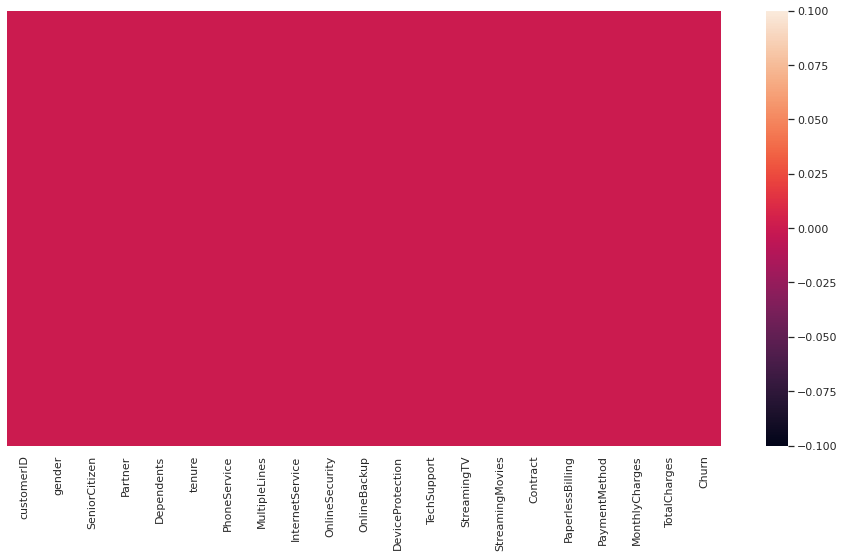

In [14]:
# Visualizing through heatmap whether any missing values available in the dataset
sns.heatmap(data_telco.isnull(),yticklabels=False)

In [15]:
#Remove customer IDs column from the data set
data_telco.drop("customerID",inplace=True,axis=1)

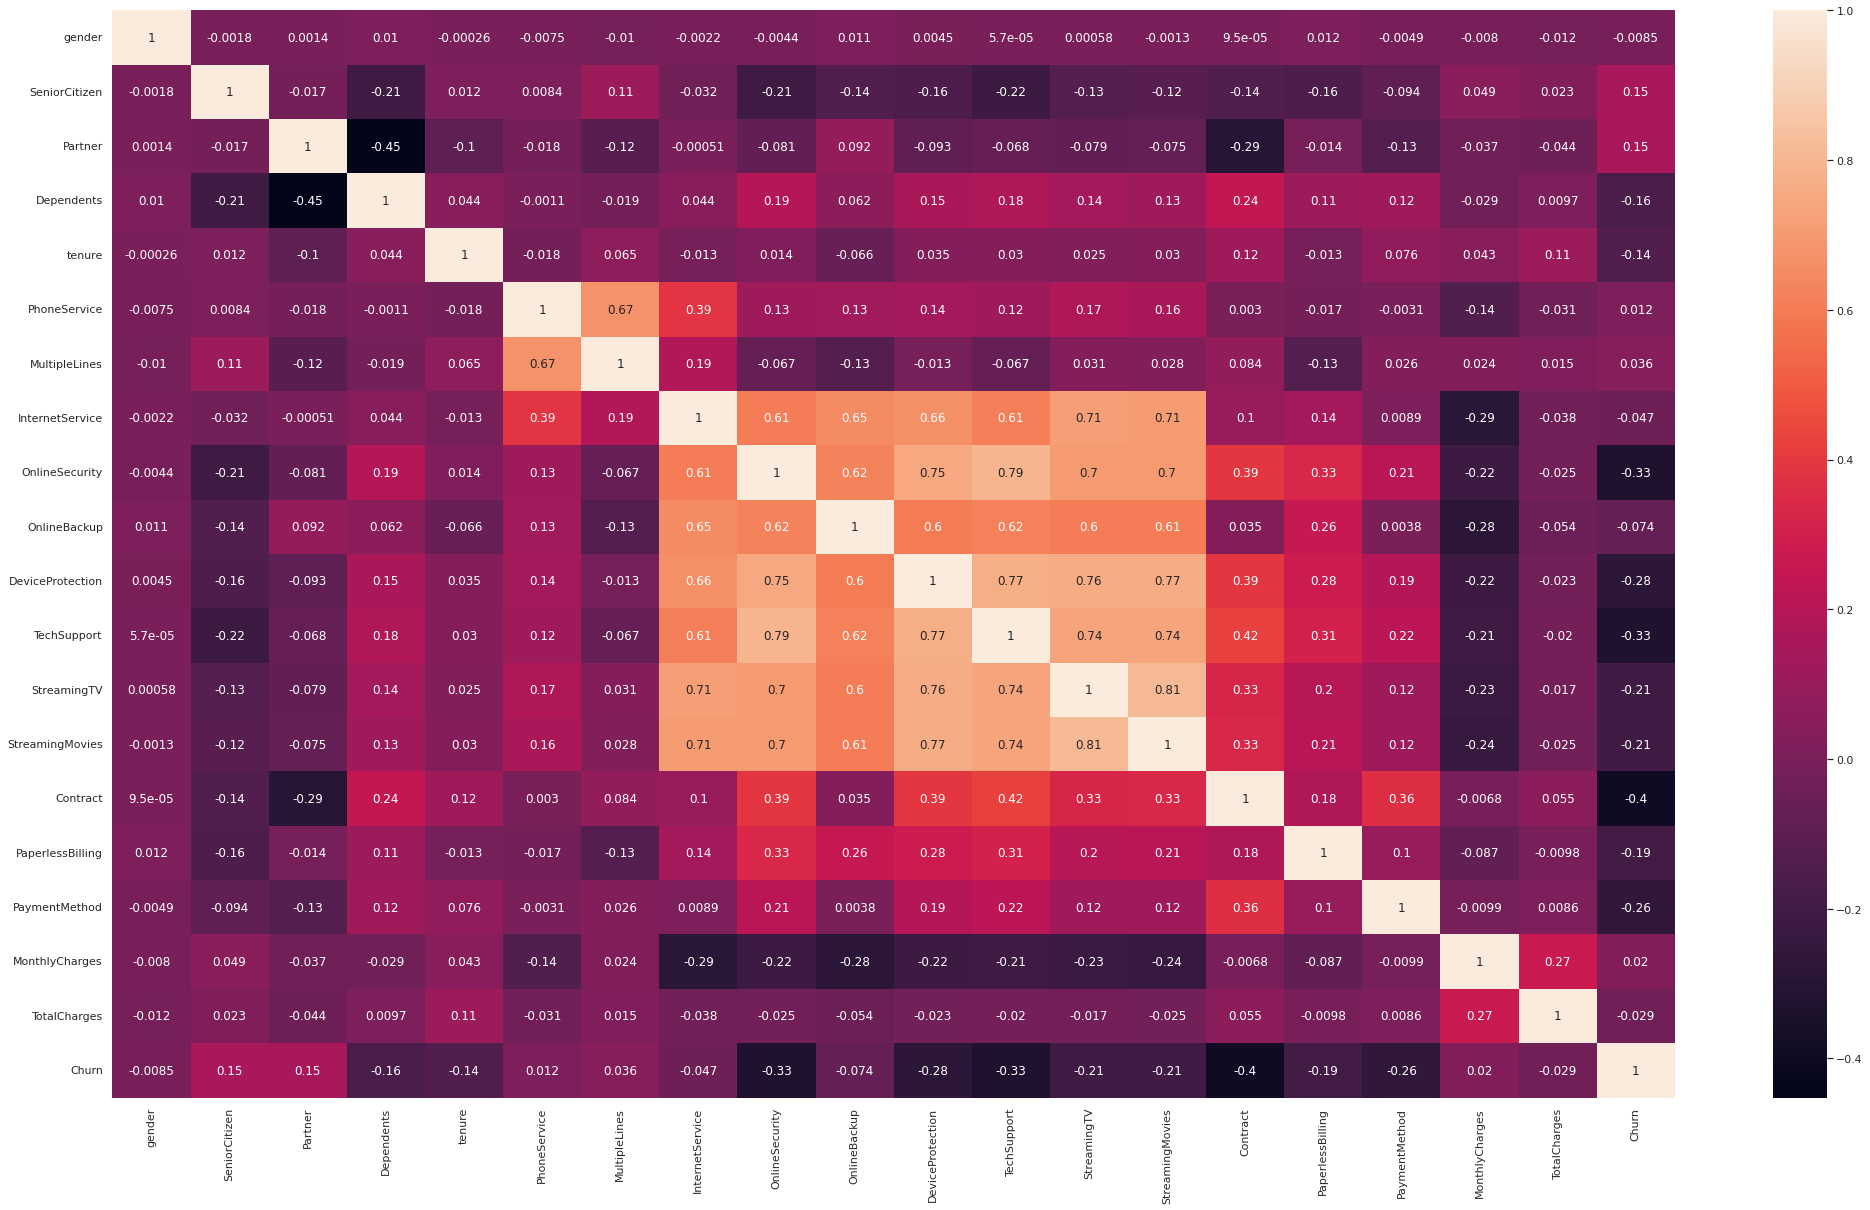

In [16]:
# plot the correlation
plt.figure(figsize=(35, 20))

corr_plot = data_telco.apply(lambda z: pd.factorize(z)[0]).corr()

p = sns.heatmap(corr_plot, xticklabels=corr_plot.columns, yticklabels=corr_plot.columns, annot=True)

/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


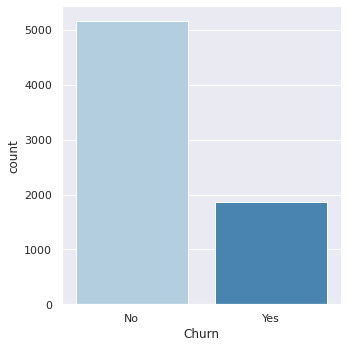

In [17]:
#Churn plot
#1 - Not 2- Churn
sns.factorplot('Churn',data=data_telco,kind='count',palette='Blues')

In [18]:
data_telco.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Churn', ylabel='count'>

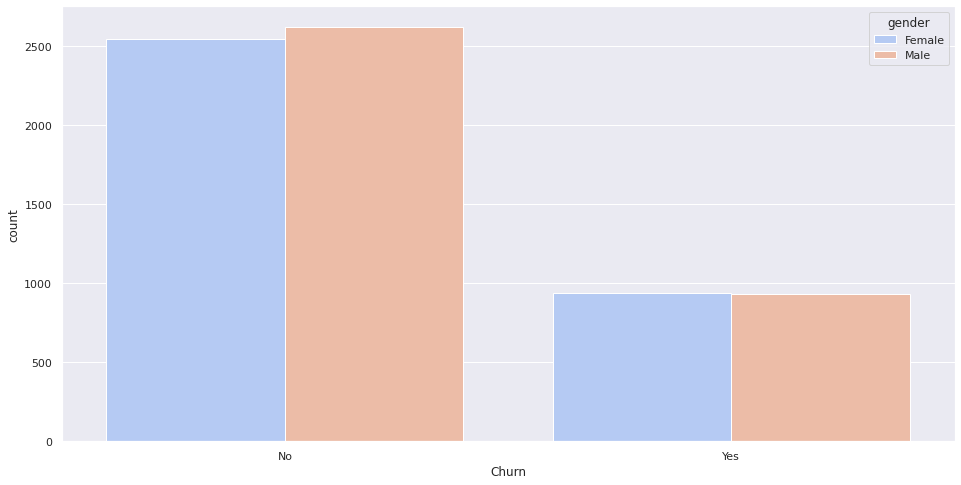

In [19]:
#We can see the churn in gender
sns.countplot('Churn',hue='gender', data=data_telco,palette='coolwarm')

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Churn', ylabel='count'>

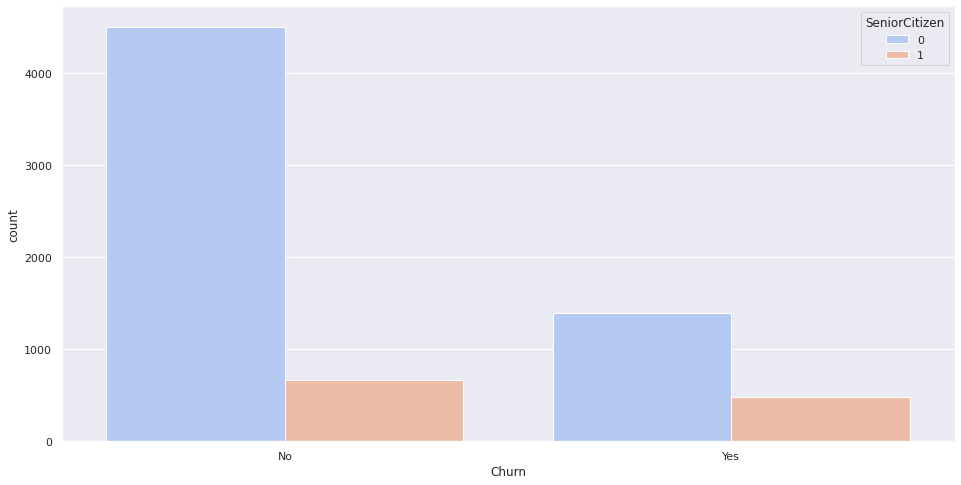

In [20]:
#We can see the churn in gender
sns.countplot('Churn',hue='SeniorCitizen', data=data_telco,palette='coolwarm')

In [21]:
# Import label encoder
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
label_encoder_ols = preprocessing.LabelEncoder()

In [22]:
data_telco_transformed = data_telco

# label encoding (binary variables)
label_encoding_columns = ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']

# Transforming Categorical Columns
data_telco_transformed[label_encoding_columns] = data_telco_transformed[label_encoding_columns].apply(label_encoder.fit_transform)


In [23]:
one_hot_encoding_columns = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
                            'TechSupport', 'StreamingTV',  'StreamingMovies', 'Contract', 'PaymentMethod']

# encode categorical variables with more than two levels using one-hot encoding
data_telco_transformed = pd.get_dummies(data_telco_transformed, columns = one_hot_encoding_columns,drop_first=True)

In [24]:
scaler = MinMaxScaler()

min_max_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Encode numeric Columns
data_telco_transformed[min_max_columns] = scaler.fit_transform(data_telco_transformed[min_max_columns])

In [25]:
data_telco_transformed.head()

gender  SeniorCitizen  Partner  Dependents    tenure  PhoneService  \
0       0              0        1           0  0.000000             0   
1       1              0        0           0  0.464789             1   
2       1              0        0           0  0.014085             1   
3       1              0        0           0  0.619718             0   
4       0              0        0           0  0.014085             1   

   PaperlessBilling  MonthlyCharges  TotalCharges Churn  ...  TechSupport_Yes  \
0                 1        0.115423      0.001275    No  ...                0   
1                 0        0.385075      0.215867    No  ...                0   
2                 1        0.354229      0.010310   Yes  ...                0   
3                 0        0.239303      0.210241    No  ...                1   
4                 1        0.521891      0.015330   Yes  ...                0   

   StreamingTV_No internet service  StreamingTV_Yes  \
0                                0                0   
1                                0                0   
2                                0                0   
3                                0                0   
4                                0                0   

   StreamingMovies_No internet service  StreamingMovies_Yes  \
0                                    0                    0   
1                                    0                    0   
2                                    0                    0   
3                                    0                    0   
4                                    0                    0   

   Contract_One year  Contract_Two year  \
0                  0                  0   
1                  1                  0   
2                  0                  0   
3                  1                  0   
4                  0                  0   

   PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
0                                      0                               1   
1                                      0                               0   
2                                      0                               0   
3                                      0                               0   
4                                      0                               1   

   PaymentMethod_Mailed check  
0                           0  
1                           1  
2                           1  
3                           0  
4                           0  

[5 rows x 31 columns]

In [26]:
data_telco_transformed_ols = data_telco

# label encoding (binary variables) for ols model
label_encoding_columns_ols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling','Churn']

# Transforming Categorical Columns for ols model
data_telco_transformed_ols[label_encoding_columns_ols] = data_telco_transformed_ols[label_encoding_columns_ols].apply(label_encoder_ols.fit_transform)

In [27]:
one_hot_encoding_columns = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
                            'TechSupport', 'StreamingTV',  'StreamingMovies', 'Contract', 'PaymentMethod']

# encode categorical variables with more than two levels using one-hot encoding
data_telco_transformed_ols = pd.get_dummies(data_telco_transformed_ols, columns = one_hot_encoding_columns,drop_first=True)

In [28]:
scaler_ols = MinMaxScaler()

# min-max normalization (numeric variables)
min_max_columns_ols = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Encode numeric Columns
data_telco_transformed_ols[min_max_columns] = scaler_ols.fit_transform(data_telco_transformed_ols[min_max_columns_ols])

In [32]:
data_telco_transformed_ols.head()

gender  SeniorCitizen  Partner  Dependents    tenure  PhoneService  \
0       0              0        1           0  0.000000             0   
1       1              0        0           0  0.464789             1   
2       1              0        0           0  0.014085             1   
3       1              0        0           0  0.619718             0   
4       0              0        0           0  0.014085             1   

   PaperlessBilling  MonthlyCharges  TotalCharges  Churn  ...  \
0                 1        0.115423      0.001275      0  ...   
1                 0        0.385075      0.215867      0  ...   
2                 1        0.354229      0.010310      1  ...   
3                 0        0.239303      0.210241      0  ...   
4                 1        0.521891      0.015330      1  ...   

   TechSupport_Yes  StreamingTV_No internet service  StreamingTV_Yes  \
0                0                                0                0   
1                0                                0                0   
2                0                                0                0   
3                1                                0                0   
4                0                                0                0   

   StreamingMovies_No internet service  StreamingMovies_Yes  \
0                                    0                    0   
1                                    0                    0   
2                                    0                    0   
3                                    0                    0   
4                                    0                    0   

   Contract_One year  Contract_Two year  \
0                  0                  0   
1                  1                  0   
2                  0                  0   
3                  1                  0   
4                  0                  0   

   PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
0                                      0                               1   
1                                      0                               0   
2                                      0                               0   
3                                      0                               0   
4                                      0                               1   

   PaymentMethod_Mailed check  
0                           0  
1                           1  
2                           1  
3                           0  
4                           0  

[5 rows x 31 columns]

In [34]:
import statsmodels.api as sm

#define response variable
y_ols = data_telco_transformed_ols['Churn']

#define predictor variables
x_ols = data_telco_transformed_ols[['tenure','MonthlyCharges', 'TotalCharges']]

#add constant to predictor variables
x_ols = sm.add_constant(x_ols)

#fit regression model
model = sm.OLS(y_ols, x_ols).fit()

#view summary of model fit
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Churn   R-squared:                       0.225
Model:                            OLS   Adj. R-squared:                  0.224
Method:                 Least Squares   F-statistic:                     678.8
Date:                Wed, 01 Mar 2023   Prob (F-statistic):               0.00
Time:                        03:27:45   Log-Likelihood:                -3338.1
No. Observations:                7032   AIC:                             6684.
Df Residuals:                    7028   BIC:                             6712.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1937      0.013     14.

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [37]:
import statsmodels.api as sm
model_ols = sm.OLS(data_telco_transformed_ols['Churn'], data_telco_transformed_ols[['tenure','MonthlyCharges', 'TotalCharges']
]).fit()
# Print out the statistics
model_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Churn   R-squared (uncentered):                   0.414
Model:                            OLS   Adj. R-squared (uncentered):              0.413
Method:                 Least Squares   F-statistic:                              1652.
Date:                Wed, 01 Mar 2023   Prob (F-statistic):                        0.00
Time:                        03:29:53   Log-Likelihood:                         -3442.7
No. Observations:                7032   AIC:                                      6891.
Df Residuals:                    7029   BIC:                                      6912.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
tenure             0.1651      0.021      7.799      0.000       0.124       0.207
MonthlyCharges     1.0456      0.016     65.154      0.000       1.014       1.077
TotalCharges      -1.2062      0.040    -30.159      0.000      -1.285      -1.128
==============================================================================
Omnibus:                      471.125   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              570.477
Skew:                           0.696   Prob(JB):                    1.33e-124
Kurtosis:                       2.902   Cond. No.                         7.74
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

As the dataset is classification and continuous variables are very few so r2 values was very less in without constant model

In model constant model the r2 sqaure value is very less compared to no-constant model.

Applying r2 on few varibles leads to less r2 and can't depend on this feature also not very relevant for classification model.

Generally R2 need to be above 70 for best fit model if it is less it leads to noisy, high-variability data and can have a significant trend. 

# Multicollinearity

In [38]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [39]:
X_mc = data_telco_transformed[['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'PaperlessBilling',
       'MonthlyCharges', 'TotalCharges']]

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X_mc.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X_mc.values, i)
                          for i in range(len(X_mc.columns))]
  
print(vif_data)

            feature        VIF
0            gender   1.897505
1     SeniorCitizen   1.324793
2           Partner   2.809458
3        Dependents   1.920163
4            tenure  12.166500
5      PhoneService   6.357330
6  PaperlessBilling   2.727050
7    MonthlyCharges  10.842746
8      TotalCharges  15.543120


Here we can see multicollinearity of data for specific continuous float datatype has less collinear relationship to the other variables that should be considered or adjusted for the structure of the model and selection of independent variables.

In [64]:
from sklearn.model_selection import  train_test_split
X_reg = data_telco_transformed_ols.drop('Churn',axis=1)

y_reg = data_telco_transformed_ols['Churn']

#Spliting data into Training 70%, Test set 30%

X_train, X_test, y_train, y_test = train_test_split(X_reg, y_reg, test_size=0.3, random_state=4)

In [69]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, SGDRegressor
from sklearn import metrics

In [66]:
# Ridge regression with an alpha of 0.5
model_ridge = Ridge(fit_intercept=True, alpha=0.5)
model_ridge.fit(X_train, y_train)

Ridge(alpha=0.5)

In [70]:
# rmse regularization
y_pred = model_ridge.predict(X_test)

rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
rmse

0.37953257310970084

In [40]:
# Initialising H2O Automl cluster 
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.17" 2022-10-18; OpenJDK Runtime Environment (build 11.0.17+8-post-Ubuntu-1ubuntu220.04); OpenJDK 64-Bit Server VM (build 11.0.17+8-post-Ubuntu-1ubuntu220.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.8/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpsoveb9of
  JVM stdout: /tmp/tmpsoveb9of/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpsoveb9of/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


--------------------------  ----------------------------------
H2O_cluster_uptime:         02 secs
H2O_cluster_timezone:       Etc/UTC
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.40.0.1
H2O_cluster_version_age:    20 days
H2O_cluster_name:           H2O_from_python_unknownUser_v4u23g
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    3.172 Gb
H2O_cluster_total_cores:    2
H2O_cluster_allowed_cores:  2
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://127.0.0.1:54321
H2O_connection_proxy:       {"http": null, "https": null}
H2O_internal_security:      False
Python_version:             3.8.10 final
--------------------------  ----------------------------------

In [41]:
hf = h2o.H2OFrame(data_telco_transformed)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [42]:
hf.describe(chunk_summary=True)

Rows:7032
Cols:31

Chunk compression summary: 
chunk_type    chunk_name       count    count_percentage    size      size_percentage
------------  ---------------  -------  ------------------  --------  -----------------
CBS           Binary           27       87.0968             25.0 KB   16.5927
CXI           Sparse Integers  1        3.22581             1.4 KB    0.929913
CUD           Unique Reals     1        3.22581             14.4 KB   9.52967
C8D           64-bit Reals     2        6.45161             110.0 KB  72.9477

Frame distribution summary: 
                 size      number_of_rows    number_of_chunks_per_column    number_of_chunks
---------------  --------  ----------------  -----------------------------  ------------------
127.0.0.1:54321  150.8 KB  7032              1                              31
mean             150.8 KB  7032              1                              31
min              150.8 KB  7032              1                              31
max              150.8 KB  7032              1                              31
stddev           0  B      0                 0                              0
total            150.8 KB  7032              1                              31

gender              SeniorCitizen        Partner             Dependents           tenure               PhoneService        PaperlessBilling     MonthlyCharges       TotalCharges          Churn    MultipleLines_No phone service    MultipleLines_Yes    InternetService_Fiber optic    InternetService_No    OnlineSecurity_No internet service    OnlineSecurity_Yes    OnlineBackup_No internet service    OnlineBackup_Yes     DeviceProtection_No internet service    DeviceProtection_Yes    TechSupport_No internet service    TechSupport_Yes      StreamingTV_No internet service    StreamingTV_Yes     StreamingMovies_No internet service    StreamingMovies_Yes    Contract_One year    Contract_Two year    PaymentMethod_Credit card (automatic)    PaymentMethod_Electronic check    PaymentMethod_Mailed check
-------  ------------------  -------------------  ------------------  -------------------  -------------------  ------------------  -------------------  -------------------  --------------------  -------  --------------------------------  -------------------  -----------------------------  --------------------  ------------------------------------  --------------------  ----------------------------------  -------------------  --------------------------------------  ----------------------  ---------------------------------  -------------------  ---------------------------------  ------------------  -------------------------------------  ---------------------  -------------------  -------------------  ---------------------------------------  --------------------------------  ----------------------------
type     int                 int                  int                 int                  real                 int                 int                  real                 real                  enum     int                               int                  int                            int                   int                                   int                   int                                 int                  int                                     int                     int                                int                  int                                int                 int                                    int                    int                  int                  int                                      int                               int
mins     0.0                 0.0                  0.0                 0.0                  0.0                  0.0                 0.0                  0.0                  0.0                            0.0                               0.0                  0.0                            0.0                   0.0                                   0.0                   0.0                                 0.0                  0.0                                     0.0                     0.0                                0.0                  0.0                                0.0                 0.0                                    0.0                    0.0                  0.0                  0.0                                      0.0                               0.0
mean     0.5046928327645052  0.16240045506257111  0.4825085324232082  0.2984926052332196   0.4425603678956555   0.9032992036405005  0.5927189988623436   0.4631662506579723   0.26130861306737424            0.09670079635949944               0.42192832764505117  0.4402730375426621             0.2161547212741752    0.2161547212741752                    0.286547212741752     0.2161547212741752                  0.34485210466439137  0.2161547212741752                      0.3438566552901024      0.2161547212741752                 0.2901023890784983   0.2161547212741752                 0.3843856655290102  0.2161547212741752                     0.3883674630261661     0.20932878270762229  0.2396188850967008   0.21629692832764505                      0.3363196814562002                0.22810011376564276
maxs 

In [48]:
# Split the data to train test split with 80:20
train, test = hf.split_frame(ratios=[0.8], seed = 17)

In [49]:
X = hf.columns
print(X)

['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn', 'MultipleLines_No phone service', 'MultipleLines_Yes', 'InternetService_Fiber optic', 'InternetService_No', 'OnlineSecurity_No internet service', 'OnlineSecurity_Yes', 'OnlineBackup_No internet service', 'OnlineBackup_Yes', 'DeviceProtection_No internet service', 'DeviceProtection_Yes', 'TechSupport_No internet service', 'TechSupport_Yes', 'StreamingTV_No internet service', 'StreamingTV_Yes', 'StreamingMovies_No internet service', 'StreamingMovies_Yes', 'Contract_One year', 'Contract_Two year', 'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check']


In [50]:
# Seting target and predictor variables
y = "Churn"

# Removing the result from predictors data
X.remove(y)  
print(X)

['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'MultipleLines_No phone service', 'MultipleLines_Yes', 'InternetService_Fiber optic', 'InternetService_No', 'OnlineSecurity_No internet service', 'OnlineSecurity_Yes', 'OnlineBackup_No internet service', 'OnlineBackup_Yes', 'DeviceProtection_No internet service', 'DeviceProtection_Yes', 'TechSupport_No internet service', 'TechSupport_Yes', 'StreamingTV_No internet service', 'StreamingTV_Yes', 'StreamingMovies_No internet service', 'StreamingMovies_Yes', 'Contract_One year', 'Contract_Two year', 'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check']


In [51]:
H2OAutoML(nfolds=5, max_runtime_secs=3600, max_models=None, stopping_metric='AUTO', stopping_tolerance=None, stopping_rounds=3, seed=None, project_name=None)

In [52]:
# Stopping Creterias: max time and max number of models has been applied for the model deployment
aml = H2OAutoML(max_models = 25,  
                seed = 19, 
                project_name='classification')

%time aml.train(x = X, y = y, training_frame = train)

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%
CPU times: user 12.1 s, sys: 869 ms, total: 13 s
Wall time: 16min 35s


Model Details
=============
H2OStackedEnsembleEstimator : Stacked Ensemble
Model Key: StackedEnsemble_BestOfFamily_1_AutoML_1_20230301_34957


Model Summary for Stacked Ensemble: 
key                                        value
-----------------------------------------  ----------------
Stacking strategy                          cross_validation
Number of base models (used / total)       5/6
# GBM base models (used / total)           1/1
# XGBoost base models (used / total)       1/1
# GLM base models (used / total)           1/1
# DeepLearning base models (used / total)  1/1
# DRF base models (used / total)           1/2
Metalearner algorithm                      GLM
Metalearner fold assignment scheme         Random
Metalearner nfolds                         5
Metalearner fold_column
Custom metalearner hyperparameters         None

ModelMetricsBinomialGLM: stackedensemble
** Reported on train data. **

MSE: 0.11568770485432606
RMSE: 0.34012895327261694
LogLoss: 0.36054773661446166
AUC: 0.8921112010542905
AUCPR: 0.7480271165779079
Gini: 0.7842224021085811
Null degrees of freedom: 5633
Residual degrees of freedom: 5628
Null deviance: 6480.436652382593
Residual deviance: 4062.651896171753
AIC: 4074.651896171753

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3553799003244873
       No    Yes    Error    Rate
-----  ----  -----  -------  ---------------
No     3479  679    0.1633   (679.0/4158.0)
Yes    349   1127   0.2364   (349.0/1476.0)
Total  3828  1806   0.1825   (1028.0/5634.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.35538      0.686776  199
max f2                       0.200896     0.787847  272
max f0point5                 0.532172     0.703892  129
max accuracy                 0.519422     0.836706  134
max precision                0.885415     1         0
max recall                   0.00970318   1         392
max specificity              0.885415     1         0
max absolute_mcc             0.382199     0.566177  189
max min_per_class_accuracy   0.314249     0.80279   216
max mean_per_class_accuracy  0.270799     0.811213  236
max tns                      0.885415     4158      0
max fns                      0.885415     1475      0
max fps                      0.00452506   4158      399
max tps                      0.00970318   1476      392
max tnr                      0.885415     1         0
max fnr                      0.885415     0.999322  0
max fpr                      0.00452506   1         399
max tpr                      0.00970318   1         392

Gains/Lift Table: Avg response rate: 26.20 %, avg score: 26.18 %
group    cumulative_data_fraction    lower_threshold    lift        cumulative_lift    response_rate    score       cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ----------  -----------------  ---------------  ----------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0101171                   0.822435           3.75011     3.75011            0.982456         0.841595    0.982456                    0.841595            0.0379404       0.0379404                  275.011   275.011            0.0376999
2        0.0200568                   0.803696           3.54443     3.64818            0.928571         0.812979    0.955752                    0.827413            0.0352304       0.0731707                  254.443   264.818            0.0719682
3        0.0299965                   0.784691           3.4081      3.56862            0.892857         0.79399     0.934911                    0.816338            0.0338753       0.107046                   240.81    256.862            0.10

In [77]:
aml = H2OAutoML(max_models = 25,  
                seed = 96, 
                project_name='classification')

%time aml.train(x = X, y = y, training_frame = test)

AutoML progress: |
04:44:05.935: New models will be added to existing leaderboard classification@@Churn (leaderboard frame=null) with already 27 models.

███████████████████████████████████████████████████████████████| (done) 100%

04:51:43.743: StackedEnsemble_BestOfFamily_2_AutoML_2_20230301_44405 [StackedEnsemble best_of_family_xglm (built with AUTO metalearner, using top model from each algorithm type)] failed: water.exceptions.H2OIllegalArgumentException: Base models are inconsistent: they use different size (number of rows) training frames. Found: 1398 (StackedEnsemble) and 5634 (model XGBoost_grid_1_AutoML_1_20230301_34957_model_5).
04:51:43.760: StackedEnsemble_AllModels_2_AutoML_2_20230301_44405 [StackedEnsemble all_xglm (built with AUTO metalearner, using all AutoML models)] failed: water.exceptions.H2OIllegalArgumentException: Base models are inconsistent: they use different size (number of rows) training frames. Found: 1398 (StackedEnsemble) and 5634 (model XGBoost_grid_1_A

Model Details
=============
H2OStackedEnsembleEstimator : Stacked Ensemble
Model Key: StackedEnsemble_BestOfFamily_1_AutoML_1_20230301_34957


Model Summary for Stacked Ensemble: 
key                                        value
-----------------------------------------  ----------------
Stacking strategy                          cross_validation
Number of base models (used / total)       5/6
# GBM base models (used / total)           1/1
# XGBoost base models (used / total)       1/1
# GLM base models (used / total)           1/1
# DeepLearning base models (used / total)  1/1
# DRF base models (used / total)           1/2
Metalearner algorithm                      GLM
Metalearner fold assignment scheme         Random
Metalearner nfolds                         5
Metalearner fold_column
Custom metalearner hyperparameters         None

ModelMetricsBinomialGLM: stackedensemble
** Reported on train data. **

MSE: 0.11568770485432606
RMSE: 0.34012895327261694
LogLoss: 0.36054773661446166
AUC: 0.8921112010542905
AUCPR: 0.7480271165779079
Gini: 0.7842224021085811
Null degrees of freedom: 5633
Residual degrees of freedom: 5628
Null deviance: 6480.436652382593
Residual deviance: 4062.651896171753
AIC: 4074.651896171753

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3553799003244873
       No    Yes    Error    Rate
-----  ----  -----  -------  ---------------
No     3479  679    0.1633   (679.0/4158.0)
Yes    349   1127   0.2364   (349.0/1476.0)
Total  3828  1806   0.1825   (1028.0/5634.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.35538      0.686776  199
max f2                       0.200896     0.787847  272
max f0point5                 0.532172     0.703892  129
max accuracy                 0.519422     0.836706  134
max precision                0.885415     1         0
max recall                   0.00970318   1         392
max specificity              0.885415     1         0
max absolute_mcc             0.382199     0.566177  189
max min_per_class_accuracy   0.314249     0.80279   216
max mean_per_class_accuracy  0.270799     0.811213  236
max tns                      0.885415     4158      0
max fns                      0.885415     1475      0
max fps                      0.00452506   4158      399
max tps                      0.00970318   1476      392
max tnr                      0.885415     1         0
max fnr                      0.885415     0.999322  0
max fpr                      0.00452506   1         399
max tpr                      0.00970318   1         392

Gains/Lift Table: Avg response rate: 26.20 %, avg score: 26.18 %
group    cumulative_data_fraction    lower_threshold    lift        cumulative_lift    response_rate    score       cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ----------  -----------------  ---------------  ----------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0101171                   0.822435           3.75011     3.75011            0.982456         0.841595    0.982456                    0.841595            0.0379404       0.0379404                  275.011   275.011            0.0376999
2        0.0200568                   0.803696           3.54443     3.64818            0.928571         0.812979    0.955752                    0.827413            0.0352304       0.0731707                  254.443   264.818            0.0719682
3        0.0299965                   0.784691           3.4081      3.56862            0.892857         0.79399     0.934911                    0.816338            0.0338753       0.107046                   240.81    256.862            0.10

In [78]:
ml_results = aml.leaderboard
ml_results.head(rows=ml_results.nrows)

model_id                                                     auc    logloss     aucpr    mean_per_class_error      rmse       mse
------------------------------------------------------  --------  ---------  --------  ----------------------  --------  --------
StackedEnsemble_BestOfFamily_1_AutoML_1_20230301_34957  0.850113   0.408145  0.658162                0.235124  0.364805  0.133083
StackedEnsemble_AllModels_1_AutoML_1_20230301_34957     0.849369   0.408431  0.657691                0.239547  0.365423  0.133534
GBM_5_AutoML_1_20230301_34957                           0.846454   0.413071  0.64774                 0.239318  0.367174  0.134817
XGBoost_grid_1_AutoML_1_20230301_34957_model_5          0.846182   0.413812  0.651926                0.234494  0.366763  0.134515
GBM_1_AutoML_1_20230301_34957                           0.845938   0.413055  0.64928                 0.23866   0.366853  0.134581
XGBoost_grid_1_AutoML_1_20230301_34957_model_1          0.845833   0.414602  0.6456                  0.24175   0.367157  0.134804
GBM_grid_1_AutoML_1_20230301_34957_model_2              0.845576   0.413294  0.651915                0.237416  0.366927  0.134635
GLM_1_AutoML_1_20230301_34957                           0.84477    0.41483   0.643151                0.230044  0.367974  0.135405
GBM_grid_1_AutoML_1_20230301_34957_model_3              0.842928   0.416345  0.647233                0.23926   0.368377  0.135702
XGBoost_grid_1_AutoML_1_20230301_34957_model_2          0.842198   0.417395  0.649405                0.244706  0.369092  0.136229
XGBoost_grid_1_AutoML_1_20230301_34957_model_4          0.841833   0.418511  0.645043                0.24028   0.369639  0.136633
GBM_6_AutoML_2_20230301_44405                           0.840338   0.431396  0.680333                0.235756  0.37198   0.138369
GBM_grid_1_AutoML_1_20230301_34957_model_1              0.839946   0.419815  0.642086                0.242852  0.370111  0.136982
GBM_grid_2_AutoML_2_20230301_44405_model_1              0.83974    0.431165  0.684685                0.234697  0.371564  0.13806
GBM_2_AutoML_1_20230301_34957                           0.839532   0.419787  0.646175                0.239808  0.370371  0.137174
GBM_grid_1_AutoML_1_20230301_34957_model_4              0.839157   0.420413  0.643386                0.240327  0.370577  0.137327
XGBoost_grid_1_AutoML_1_20230301_34957_model_3          0.839021   0.422483  0.636394                0.241556  0.372085  0.138447
DeepLearning_grid_1_AutoML_1_20230301_34957_model_2     0.837858   0.426356  0.627155                0.241021  0.372409  0.138689
XGBoost_3_AutoML_1_20230301_34957                       0.837471   0.423961  0.637839                0.246832  0.37314   0.139234
DeepLearning_grid_3_AutoML_1_20230301_34957_model_1     0.836969   0.428066  0.62521                 0.249513  0.373056  0.139171
GLM_2_AutoML_2_20230301_44405                           0.83547    0.436787  0.667747                0.224014  0.373221  0.139294
GBM_3_AutoML_1_20230301_34957                           0.835198   0.425883  0.633001                0.242905  0.373288  0.139344
GBM_grid_2_AutoML_2_20230301_44405_model_4              0.834541   0.436607  0.677869                0.231377  0.374237  0.140054
GBM_grid_2_AutoML_2_20230301_44405_model_3              0.834484   0.437942  0.659273                0.229046  0.374779  0.140459
XGBoost_1_AutoML_1_20230301_34957                       0.834366   0.433244  0.622895                0.244989  0.376253  0.141566
XGBoost_grid_2_AutoML_2_20230301_44405_model_1          0.834326   0.438709  0.665321                0.240135  0.374971  0.140604
DeepLearning_grid_2_AutoML_1_20230301_34957_model_1     0.833719   0.439229  0.61538                 0.249913  0.375353  0.14089
GBM_grid_2_AutoML_2_20230301_44405_model_2              0.832947   0.439882  0.66587                 0.231867  0.376081  0.141437
GBM_4_AutoML_1_20230301_34957                           0.832602   0.429992  0.628236                0

In [79]:
from h2o.automl import get_leaderboard
ml_result1 = get_leaderboard(aml, extra_columns='ALL')
ml_result1.head(rows=ml_result1.nrows)

model_id                                                     auc    logloss     aucpr    mean_per_class_error      rmse       mse    training_time_ms    predict_time_per_row_ms  algo
------------------------------------------------------  --------  ---------  --------  ----------------------  --------  --------  ------------------  -------------------------  ---------------
StackedEnsemble_BestOfFamily_1_AutoML_1_20230301_34957  0.850113   0.408145  0.658162                0.235124  0.364805  0.133083                5344                   0.049768  StackedEnsemble
StackedEnsemble_AllModels_1_AutoML_1_20230301_34957     0.849369   0.408431  0.657691                0.239547  0.365423  0.133534                8943                   0.067769  StackedEnsemble
GBM_5_AutoML_1_20230301_34957                           0.846454   0.413071  0.64774                 0.239318  0.367174  0.134817                 724                   0.012995  GBM
XGBoost_grid_1_AutoML_1_20230301_34957_model_5          0.846182   0.413812  0.651926                0.234494  0.366763  0.134515                 731                   0.007193  XGBoost
GBM_1_AutoML_1_20230301_34957                           0.845938   0.413055  0.64928                 0.23866   0.366853  0.134581                1017                   0.014587  GBM
XGBoost_grid_1_AutoML_1_20230301_34957_model_1          0.845833   0.414602  0.6456                  0.24175   0.367157  0.134804                 468                   0.00682   XGBoost
GBM_grid_1_AutoML_1_20230301_34957_model_2              0.845576   0.413294  0.651915                0.237416  0.366927  0.134635                 557                   0.011807  GBM
GLM_1_AutoML_1_20230301_34957                           0.84477    0.41483   0.643151                0.230044  0.367974  0.135405                 481                   0.006241  GLM
GBM_grid_1_AutoML_1_20230301_34957_model_3              0.842928   0.416345  0.647233                0.23926   0.368377  0.135702                 485                   0.01395   GBM
XGBoost_grid_1_AutoML_1_20230301_34957_model_2          0.842198   0.417395  0.649405                0.244706  0.369092  0.136229                2561                   0.005913  XGBoost
XGBoost_grid_1_AutoML_1_20230301_34957_model_4          0.841833   0.418511  0.645043                0.24028   0.369639  0.136633                 514                   0.00761   XGBoost
GBM_6_AutoML_2_20230301_44405                           0.840338   0.431396  0.680333                0.235756  0.37198   0.138369                 237                   0.011143  GBM
GBM_grid_1_AutoML_1_20230301_34957_model_1              0.839946   0.419815  0.642086                0.242852  0.370111  0.136982                 724                   0.014001  GBM
GBM_grid_2_AutoML_2_20230301_44405_model_1              0.83974    0.431165  0.684685                0.234697  0.371564  0.13806                  136                   0.010414  GBM
GBM_2_AutoML_1_20230301_34957                           0.839532   0.419787  0.646175                0.239808  0.370371  0.137174                 757                   0.011963  GBM
GBM_grid_1_AutoML_1_20230301_34957_model_4              0.839157   0.420413  0.643386                0.240327  0.370577  0.137327                 516                   0.014121  GBM
XGBoost_grid_1_AutoML_1_20230301_34957_model_3          0.839021   0.422483  0.636394                0.241556  0.372085  0.138447                 521                   0.008723  XGBoost
DeepLearning_grid_1_AutoML_1_20230301_34957_model_2     0.837858   0.426356  0.627155                0.241021  0.372409  0.138689               32944                   0.006916  DeepLearning
XGBoost_3_AutoML_1_20230301_34957                       0.837471   0.423961  0.637839                0.246832  0.37314   0.139234                 431                   0.014495  XGBoost
DeepLearning_grid_3_AutoML_1_20230301_34957_model_1     0.836969   0.428066  0.62521                 0.24951

In [80]:
aml.leader.model_performance(test_data=test)

ModelMetricsBinomialGLM: stackedensemble
** Reported on test data. **

MSE: 0.13502578893980702
RMSE: 0.36745855404359146
LogLoss: 0.42467721463565256
AUC: 0.8485372121580393
AUCPR: 0.702030469567255
Gini: 0.6970744243160787
Null degrees of freedom: 1397
Residual degrees of freedom: 1392
Null deviance: 1663.4431942517967
Residual deviance: 1187.3974921212848
AIC: 1199.3974921212848

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.2755484555915629
       No    Yes    Error    Rate
-----  ----  -----  -------  --------------
No     765   240    0.2388   (240.0/1005.0)
Yes    82    311    0.2087   (82.0/393.0)
Total  847   551    0.2303   (322.0/1398.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.275548     0.658898  230
max f2                       0.15961      0.75692   289
max f0point5                 0.571869     0.683019  105
max accuracy                 0.518225     0.811874  127
max precision                0.881311     1         0
max recall                   0.00550738   1         397
max specificity              0.881311     1         0
max absolute_mcc             0.275548     0.508309  230
max min_per_class_accuracy   0.288898     0.770992  226
max mean_per_class_accuracy  0.243586     0.778497  247
max tns                      0.881311     1005      0
max fns                      0.881311     392       0
max fps                      0.00442122   1005      399
max tps                      0.00550738   393       397
max tnr                      0.881311     1         0
max fnr                      0.881311     0.997455  0
max fpr                      0.00442122   1         399
max tpr                      0.00550738   1         397

Gains/Lift Table: Avg response rate: 28.11 %, avg score: 26.74 %
group    cumulative_data_fraction    lower_threshold    lift      cumulative_lift    response_rate    score       cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  --------  -----------------  ---------------  ----------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0100143                   0.822467           3.04907   3.04907            0.857143         0.843053    0.857143                    0.843053            0.0305344       0.0305344                  204.907   204.907            0.0285443
2        0.0200286                   0.808094           3.30316   3.17612            0.928571         0.813735    0.892857                    0.828394            0.0330789       0.0636132                  230.316   217.612            0.0606282
3        0.0300429                   0.792684           3.55725   3.30316            1                0.802106    0.928571                    0.819632            0.0356234       0.0992366                  255.725   230.316            0.0962516
4        0.0400572                   0.770064           2.54089   3.1126             0.714286         0.781949    0.875                       0.810211            0.0254453       0.124682                   154.089   211.26             0.117717
5        0.0500715                   0.748244           3.30316   3.15071            0.928571         0.762303    0.885714                    0.800629            0.0330789       0.157761                   230.316   215.071            0.149801
6        0.100143                    0.667555           2.8458    2.99826            0.8              0.706392    0.842857                    0.753511            0.142494        0.300254                   184.58    199.826            0.278364
7        0.150215                    0.604721           2.43926   2.81192            0.685714         0.636523    0.790476  

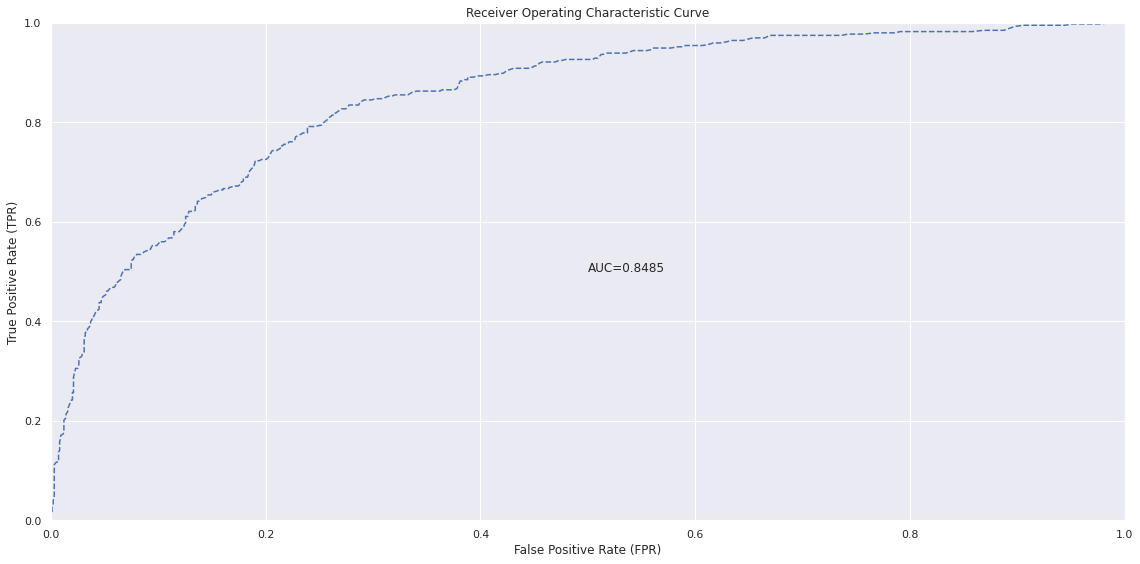

In [81]:
aml.leader.model_performance(test_data=test).plot()
plt.show()

In [82]:
predictions = aml.predict(test)
predictions

stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


predict          No        Yes
---------  --------  ---------
Yes        0.365051  0.634949
No         0.939516  0.0604842
No         0.981285  0.018715
No         0.972761  0.0272385
Yes        0.201723  0.798277
Yes        0.279629  0.720371
No         0.977463  0.0225366
No         0.880122  0.119878
No         0.744441  0.255559
No         0.685202  0.314798
[1398 rows x 3 columns]

# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id                                                  auc    logloss     aucpr    mean_per_class_error      rmse        mse    training_time_ms    predict_time_per_row_ms  algo
---------------------------------------------------  --------  ---------  --------  ----------------------  --------  ---------  ------------------  -------------------------  ------------
DRF_2_AutoML_2_20230301_44405                        0.999956   0.124588  0.999886              0.00226729  0.15588   0.0242985                 521                   0.016169  DRF
XGBoost_grid_2_AutoML_2_20230301_44405_model_3       0.991184   0.178173  0.978436              0.048779    0.213787  0.045705                  155                   0.007417  XGBoost
XGBoost_grid_2_AutoML_2_20230301_44405_model_2       0.99084    0.169561  0.980053              0.051878    0.209751  0.0439955                1413                   0.006649  XGBoost
DeepLearning_grid_4_AutoML_2_20230301_44405_model_2  0.98686    0.149427  0.965751              0.0548061   0.198567  0.039429                17332                   0.01421   DeepLearning
GBM_9_AutoML_2_20230301_44405                        0.976227   0.252194  0.940466              0.084167    0.26511   0.0702834                 290                   0.011247  GBM
GBM_10_AutoML_2_20230301_44405                       0.971158   0.260683  0.932272              0.0896396   0.270034  0.0729183                 151                   0.010163  GBM
GBM_8_AutoML_2_20230301_44405                        0.963845   0.280266  0.911709              0.114033    0.285148  0.0813092                 162                   0.009847  GBM
GBM_grid_2_AutoML_2_20230301_44405_model_2           0.956842   0.290383  0.897936              0.118404    0.291127  0.0847548                 188                   0.016028  GBM
GBM_7_AutoML_2_20230301_44405                        0.956567   0.290134  0.900834              0.113087    0.290647  0.0844754                 270                   0.010082  GBM
XGBoost_6_AutoML_2_20230301_44405                    0.95193    0.273937  0.890201              0.131404    0.286705  0.0822                    143                   0.005691  XGBoost
GBM_grid_2_AutoML_2_20230301_44405_model_3           0.94887    0.30299   0.877284              0.122206    0.300836  0.0905024                 175                   0.009366  GBM
XGBoost_5_AutoML_2_20230301_44405                    0.934355   0.300376  0.867957              0.138696    0.301679  0.09101                   149                   0.007107  XGBoost
DeepLearning_grid_5_AutoML_2_20230301_44405_model_1  0.914423   0.372959  0.82056               0.154837    0.335495  0.112557                20887                   0.008019  DeepLearning
DeepLearning_grid_4_AutoML_2_20230301_44405_model_1  0.904276   0.339825  0.825029              0.165421    0.319517  0.102091                21110                   0.005847  DeepLearning
GBM_grid_2_AutoML_2_20230301_44405_model_1           0.902214   0.364922  0.79074               0.182166    0.337388  0.113831                  136                   0.007875  GBM
XGBoost_grid_2_AutoML_2_20230301_44405_model_4       0.902169   0.351303  0.804825              0.177737    0.330019  0.108912                  134                   0.00634   XGBoost
DeepLearning_grid_6_AutoML_2_20230301_44405_model_1  0.900263   0.378343  0.811137              0.157119    0.335191  0.112353                21033                   0.01387   DeepLearning
XGBoost_grid_2_AutoML_2_20230301_44405_model_1       0.89969    0.353686  0.80547               0.172705    0.330608  0.109302                  153                   0.007048  XGBoost
GBM_grid_2_AutoML_2_20230301_44405_model_4           0.898807   0.371747  0.778797              0.176457    0.341074  0.116332                  120                   0.00842   GBM
XGBoost_grid_2_AutoML_2_20230301_44405_model_5       0.895022   0.362073  0.79058               0.180331    0.336941  0.113529                  133   

# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## StackedEnsemble_BestOfFamily_1_AutoML_1_20230301_34957

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.2755484555915629
       No    Yes    Error    Rate
-----  ----  -----  -------  --------------
No     765   240    0.2388   (240.0/1005.0)
Yes    82    311    0.2087   (82.0/393.0)
Total  847   551    0.2303   (322.0/1398.0)

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

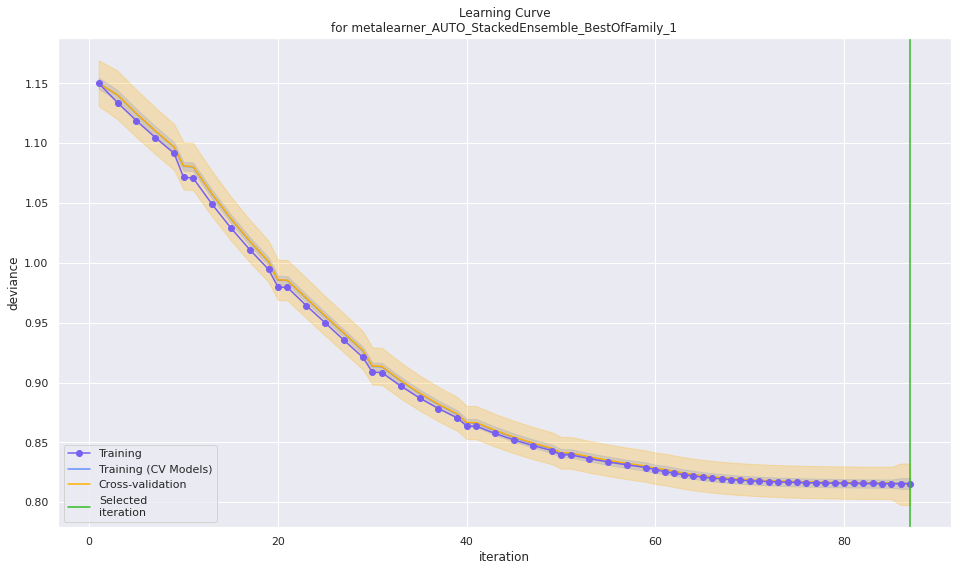

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

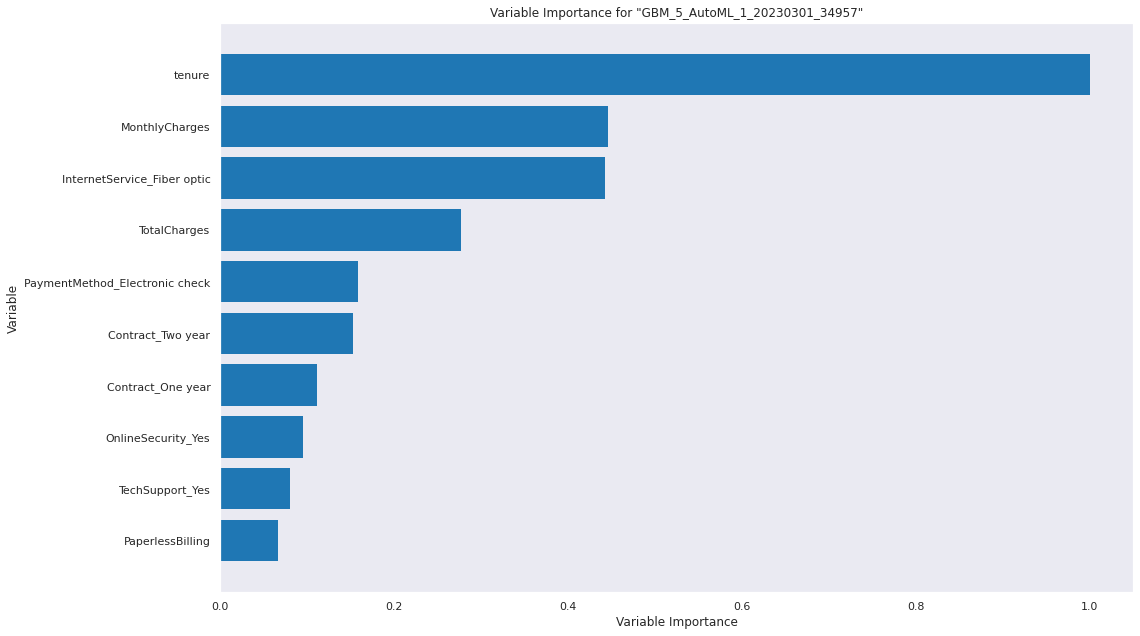

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

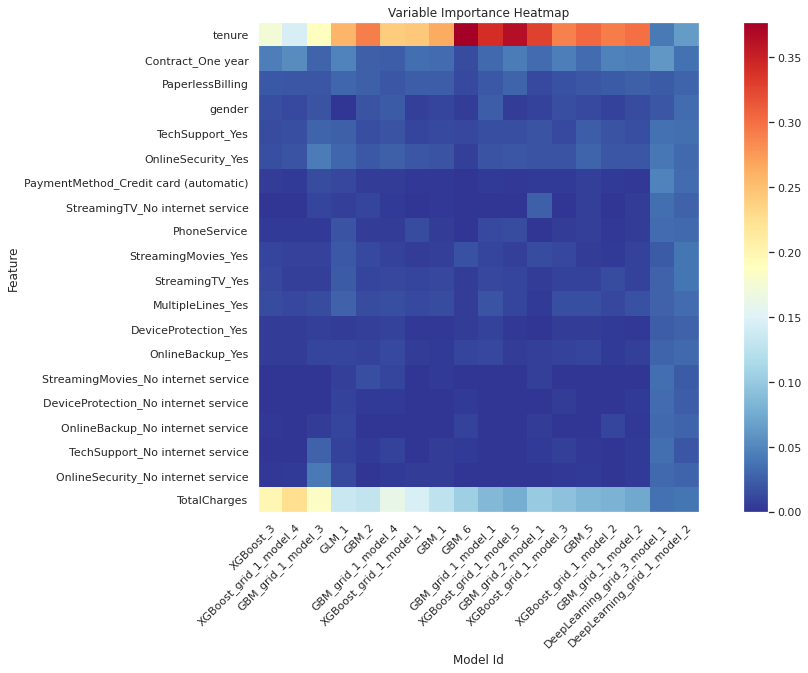

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

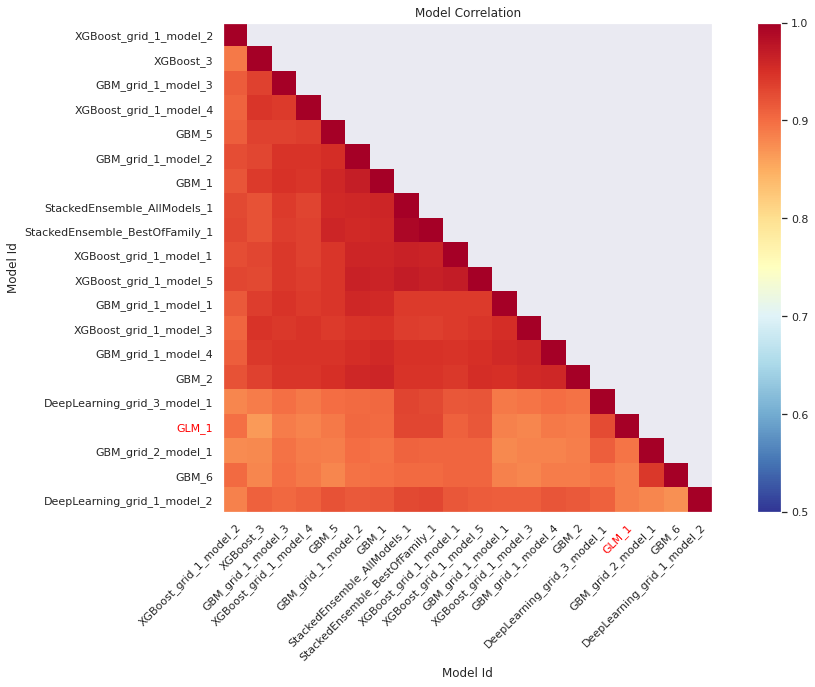

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

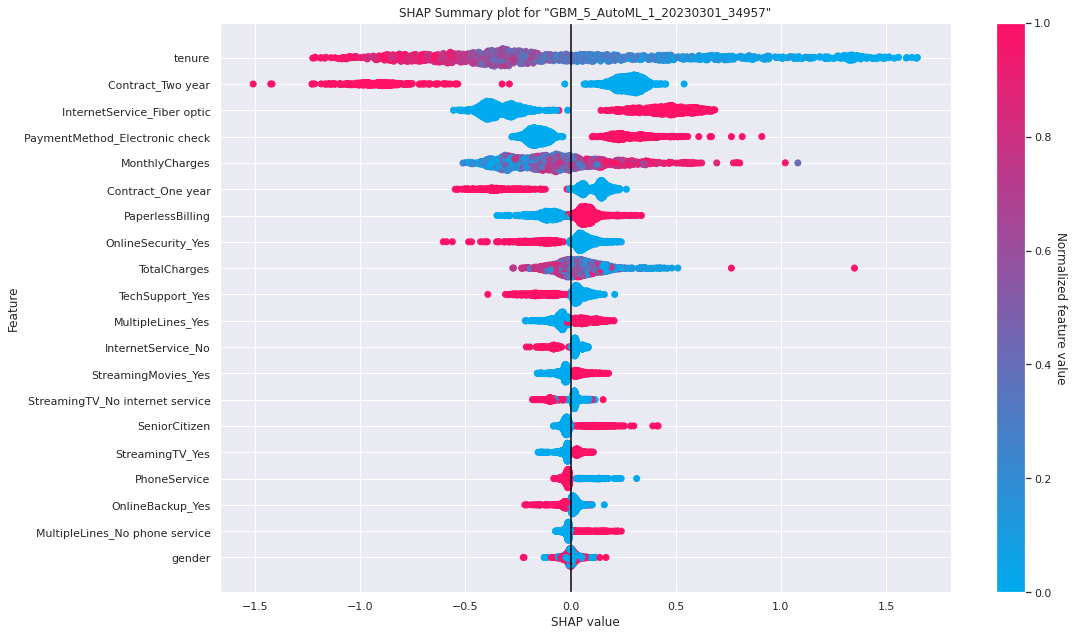

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

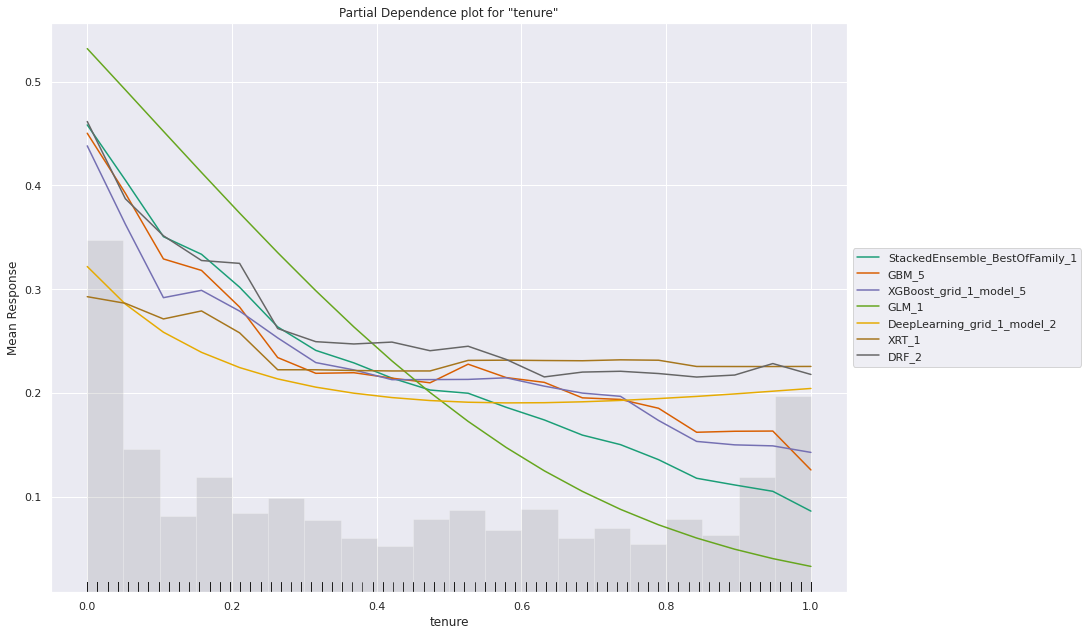

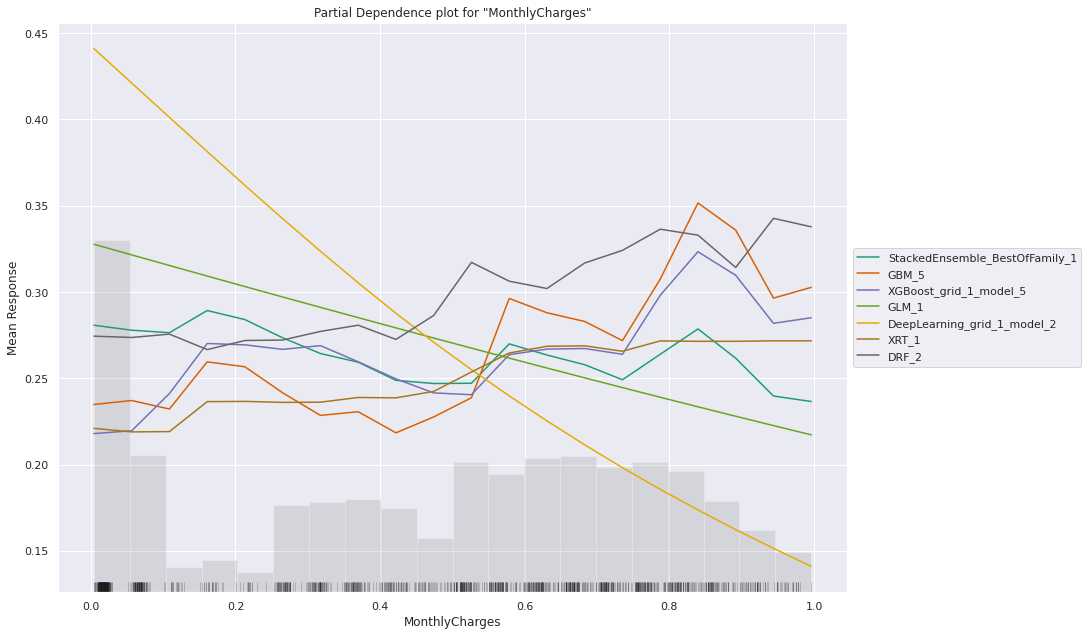

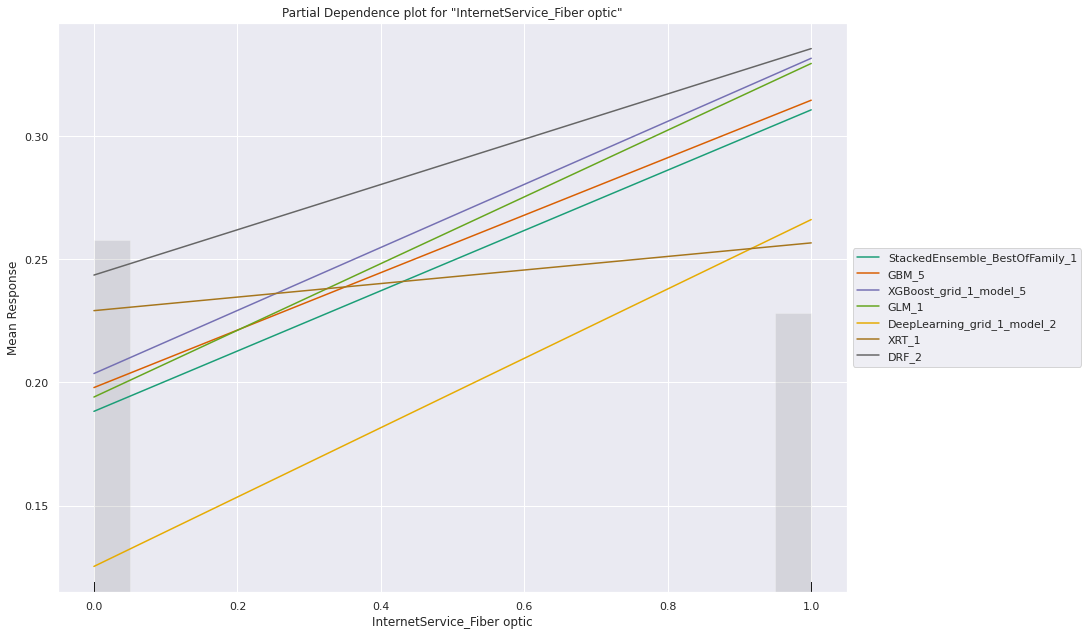

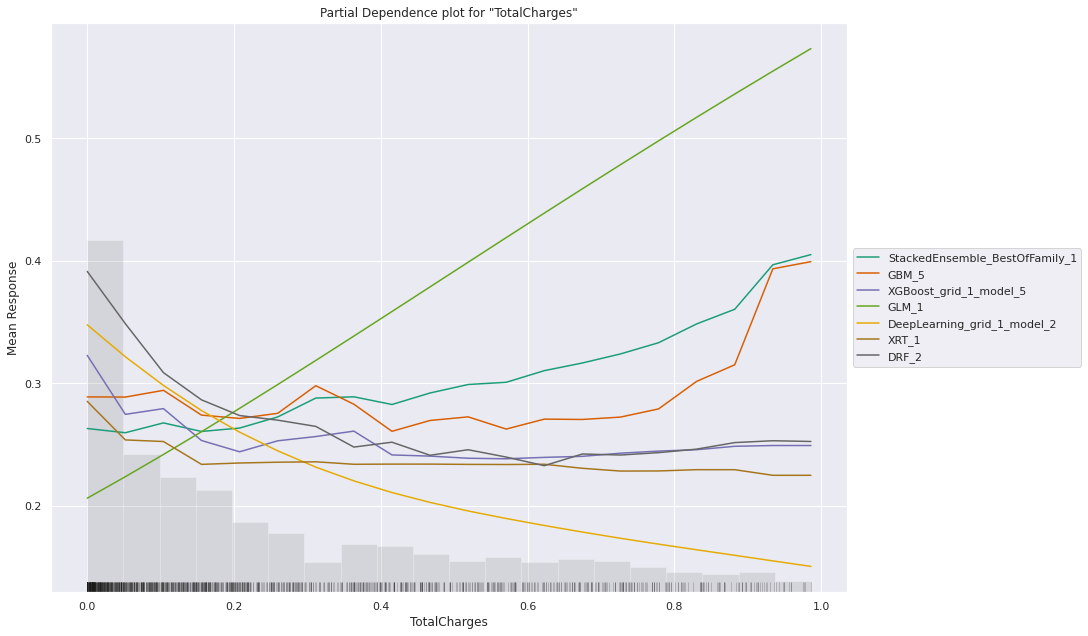

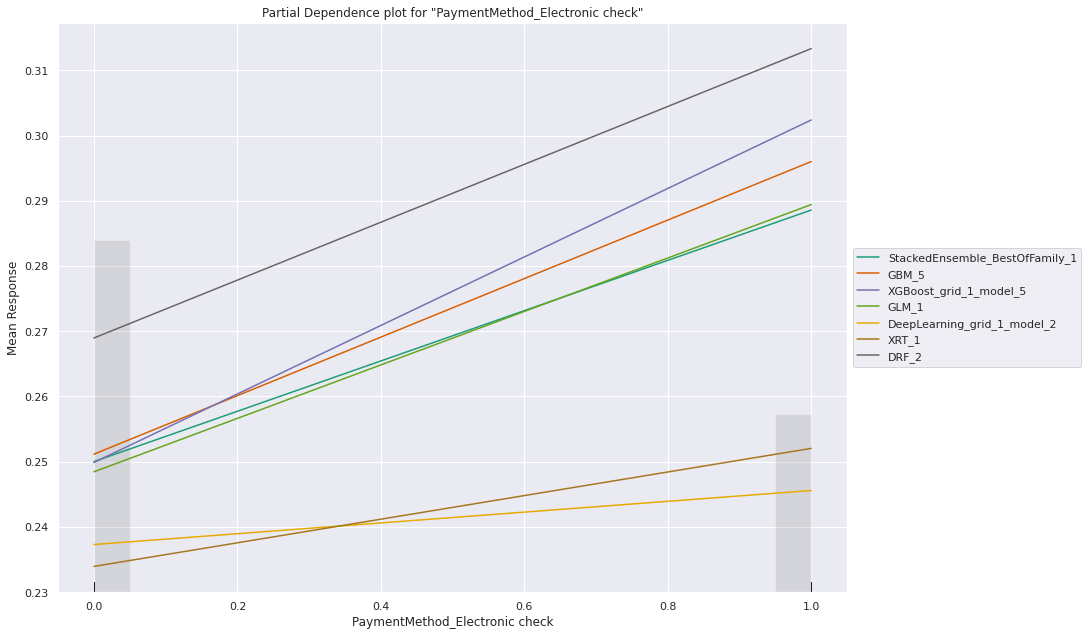

# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id                                                  auc    logloss     aucpr    mean_per_class_error      rmse        mse    training_time_ms    predict_time_per_row_ms  algo
---------------------------------------------------  --------  ---------  --------  ----------------------  --------  ---------  ------------------  -------------------------  ------------
DRF_2_AutoML_2_20230301_44405                        0.999956   0.124588  0.999886              0.00226729  0.15588   0.0242985                 521                   0.016169  DRF
XGBoost_grid_2_AutoML_2_20230301_44405_model_3       0.991184   0.178173  0.978436              0.048779    0.213787  0.045705                  155                   0.007417  XGBoost
XGBoost_grid_2_AutoML_2_20230301_44405_model_2       0.99084    0.169561  0.980053              0.051878    0.209751  0.0439955                1413                   0.006649  XGBoost
DeepLearning_grid_4_AutoML_2_20230301_44405_model_2  0.98686    0.149427  0.965751              0.0548061   0.198567  0.039429                17332                   0.01421   DeepLearning
GBM_9_AutoML_2_20230301_44405                        0.976227   0.252194  0.940466              0.084167    0.26511   0.0702834                 290                   0.011247  GBM
GBM_10_AutoML_2_20230301_44405                       0.971158   0.260683  0.932272              0.0896396   0.270034  0.0729183                 151                   0.010163  GBM
GBM_8_AutoML_2_20230301_44405                        0.963845   0.280266  0.911709              0.114033    0.285148  0.0813092                 162                   0.009847  GBM
GBM_grid_2_AutoML_2_20230301_44405_model_2           0.956842   0.290383  0.897936              0.118404    0.291127  0.0847548                 188                   0.016028  GBM
GBM_7_AutoML_2_20230301_44405                        0.956567   0.290134  0.900834              0.113087    0.290647  0.0844754                 270                   0.010082  GBM
XGBoost_6_AutoML_2_20230301_44405                    0.95193    0.273937  0.890201              0.131404    0.286705  0.0822                    143                   0.005691  XGBoost
GBM_grid_2_AutoML_2_20230301_44405_model_3           0.94887    0.30299   0.877284              0.122206    0.300836  0.0905024                 175                   0.009366  GBM
XGBoost_5_AutoML_2_20230301_44405                    0.934355   0.300376  0.867957              0.138696    0.301679  0.09101                   149                   0.007107  XGBoost
DeepLearning_grid_5_AutoML_2_20230301_44405_model_1  0.914423   0.372959  0.82056               0.154837    0.335495  0.112557                20887                   0.008019  DeepLearning
DeepLearning_grid_4_AutoML_2_20230301_44405_model_1  0.904276   0.339825  0.825029              0.165421    0.319517  0.102091                21110                   0.005847  DeepLearning
GBM_grid_2_AutoML_2_20230301_44405_model_1           0.902214   0.364922  0.79074               0.182166    0.337388  0.113831                  136                   0.007875  GBM
XGBoost_grid_2_AutoML_2_20230301_44405_model_4       0.902169   0.351303  0.804825              0.177737    0.330019  0.108912                  134                   0.00634   XGBoost
DeepLearning_grid_6_AutoML_2_20230301_44405_model_1  0.900263   0.378343  0.811137              0.157119    0.335191  0.112353                21033                   0.01387   DeepLearning
XGBoost_grid_2_AutoML_2_20230301_44405_model_1       0.89969    0.353686  0.80547               0.172705    0.330608  0.109302                  153                   0.007048  XGBoost
GBM_grid_2_AutoML_2_20230301_44405_model_4           0.898807   0.371747  0.778797              0.176457    0.341074  0.116332                  120                   0.00842   GBM
XGBoost_grid_2_AutoML_2_20230301_44405_model_5       0.895022   0.362073  0.79058               0.180331    0.336941  0.113529                  133   

# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## StackedEnsemble_BestOfFamily_1_AutoML_1_20230301_34957

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.2755484555915629
       No    Yes    Error    Rate
-----  ----  -----  -------  --------------
No     765   240    0.2388   (240.0/1005.0)
Yes    82    311    0.2087   (82.0/393.0)
Total  847   551    0.2303   (322.0/1398.0)

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

In [83]:
# Explain leader model & compare with all AutoML models
exa = aml.explain(test)
exa

# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id                                                     auc    logloss     aucpr    mean_per_class_error      rmse        mse    training_time_ms    predict_time_per_row_ms  algo
------------------------------------------------------  --------  ---------  --------  ----------------------  --------  ---------  ------------------  -------------------------  ---------------
DRF_1_AutoML_1_20230301_34957                           0.999887   0.122431  0.999697              0.00289627  0.155037  0.0240365                2433                   0.016683  DRF
GBM_4_AutoML_1_20230301_34957                           0.966      0.264489  0.906186              0.110633    0.277231  0.0768571                1017                   0.009089  GBM
GBM_3_AutoML_1_20230301_34957                           0.940902   0.303465  0.85048               0.140081    0.30399   0.0924102                 506                   0.00716   GBM
XGBoost_2_AutoML_1_20230301_34957                       0.932136   0.298103  0.8349                0.145111    0.304048  0.0924454                 805                   0.004292  XGBoost
GBM_grid_1_AutoML_1_20230301_34957_model_4              0.924665   0.323434  0.806194              0.161568    0.318477  0.101427                  516                   0.008078  GBM
GBM_2_AutoML_1_20230301_34957                           0.92289    0.326597  0.806586              0.155822    0.319487  0.102072                  757                   0.006935  GBM
GBM_grid_1_AutoML_1_20230301_34957_model_1              0.918285   0.332682  0.794293              0.168882    0.323583  0.104706                  724                   0.007424  GBM
GBM_5_AutoML_1_20230301_34957                           0.918099   0.331326  0.796375              0.168473    0.322324  0.103893                  724                   0.008146  GBM
GBM_grid_1_AutoML_1_20230301_34957_model_3              0.916096   0.337331  0.78939               0.173962    0.325753  0.106115                  485                   0.008546  GBM
XGBoost_grid_1_AutoML_1_20230301_34957_model_3          0.912537   0.330667  0.795446              0.172647    0.322363  0.103918                  521                   0.004389  XGBoost
XGBoost_1_AutoML_1_20230301_34957                       0.911444   0.328808  0.793352              0.17305     0.321396  0.103296                  786                   0.004151  XGBoost
XGBoost_3_AutoML_1_20230301_34957                       0.90618    0.338633  0.773723              0.189869    0.328938  0.108201                  431                   0.003974  XGBoost
StackedEnsemble_BestOfFamily_1_AutoML_1_20230301_34957  0.892111   0.360548  0.748027              0.199875    0.340129  0.115688                 5344                   0.025292  StackedEnsemble
XGBoost_grid_1_AutoML_1_20230301_34957_model_4          0.892008   0.357133  0.754066              0.195654    0.336959  0.113542                  514                   0.003922  XGBoost
GBM_grid_1_AutoML_1_20230301_34957_model_2              0.891667   0.362503  0.740469              0.195779    0.340945  0.116244                  557                   0.008989  GBM
DeepLearning_grid_1_AutoML_1_20230301_34957_model_2     0.890749   0.359698  0.743758              0.198048    0.340314  0.115814                32944                   0.006248  DeepLearning
StackedEnsemble_AllModels_1_AutoML_1_20230301_34957     0.889298   0.364788  0.743449              0.204724    0.342495  0.117303                 8943                   0.026657  StackedEnsemble
GBM_1_AutoML_1_20230301_34957                           0.881468   0.374356  0.719457              0.212539    0.347403  0.120689                 1017                   0.007368  GBM
XGBoost_grid_1_AutoML_1_20230301_34957_model_5          0.873857   0.381433  0.714025              0.213492    0.349946  0.122462                  731                   0.004633  XGBoost
XGBoost_grid_1_AutoML_1_20230301_34957_model_2          0.870361   0.383758  0.701546  

# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## StackedEnsemble_BestOfFamily_1_AutoML_1_20230301_34957

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3553799003244873
       No    Yes    Error    Rate
-----  ----  -----  -------  ---------------
No     3479  679    0.1633   (679.0/4158.0)
Yes    349   1127   0.2364   (349.0/1476.0)
Total  3828  1806   0.1825   (1028.0/5634.0)

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

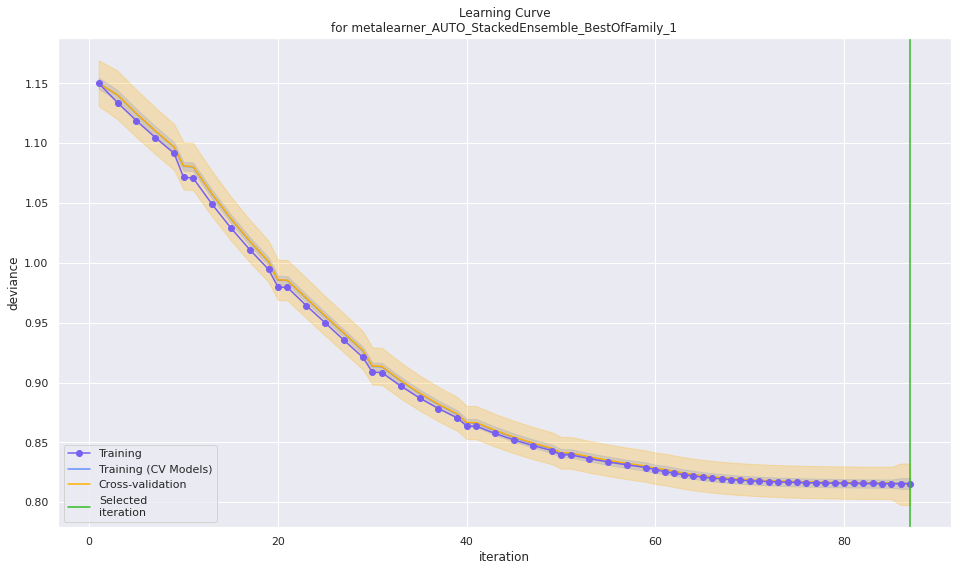

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

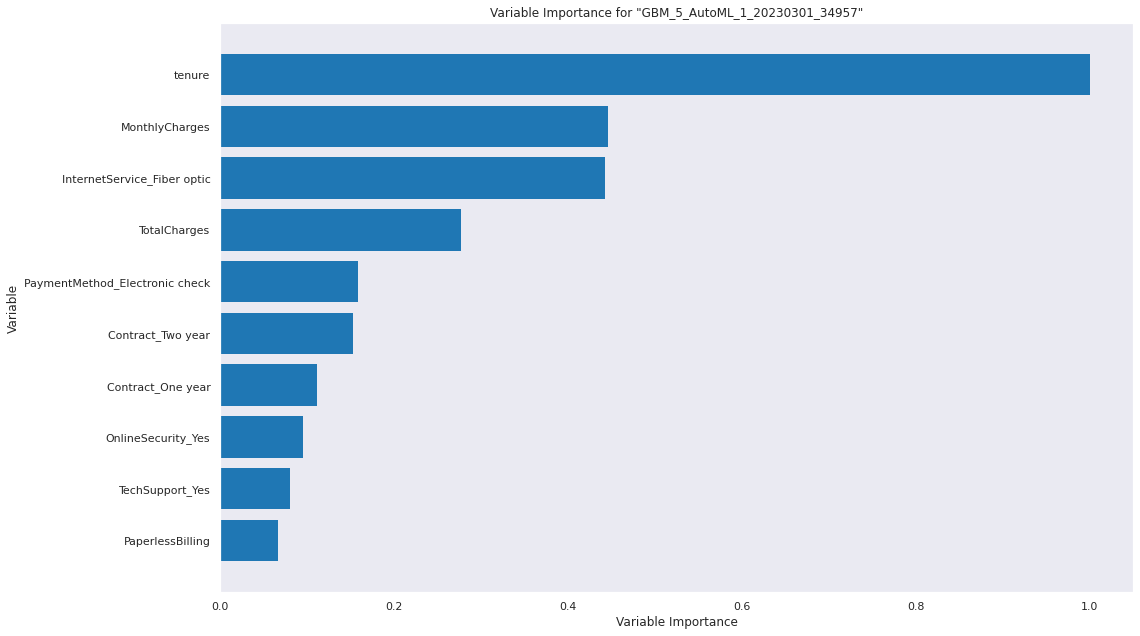

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

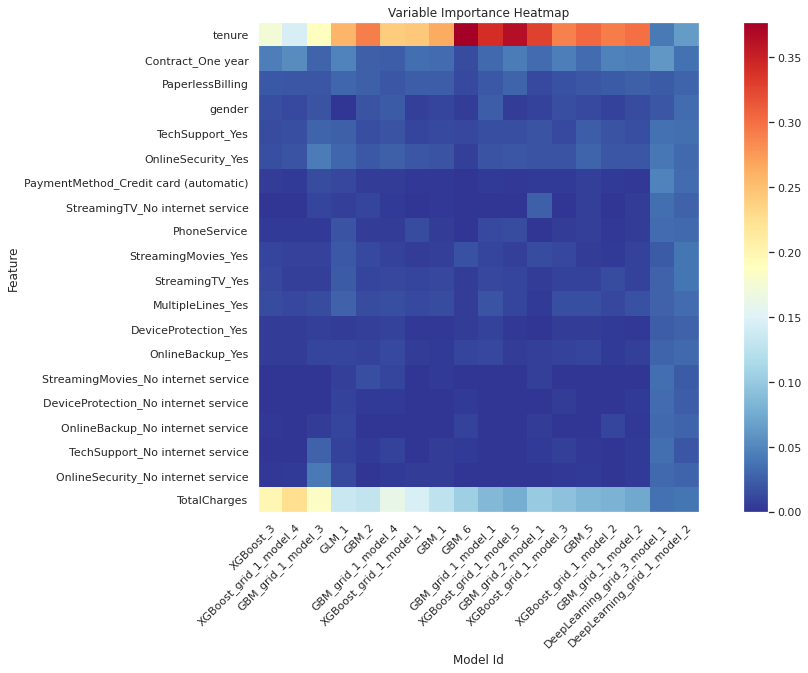

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

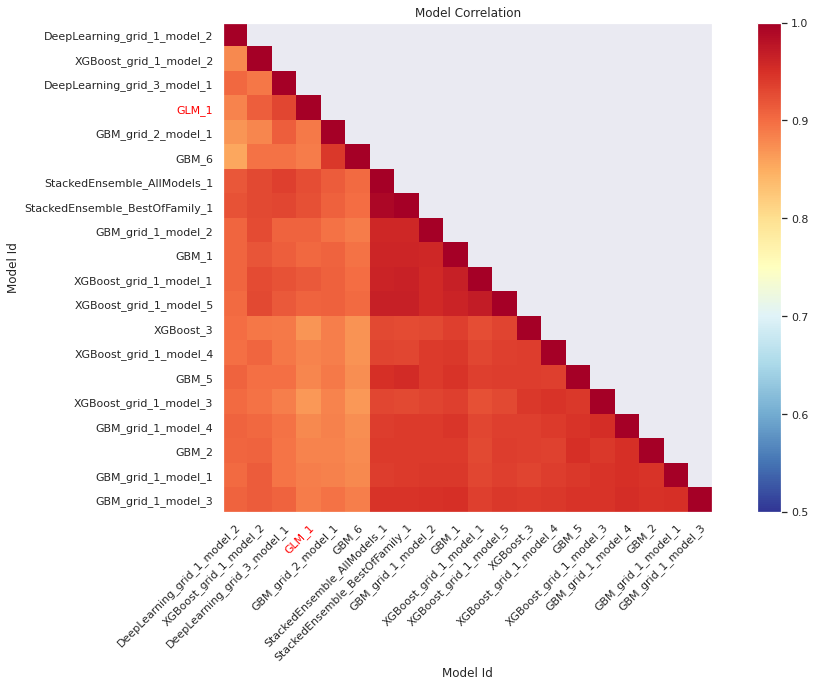

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

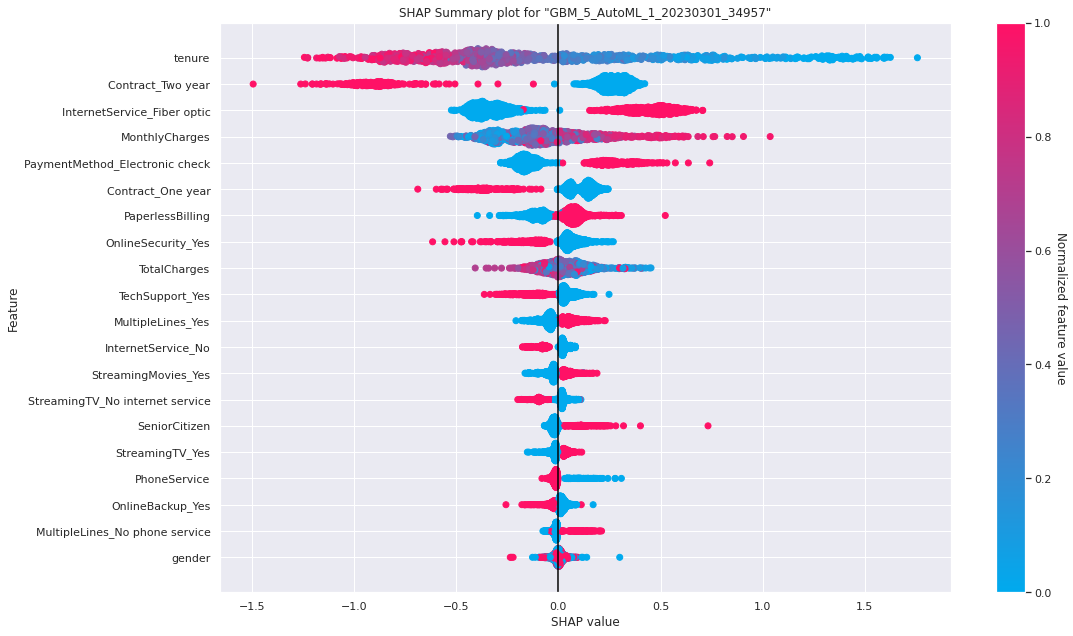

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

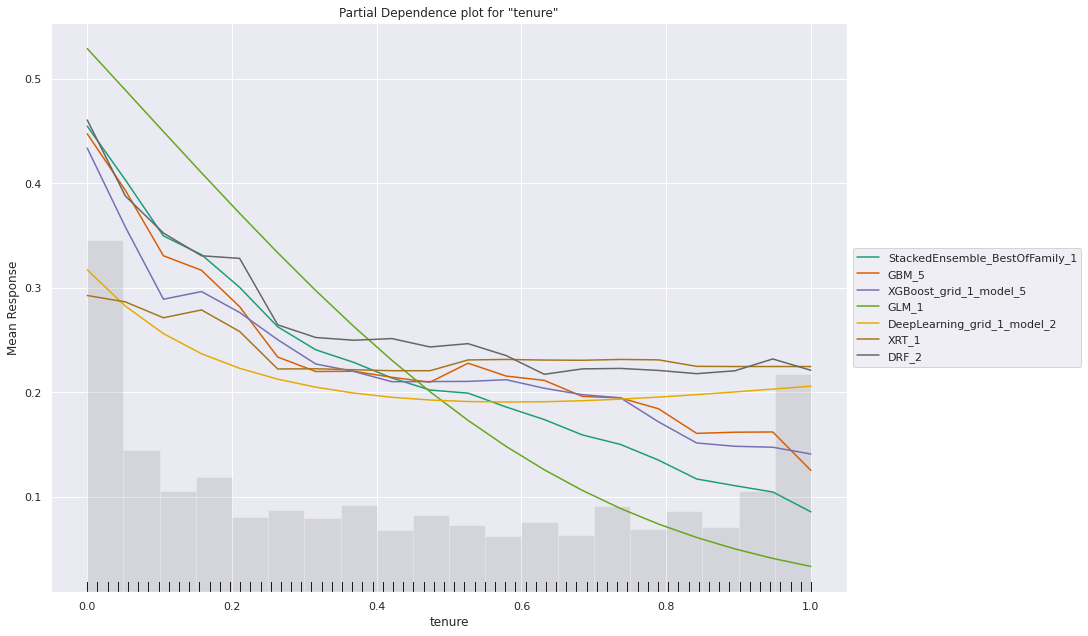

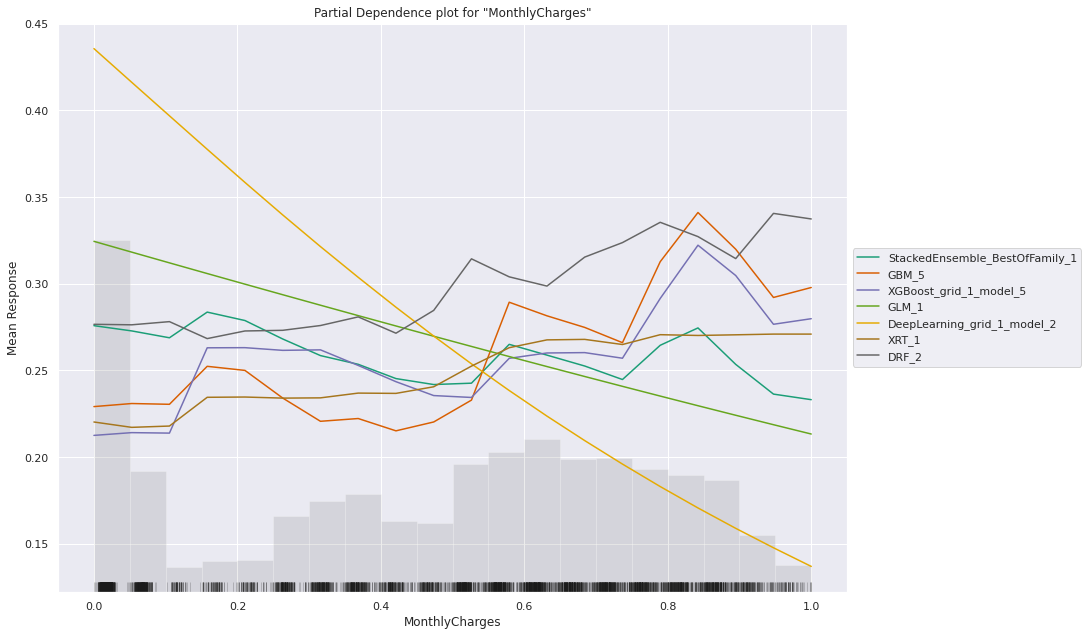

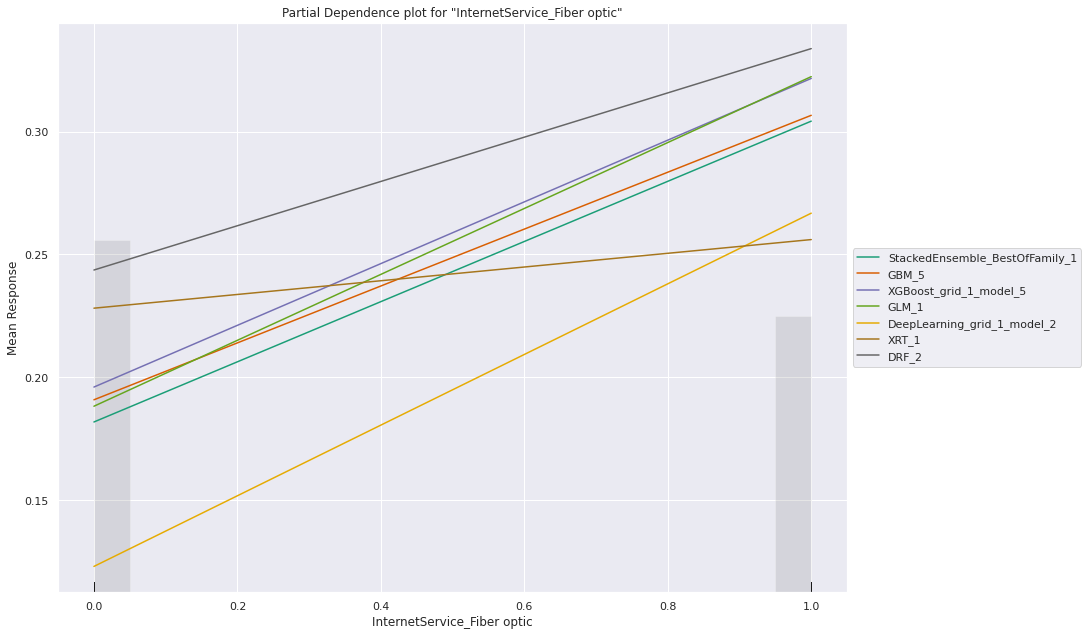

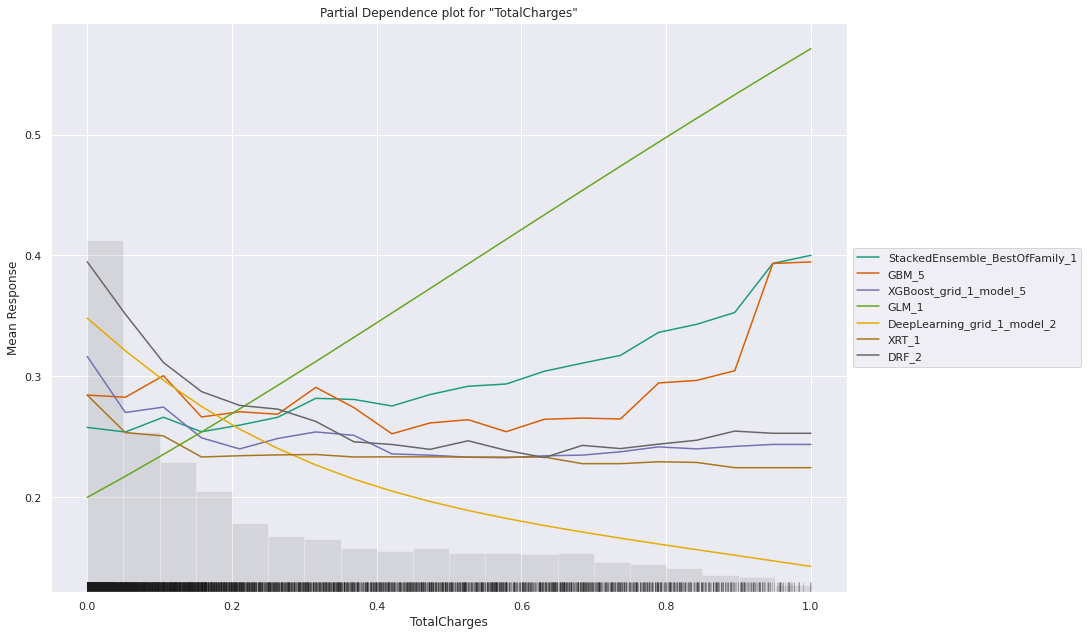

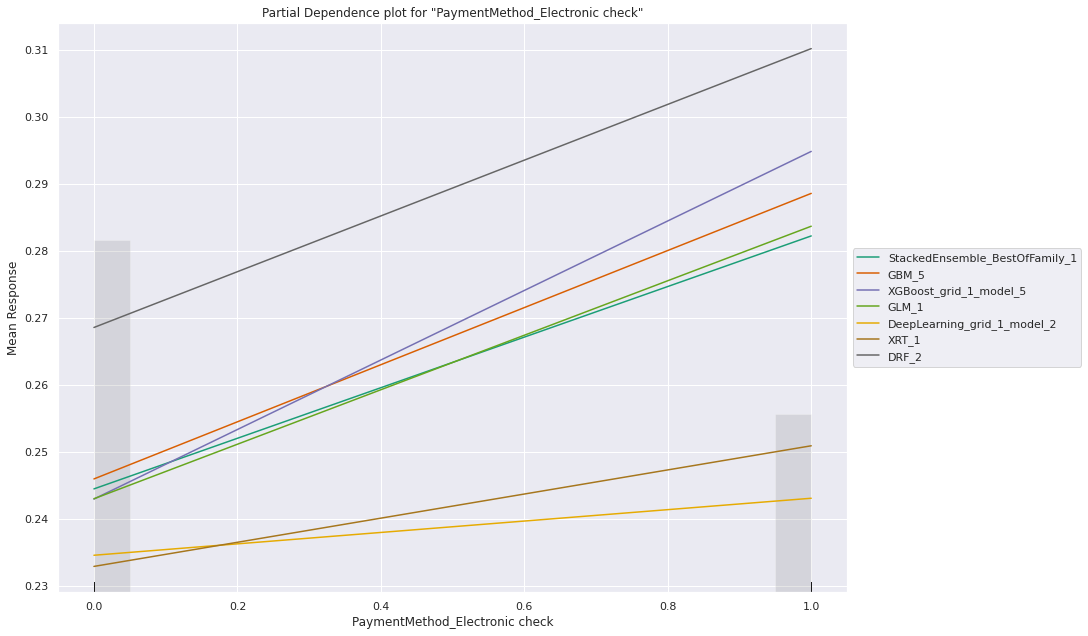

# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id                                                     auc    logloss     aucpr    mean_per_class_error      rmse        mse    training_time_ms    predict_time_per_row_ms  algo
------------------------------------------------------  --------  ---------  --------  ----------------------  --------  ---------  ------------------  -------------------------  ---------------
DRF_1_AutoML_1_20230301_34957                           0.999887   0.122431  0.999697              0.00289627  0.155037  0.0240365                2433                   0.016683  DRF
GBM_4_AutoML_1_20230301_34957                           0.966      0.264489  0.906186              0.110633    0.277231  0.0768571                1017                   0.009089  GBM
GBM_3_AutoML_1_20230301_34957                           0.940902   0.303465  0.85048               0.140081    0.30399   0.0924102                 506                   0.00716   GBM
XGBoost_2_AutoML_1_20230301_34957                       0.932136   0.298103  0.8349                0.145111    0.304048  0.0924454                 805                   0.004292  XGBoost
GBM_grid_1_AutoML_1_20230301_34957_model_4              0.924665   0.323434  0.806194              0.161568    0.318477  0.101427                  516                   0.008078  GBM
GBM_2_AutoML_1_20230301_34957                           0.92289    0.326597  0.806586              0.155822    0.319487  0.102072                  757                   0.006935  GBM
GBM_grid_1_AutoML_1_20230301_34957_model_1              0.918285   0.332682  0.794293              0.168882    0.323583  0.104706                  724                   0.007424  GBM
GBM_5_AutoML_1_20230301_34957                           0.918099   0.331326  0.796375              0.168473    0.322324  0.103893                  724                   0.008146  GBM
GBM_grid_1_AutoML_1_20230301_34957_model_3              0.916096   0.337331  0.78939               0.173962    0.325753  0.106115                  485                   0.008546  GBM
XGBoost_grid_1_AutoML_1_20230301_34957_model_3          0.912537   0.330667  0.795446              0.172647    0.322363  0.103918                  521                   0.004389  XGBoost
XGBoost_1_AutoML_1_20230301_34957                       0.911444   0.328808  0.793352              0.17305     0.321396  0.103296                  786                   0.004151  XGBoost
XGBoost_3_AutoML_1_20230301_34957                       0.90618    0.338633  0.773723              0.189869    0.328938  0.108201                  431                   0.003974  XGBoost
StackedEnsemble_BestOfFamily_1_AutoML_1_20230301_34957  0.892111   0.360548  0.748027              0.199875    0.340129  0.115688                 5344                   0.025292  StackedEnsemble
XGBoost_grid_1_AutoML_1_20230301_34957_model_4          0.892008   0.357133  0.754066              0.195654    0.336959  0.113542                  514                   0.003922  XGBoost
GBM_grid_1_AutoML_1_20230301_34957_model_2              0.891667   0.362503  0.740469              0.195779    0.340945  0.116244                  557                   0.008989  GBM
DeepLearning_grid_1_AutoML_1_20230301_34957_model_2     0.890749   0.359698  0.743758              0.198048    0.340314  0.115814                32944                   0.006248  DeepLearning
StackedEnsemble_AllModels_1_AutoML_1_20230301_34957     0.889298   0.364788  0.743449              0.204724    0.342495  0.117303                 8943                   0.026657  StackedEnsemble
GBM_1_AutoML_1_20230301_34957                           0.881468   0.374356  0.719457              0.212539    0.347403  0.120689                 1017                   0.007368  GBM
XGBoost_grid_1_AutoML_1_20230301_34957_model_5          0.873857   0.381433  0.714025              0.213492    0.349946  0.122462                  731                   0.004633  XGBoost
XGBoost_grid_1_AutoML_1_20230301_34957_model_2          0.870361   0.383758  0.701546  

# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## StackedEnsemble_BestOfFamily_1_AutoML_1_20230301_34957

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3553799003244873
       No    Yes    Error    Rate
-----  ----  -----  -------  ---------------
No     3479  679    0.1633   (679.0/4158.0)
Yes    349   1127   0.2364   (349.0/1476.0)
Total  3828  1806   0.1825   (1028.0/5634.0)

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

In [84]:
# Explain leader model & compare with all AutoML models
ex_train = aml.explain(train)
ex_train

# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## StackedEnsemble_BestOfFamily_1_AutoML_1_20230301_34957

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.2755484555915629
       No    Yes    Error    Rate
-----  ----  -----  -------  --------------
No     765   240    0.2388   (240.0/1005.0)
Yes    82    311    0.2087   (82.0/393.0)
Total  847   551    0.2303   (322.0/1398.0)

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

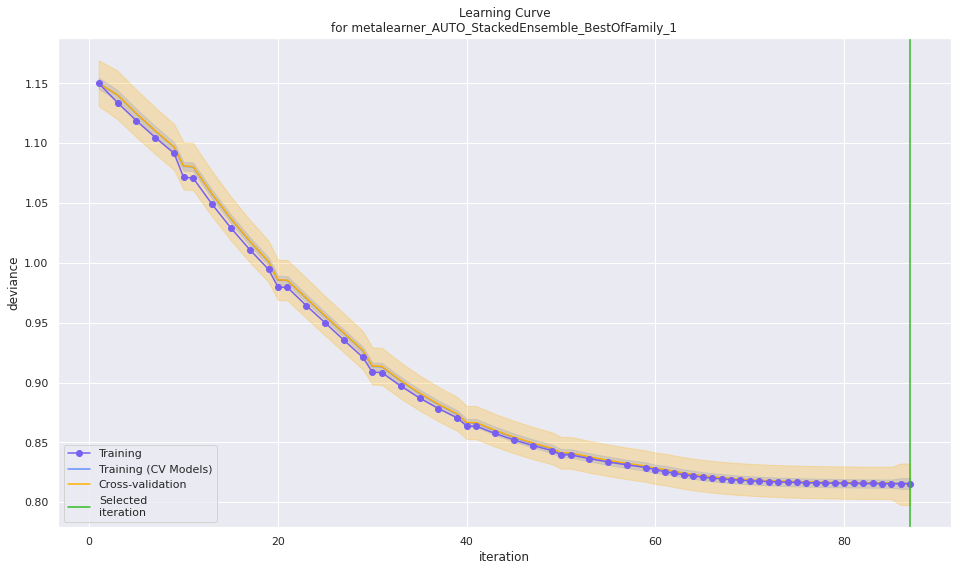

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

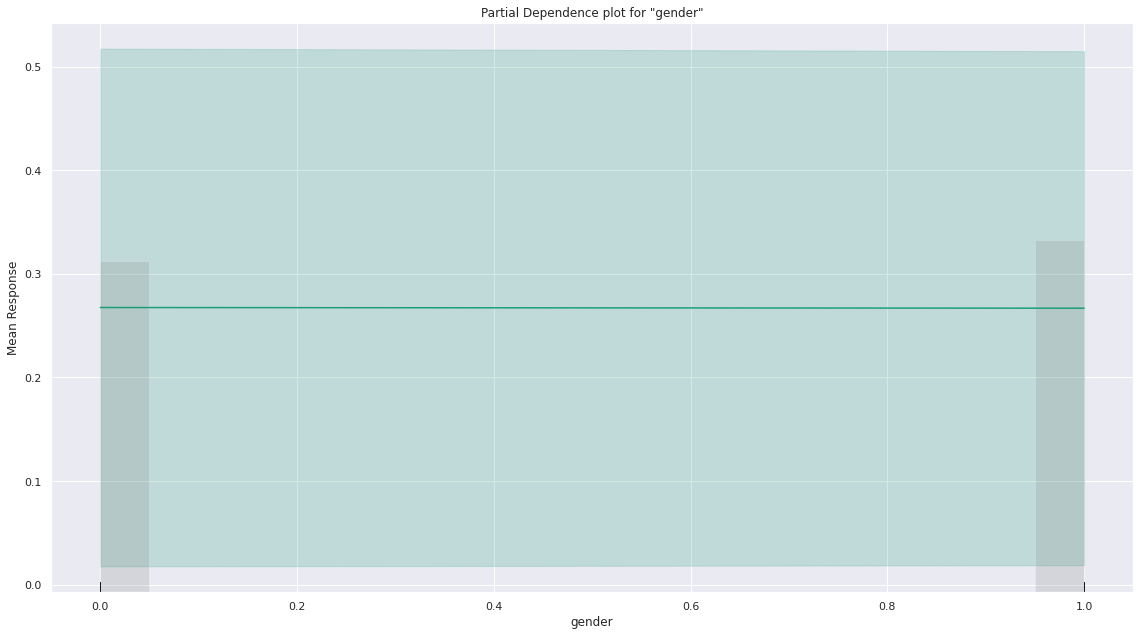

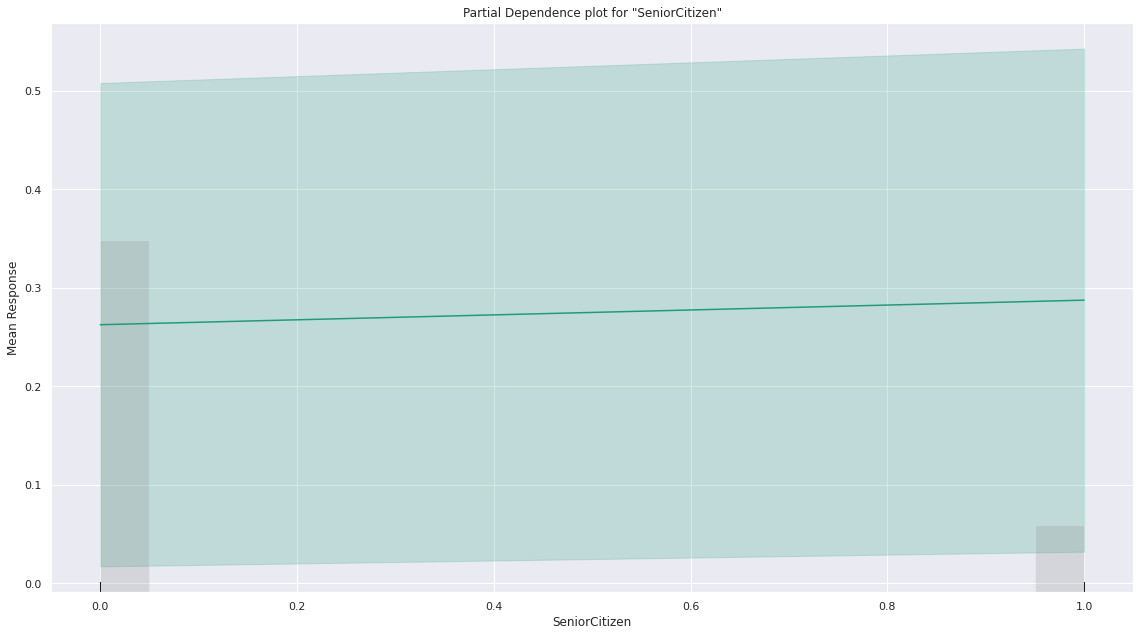

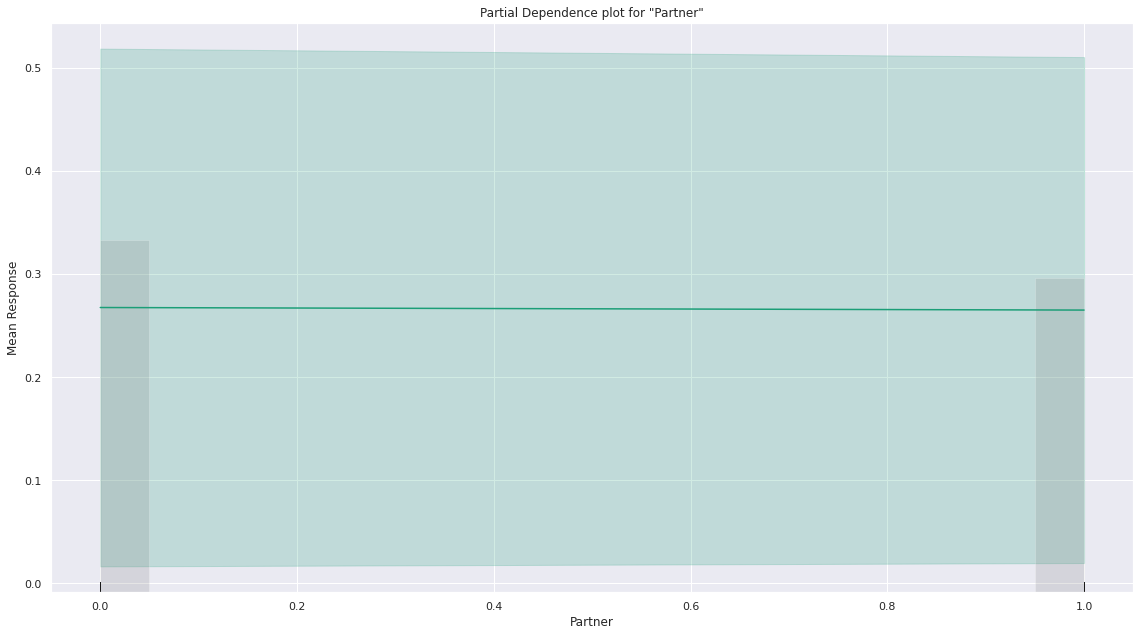

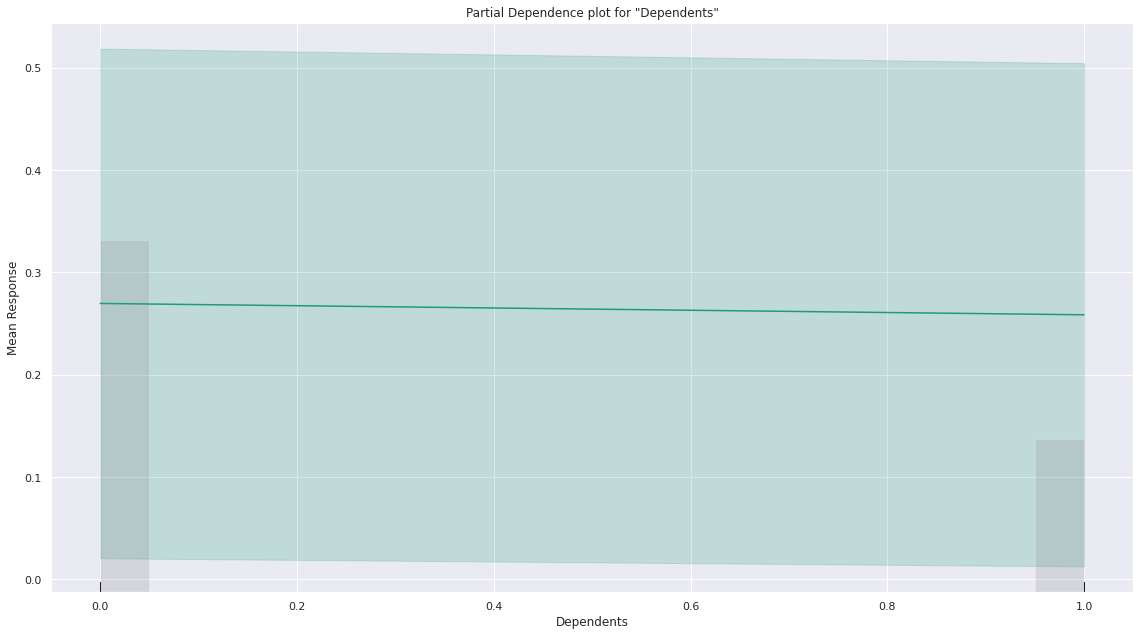

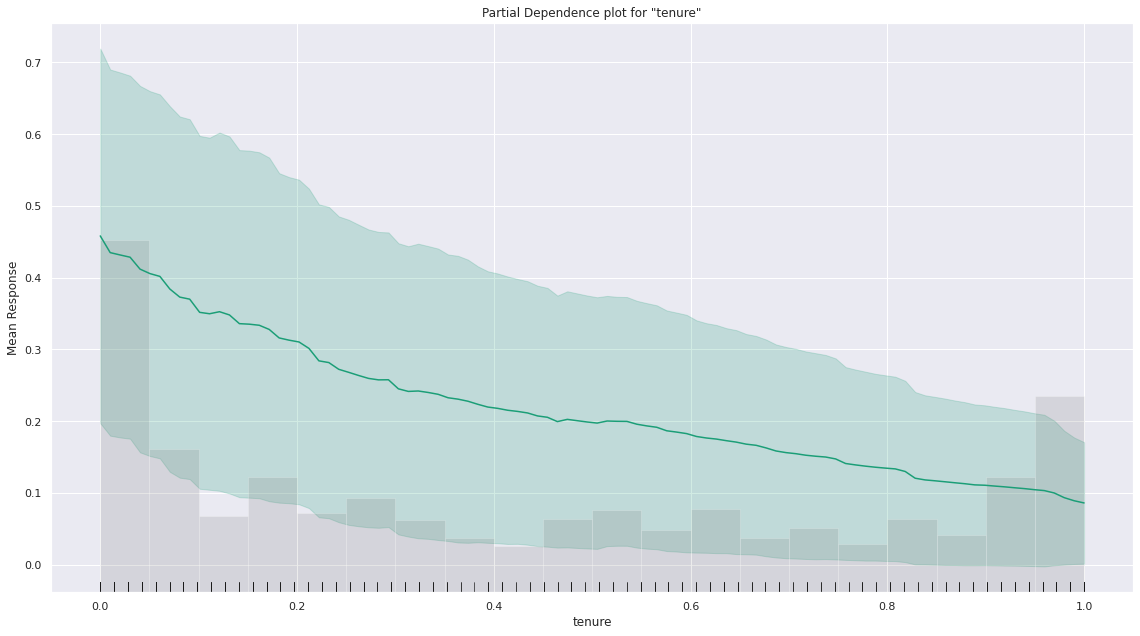

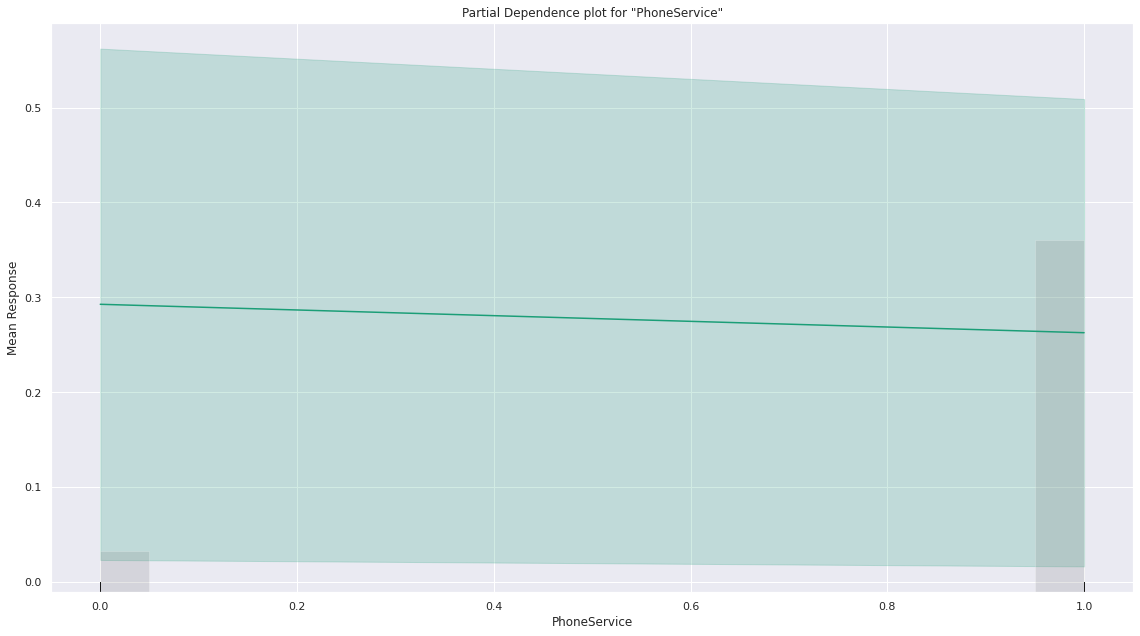

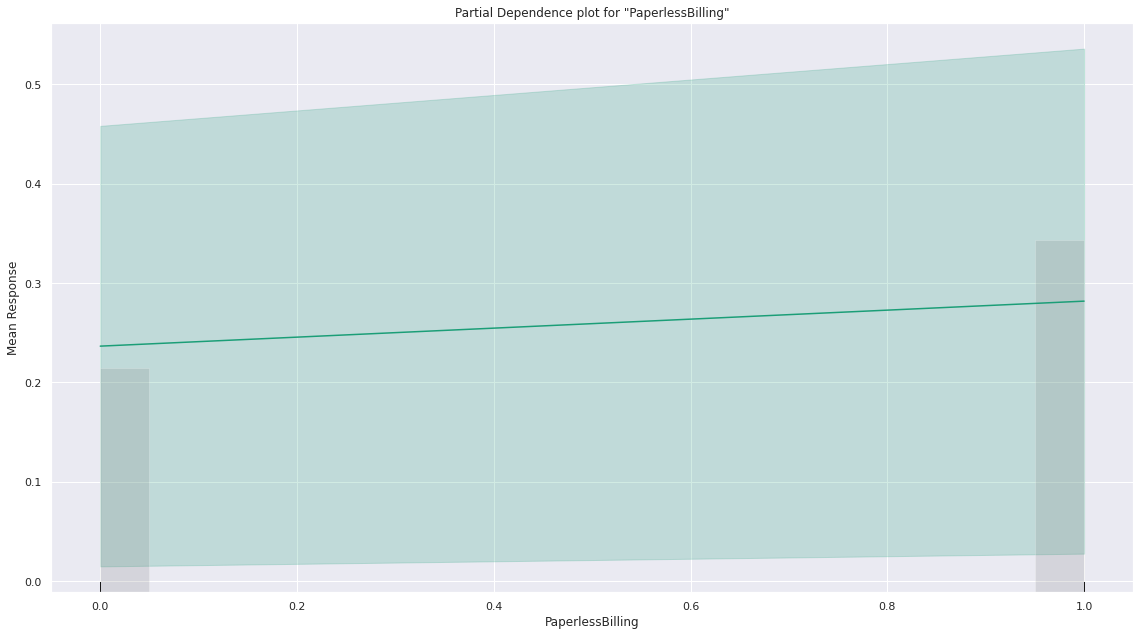

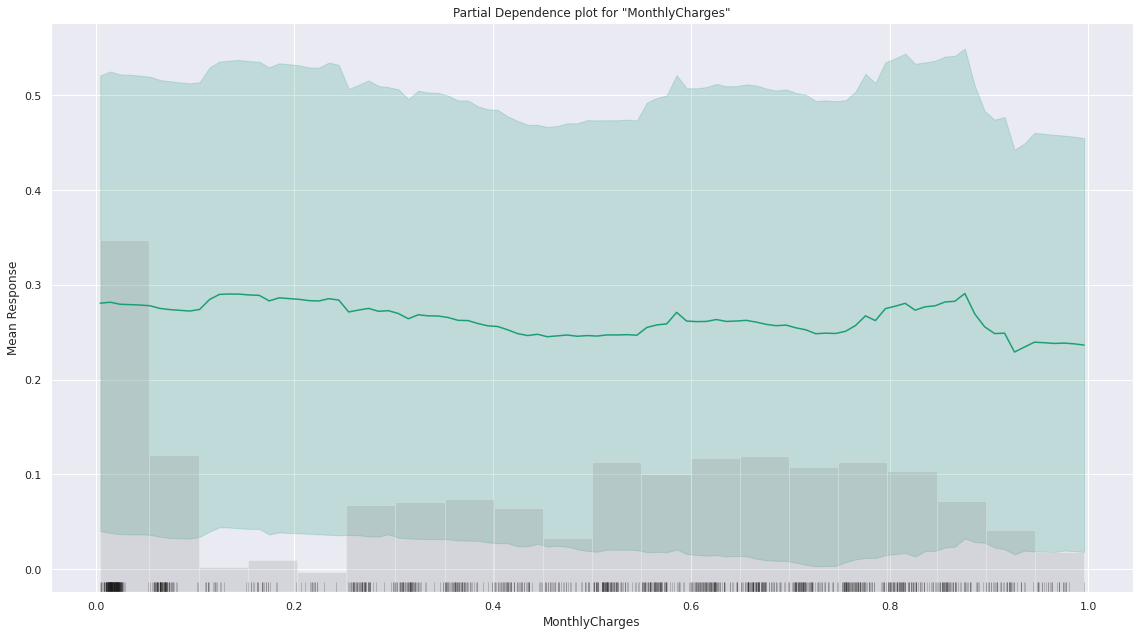

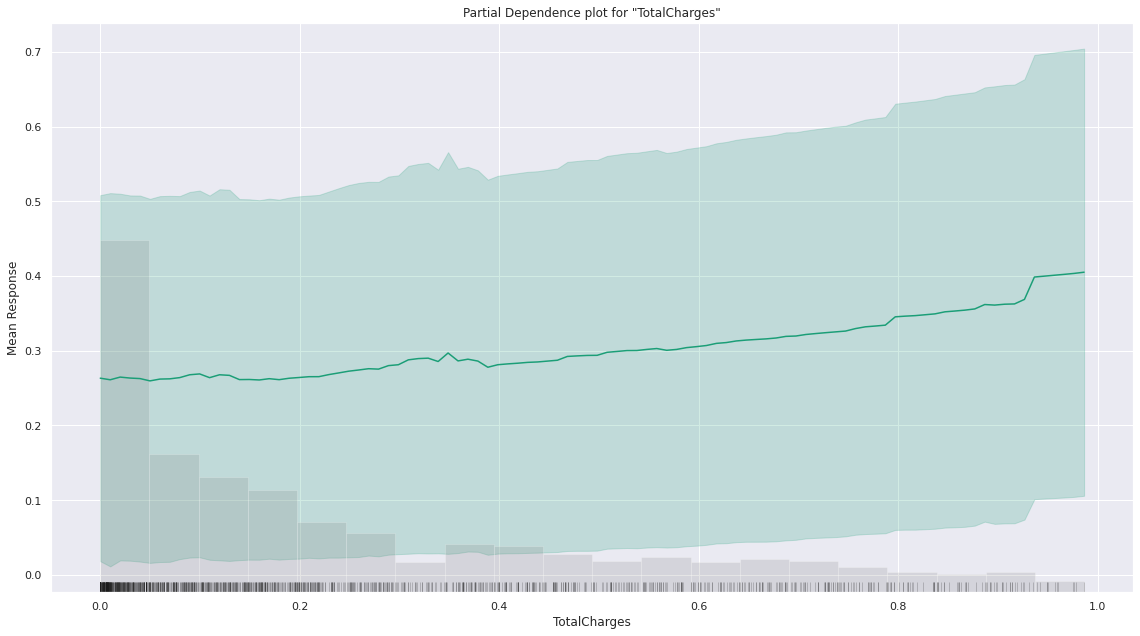

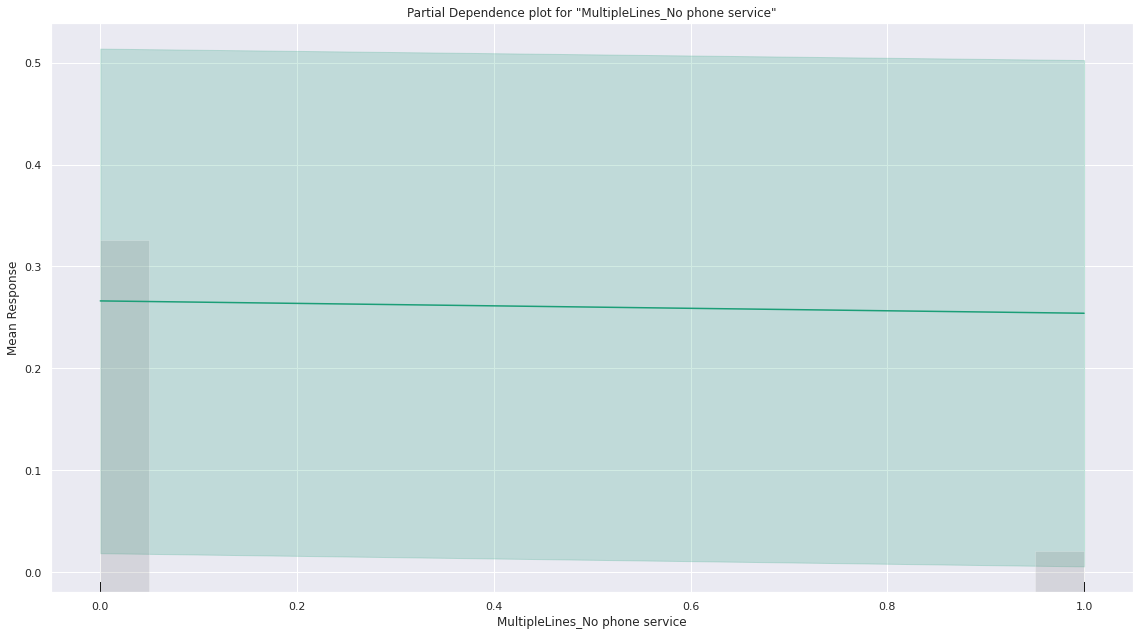

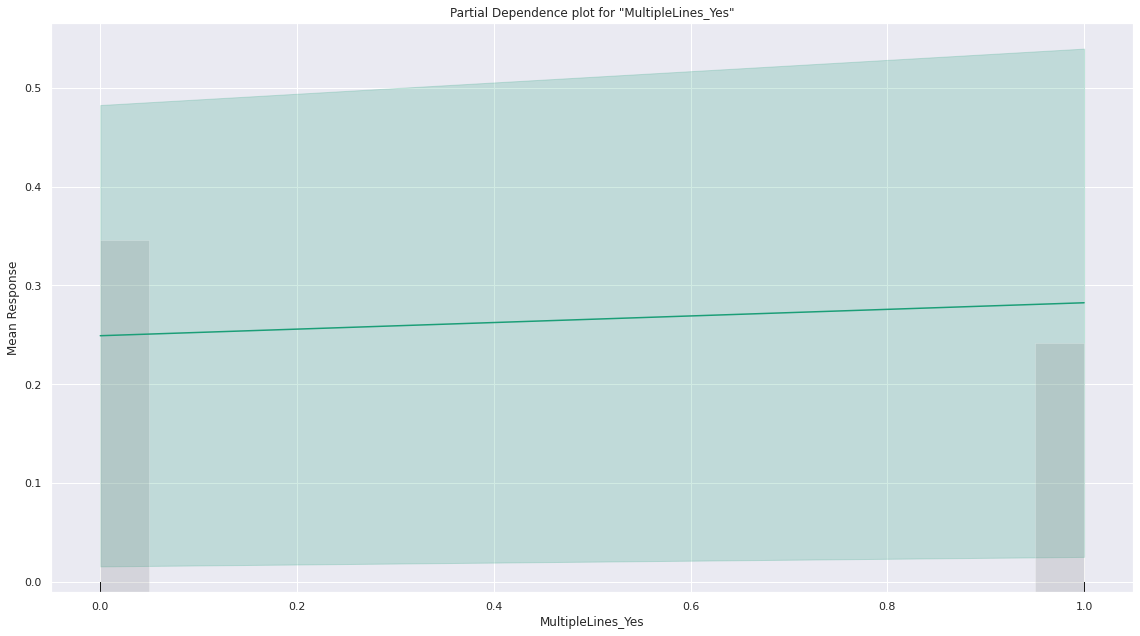

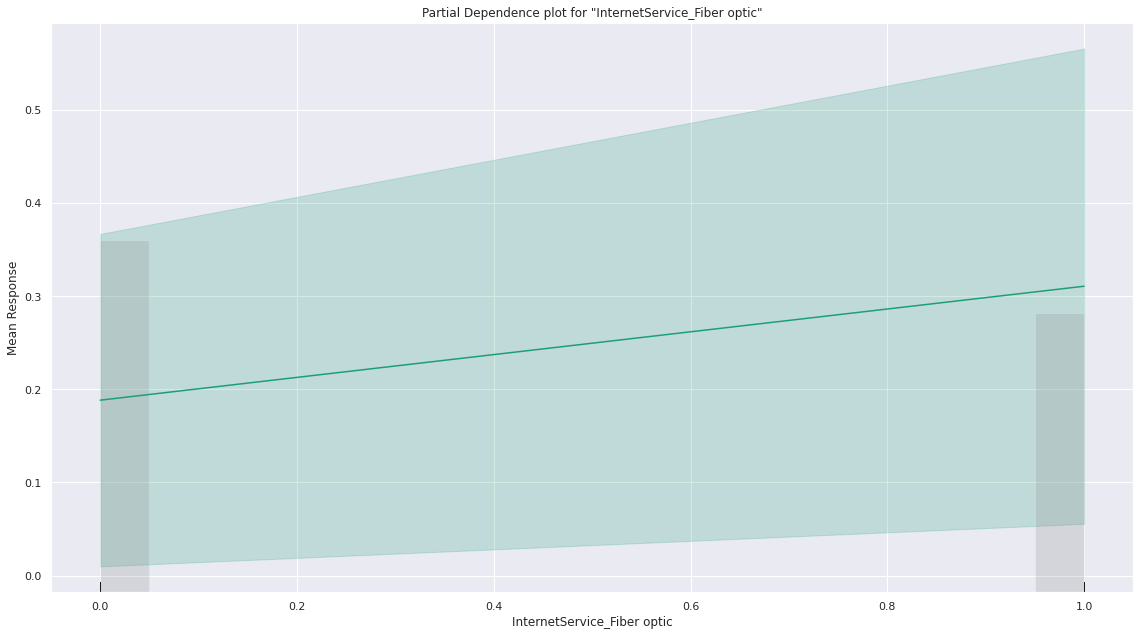

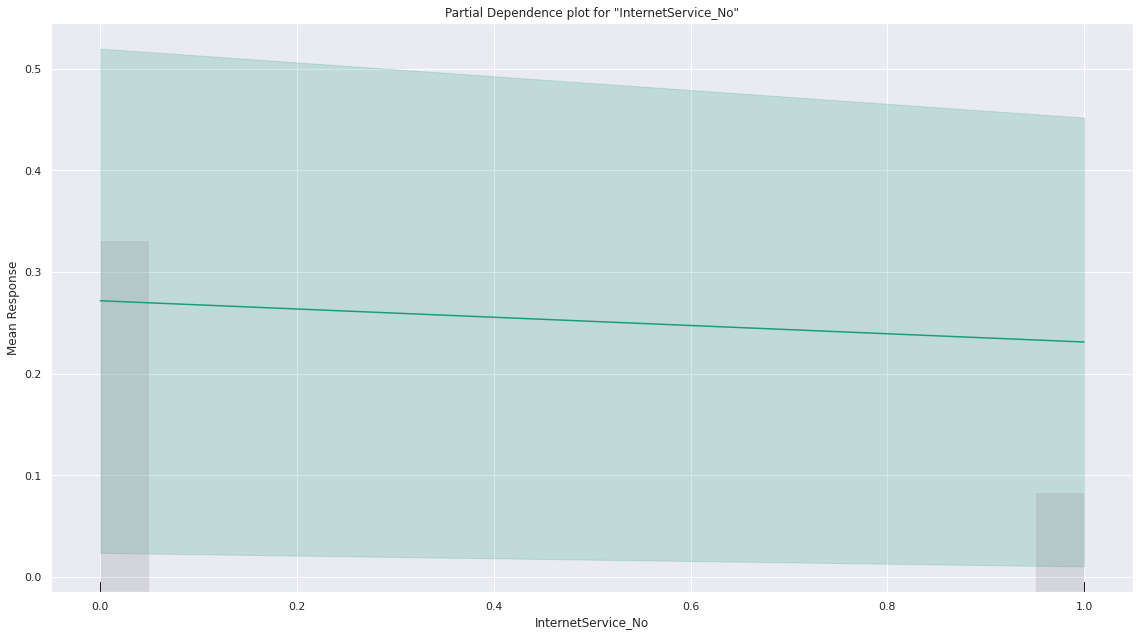

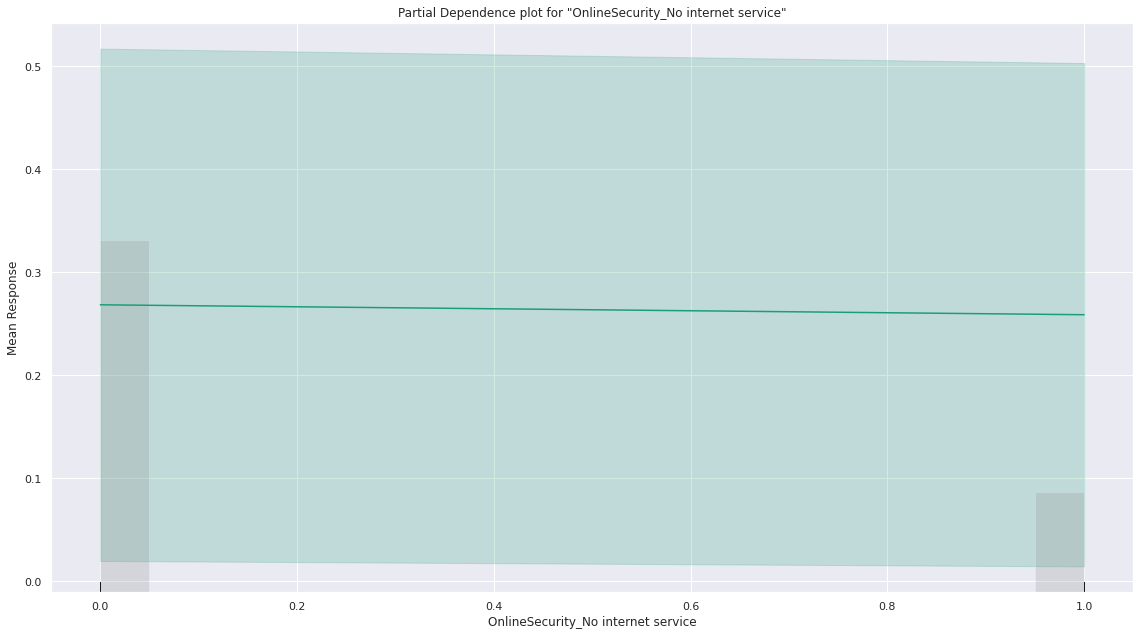

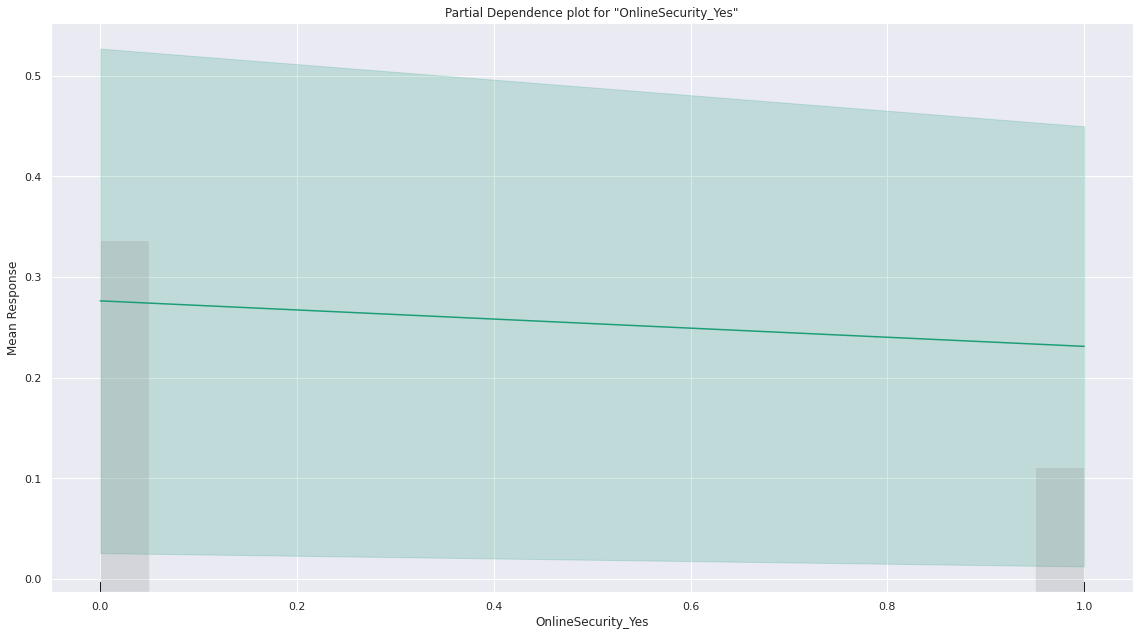

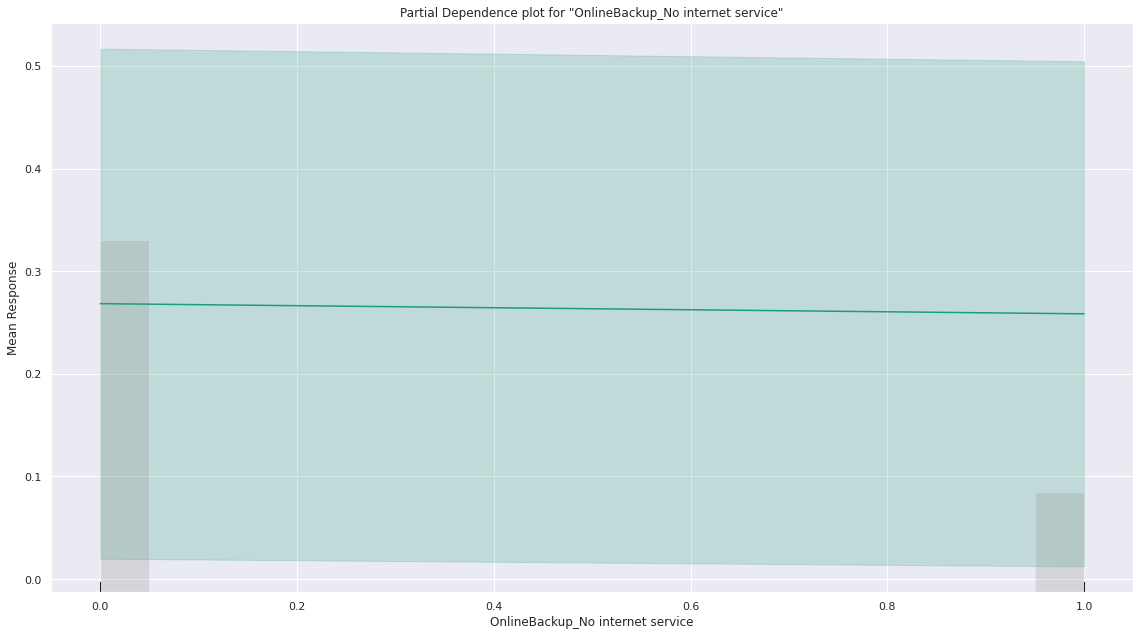

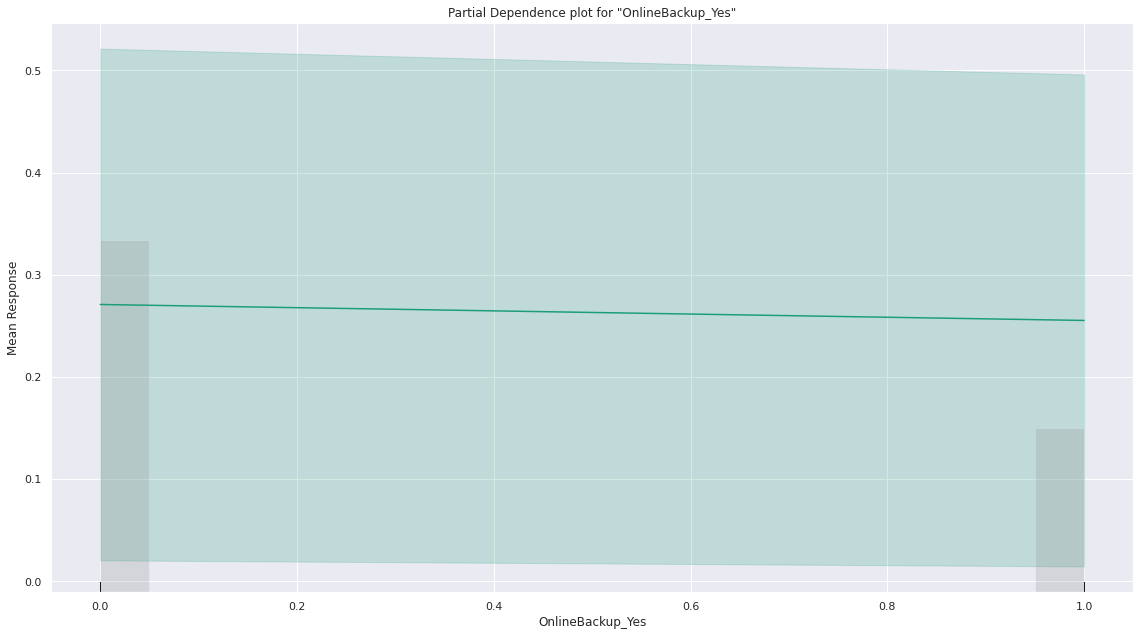

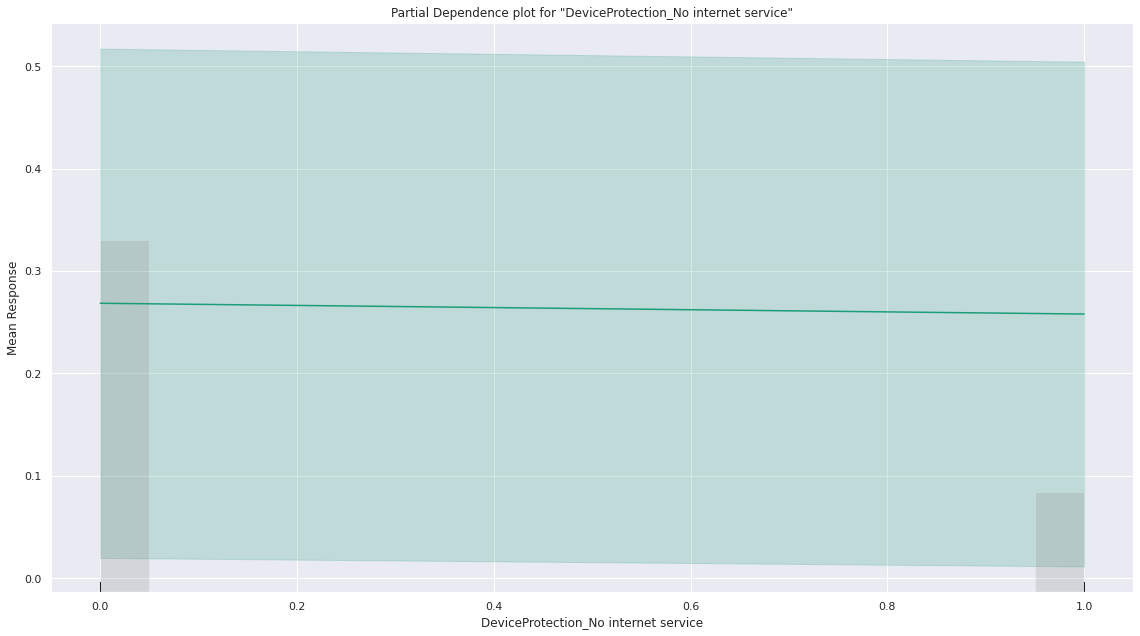

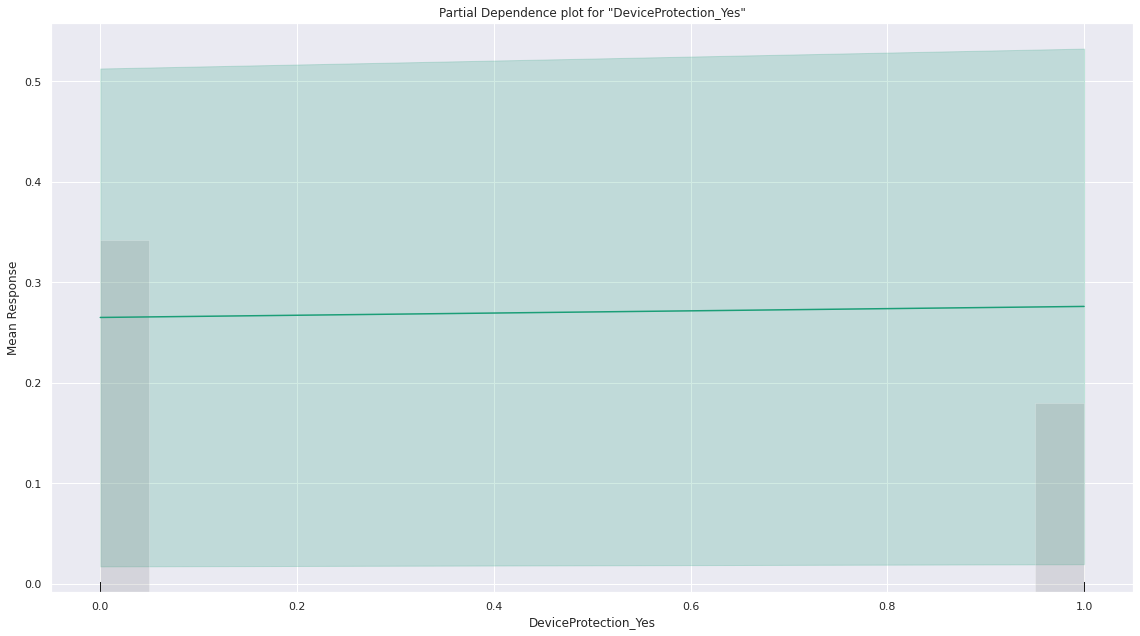

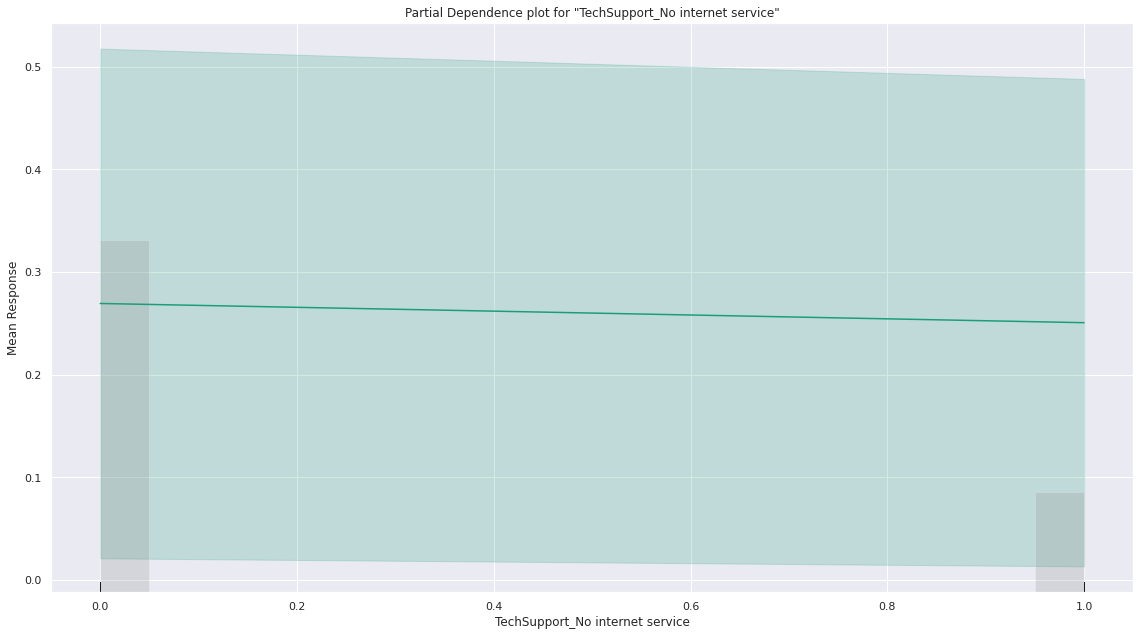

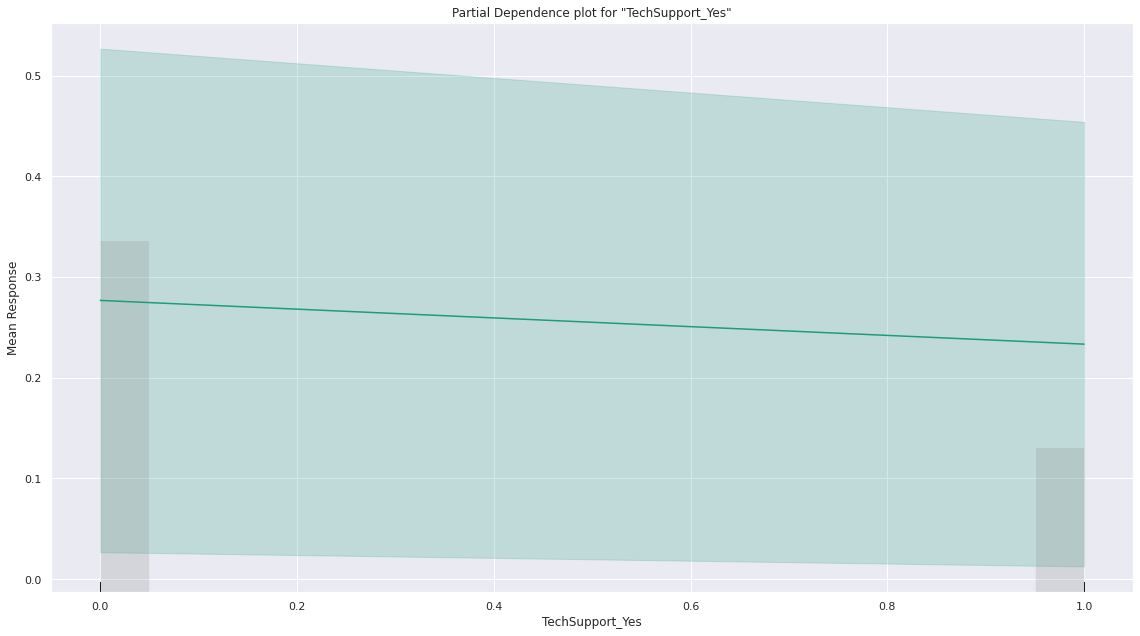

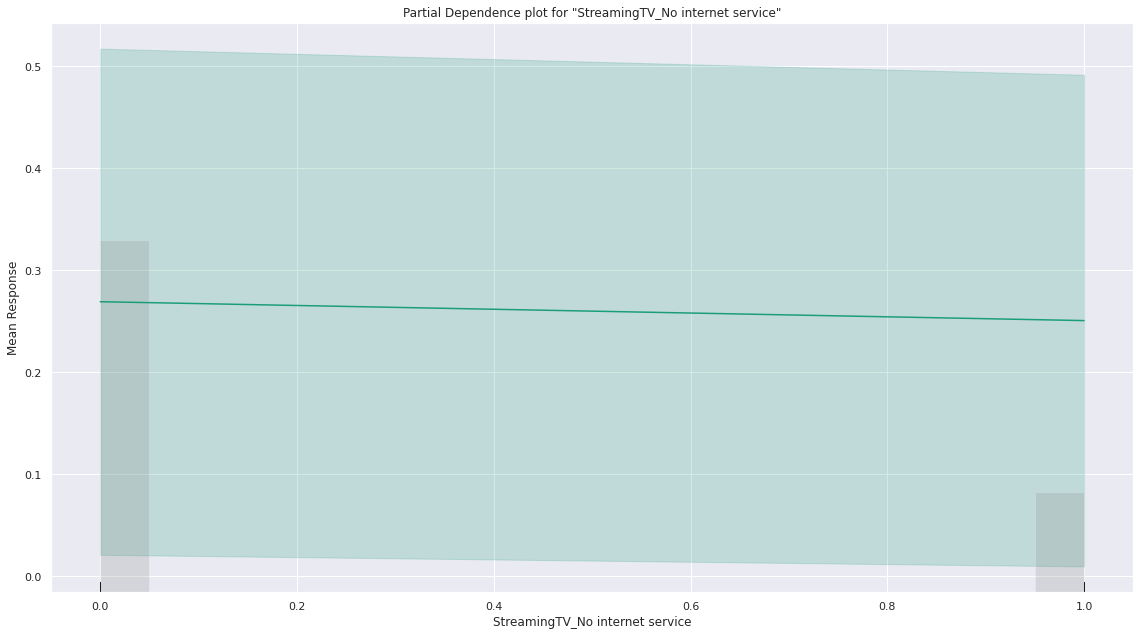

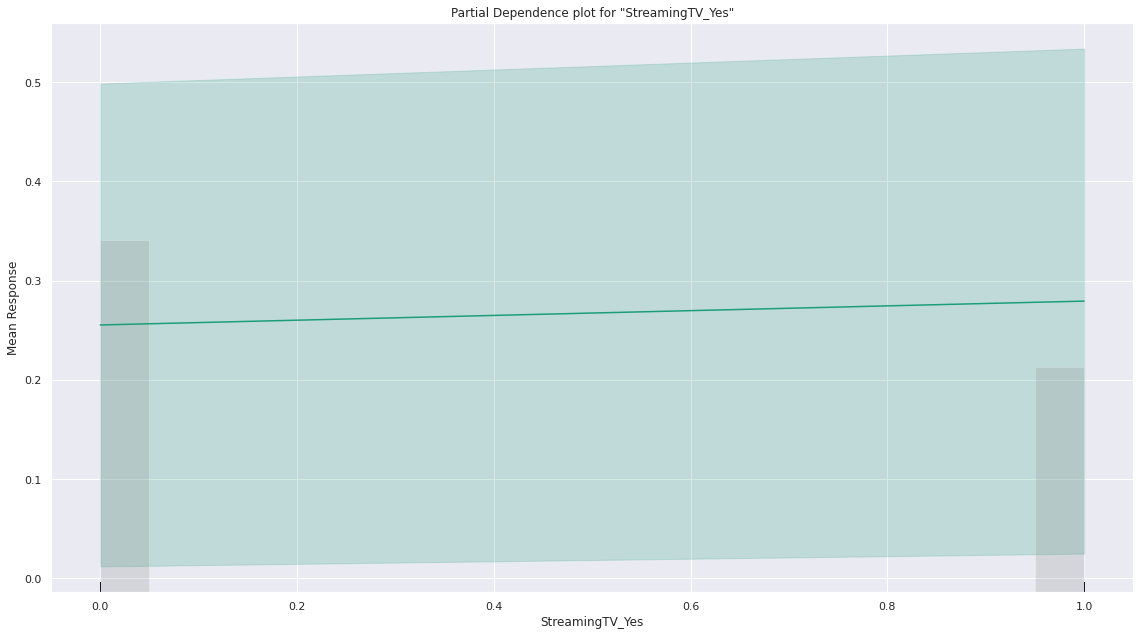

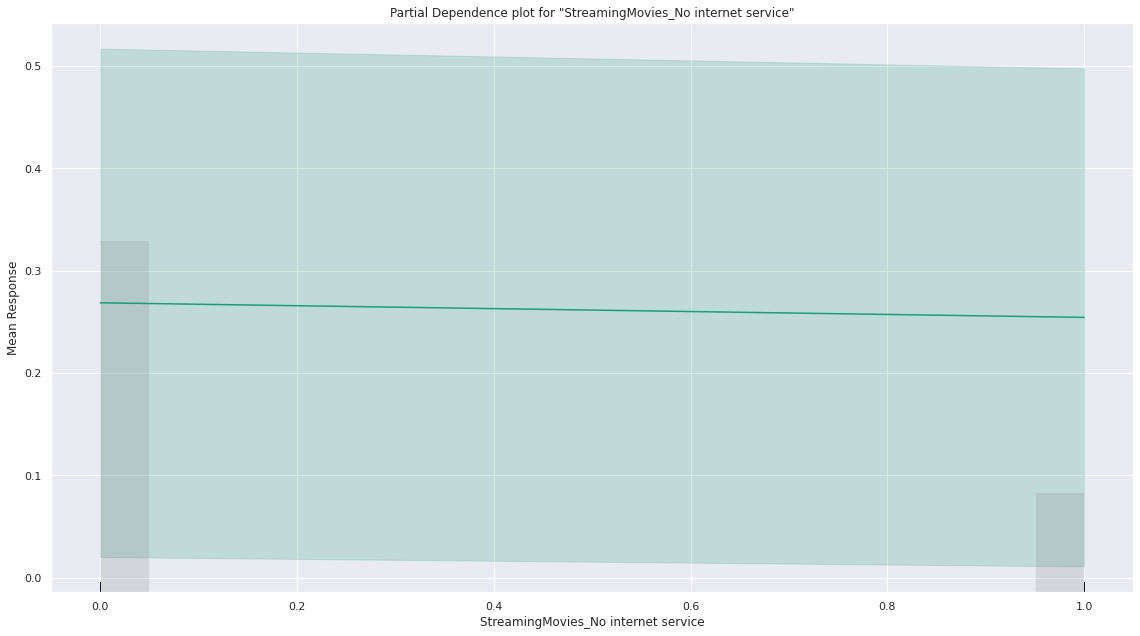

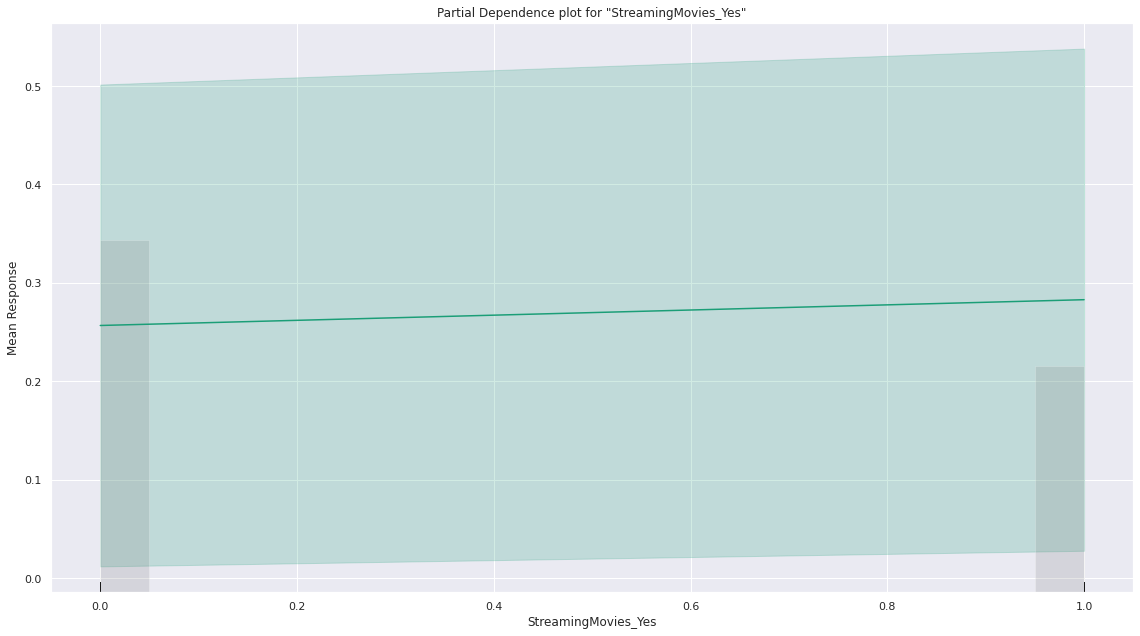

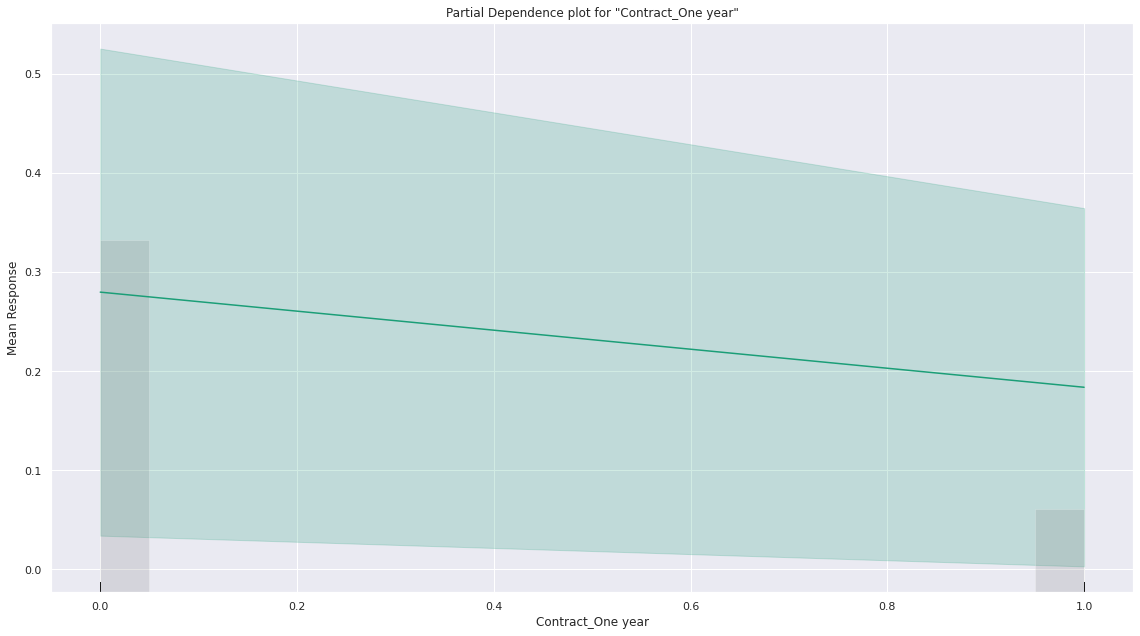

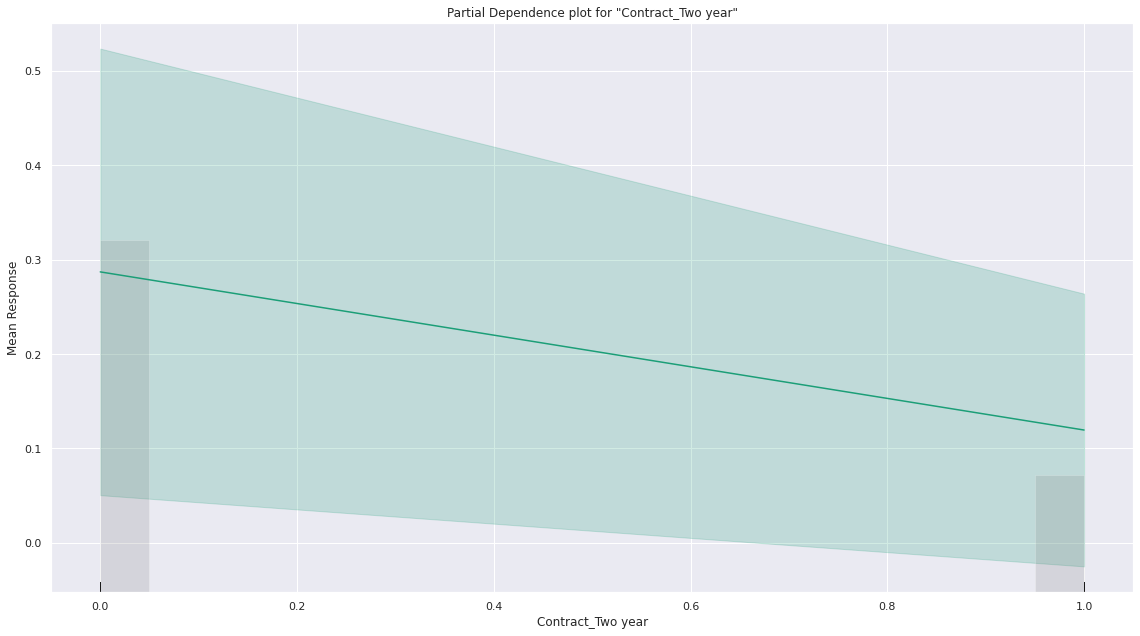

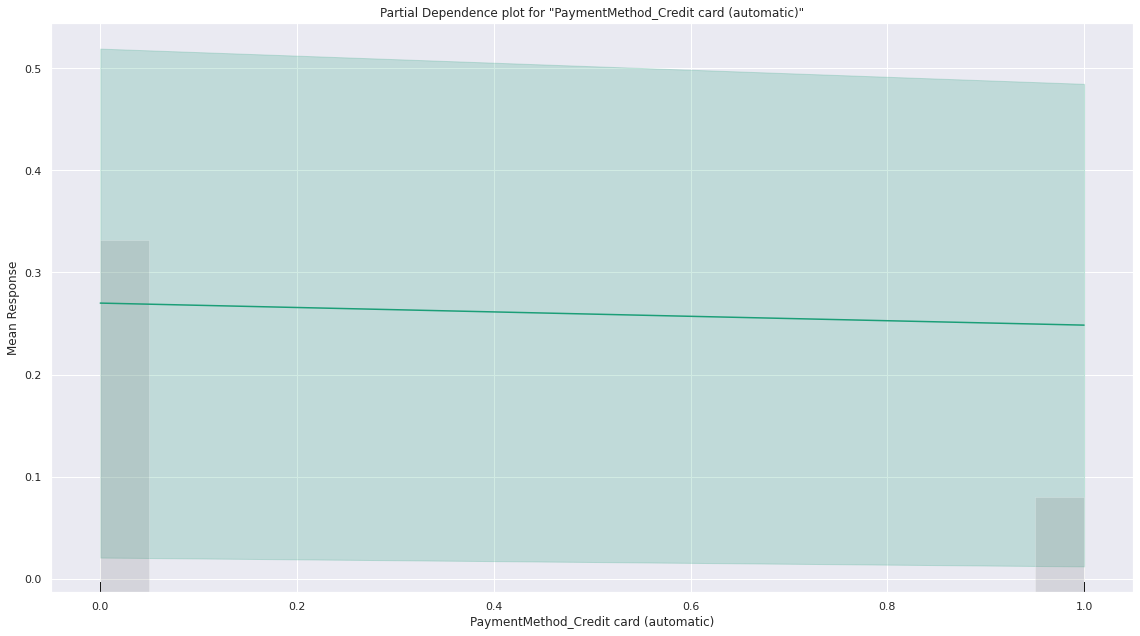

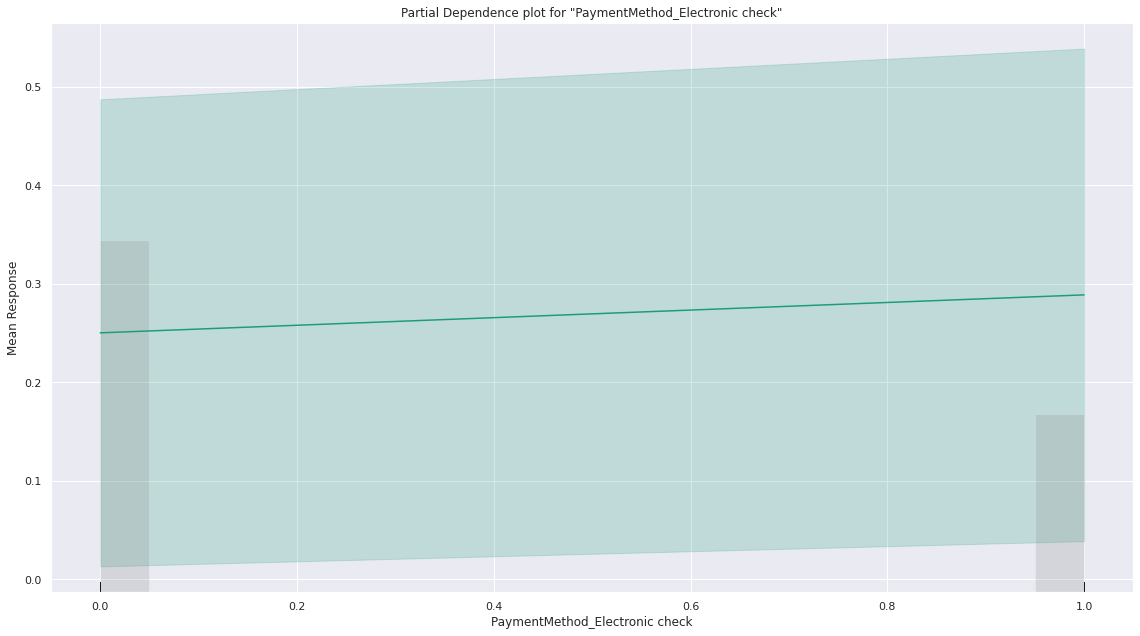

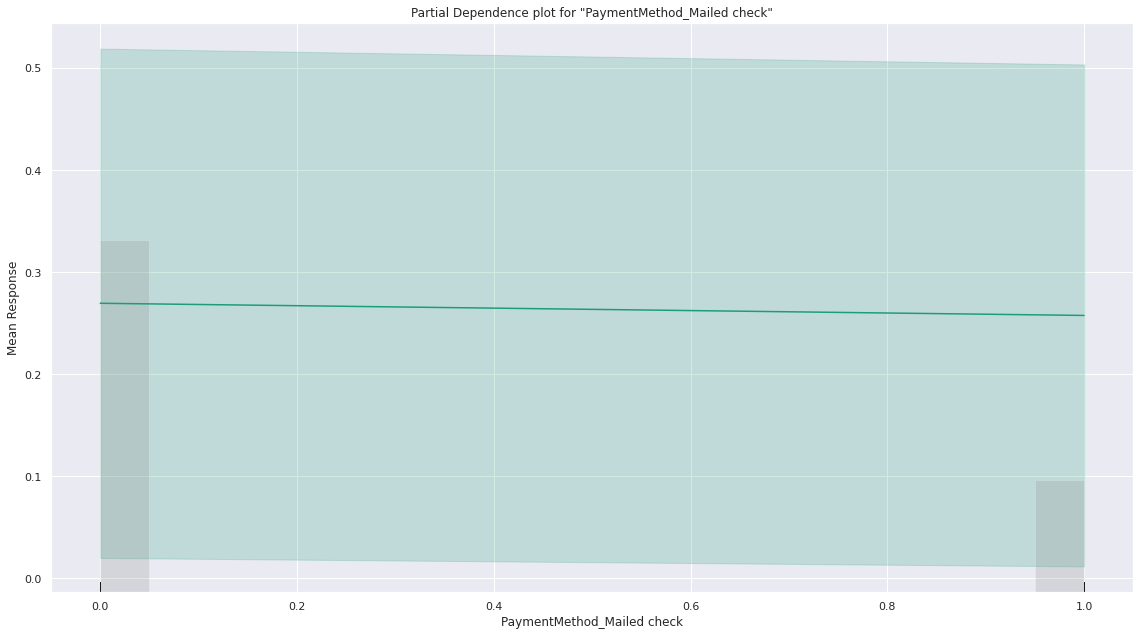

# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## StackedEnsemble_BestOfFamily_1_AutoML_1_20230301_34957

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.2755484555915629
       No    Yes    Error    Rate
-----  ----  -----  -------  --------------
No     765   240    0.2388   (240.0/1005.0)
Yes    82    311    0.2087   (82.0/393.0)
Total  847   551    0.2303   (322.0/1398.0)

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

In [85]:
# Explain a single H2O model (e.g. leader model from AutoML)
exm_test = aml.leader.explain(test)
exm_test

# Leaderboard

> Leaderboard shows models with their metrics and their predictions for a given row. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id                                                  auc    logloss     aucpr    mean_per_class_error      rmse        mse    training_time_ms    predict_time_per_row_ms  algo          predict            No       Yes
---------------------------------------------------  --------  ---------  --------  ----------------------  --------  ---------  ------------------  -------------------------  ------------  ---------  ----------  --------
DRF_2_AutoML_2_20230301_44405                        0.999956   0.124588  0.999886              0.00226729  0.15588   0.0242985                 521                   0.016169  DRF           Yes        0.0681818   0.931818
XGBoost_grid_2_AutoML_2_20230301_44405_model_3       0.991184   0.178173  0.978436              0.048779    0.213787  0.045705                  155                   0.007417  XGBoost       Yes        0.032194    0.967806
XGBoost_grid_2_AutoML_2_20230301_44405_model_2       0.99084    0.169561  0.980053              0.051878    0.209751  0.0439955                1413                   0.006649  XGBoost       Yes        0.040815    0.959185
DeepLearning_grid_4_AutoML_2_20230301_44405_model_2  0.98686    0.149427  0.965751              0.0548061   0.198567  0.039429                17332                   0.01421   DeepLearning  Yes        0.00153304  0.998467
GBM_9_AutoML_2_20230301_44405                        0.976227   0.252194  0.940466              0.084167    0.26511   0.0702834                 290                   0.011247  GBM           Yes        0.114581    0.885419
GBM_10_AutoML_2_20230301_44405                       0.971158   0.260683  0.932272              0.0896396   0.270034  0.0729183                 151                   0.010163  GBM           Yes        0.139646    0.860354
GBM_8_AutoML_2_20230301_44405                        0.963845   0.280266  0.911709              0.114033    0.285148  0.0813092                 162                   0.009847  GBM           Yes        0.147593    0.852407
GBM_grid_2_AutoML_2_20230301_44405_model_2           0.956842   0.290383  0.897936              0.118404    0.291127  0.0847548                 188                   0.016028  GBM           Yes        0.0921069   0.907893
GBM_7_AutoML_2_20230301_44405                        0.956567   0.290134  0.900834              0.113087    0.290647  0.0844754                 270                   0.010082  GBM           Yes        0.129763    0.870237
XGBoost_6_AutoML_2_20230301_44405                    0.95193    0.273937  0.890201              0.131404    0.286705  0.0822                    143                   0.005691  XGBoost       Yes        0.0645738   0.935426
[20 rows x 13 columns]

# SHAP Explanation

> SHAP explanation shows contribution of features for a given instance. The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function. H2O implements TreeSHAP which when the features are correlated, can increase contribution of a feature that had no influence on the prediction.

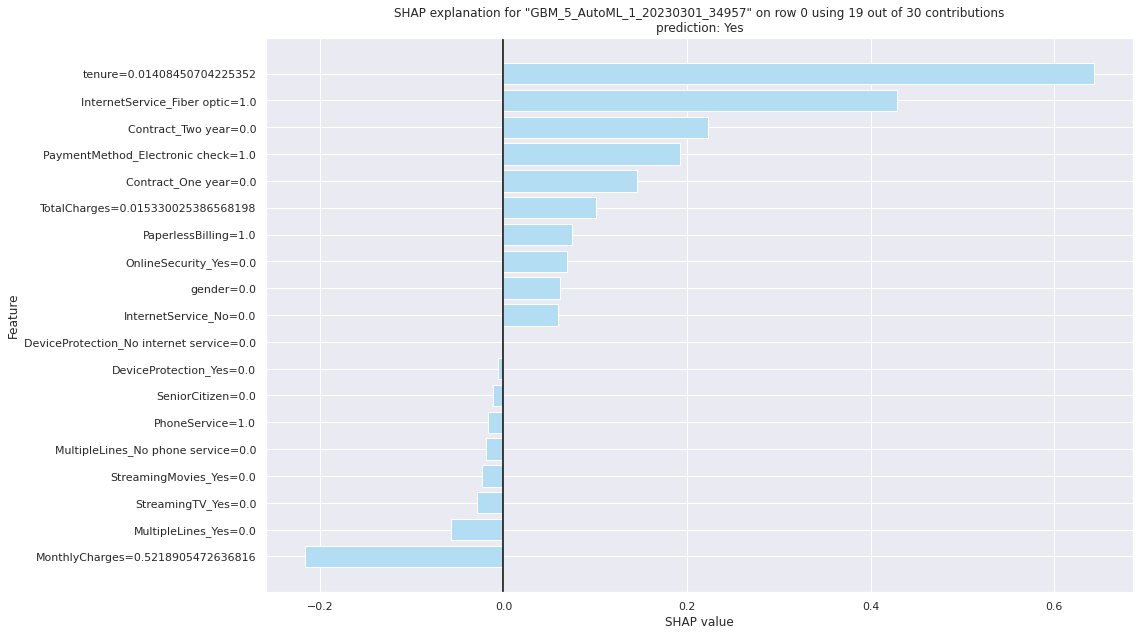

/usr/local/lib/python3.8/dist-packages/h2o/explanation/_explain.py:3404: UserWarning: No model with variable importance. Selecting all features to explain.
  warnings.warn("No model with variable importance. Selecting all features to explain.")


# Individual Conditional Expectation

> Individual conditional expectations (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response for a given row. ICE plot is similar to partial dependence plot (PDP), PDP shows the average effect of a feature while ICE plot shows the effect for a single instance.

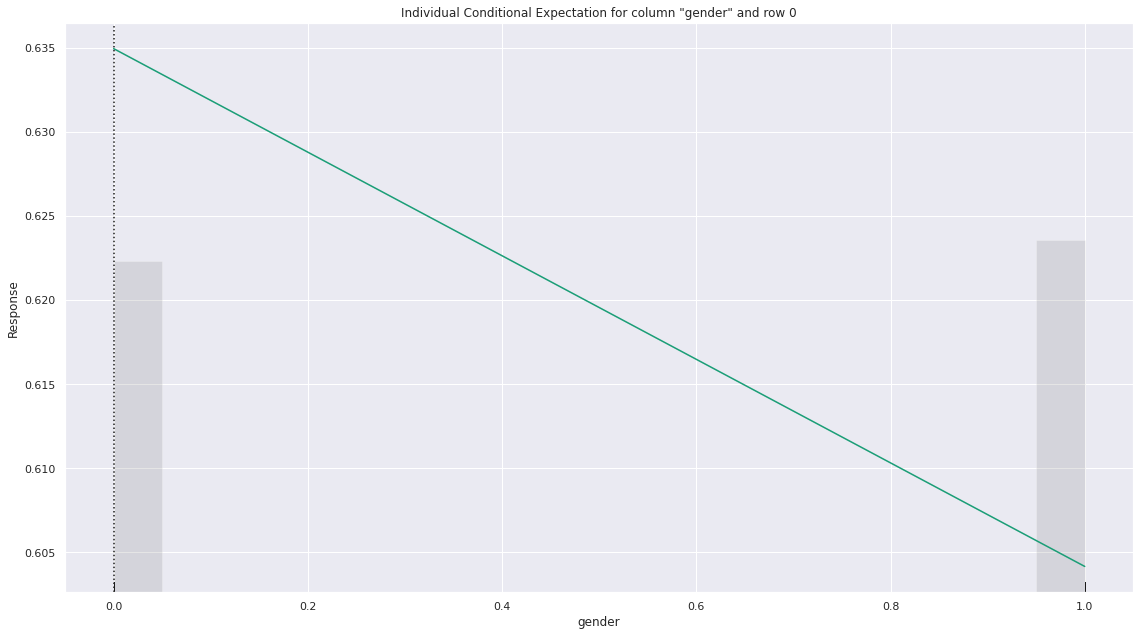

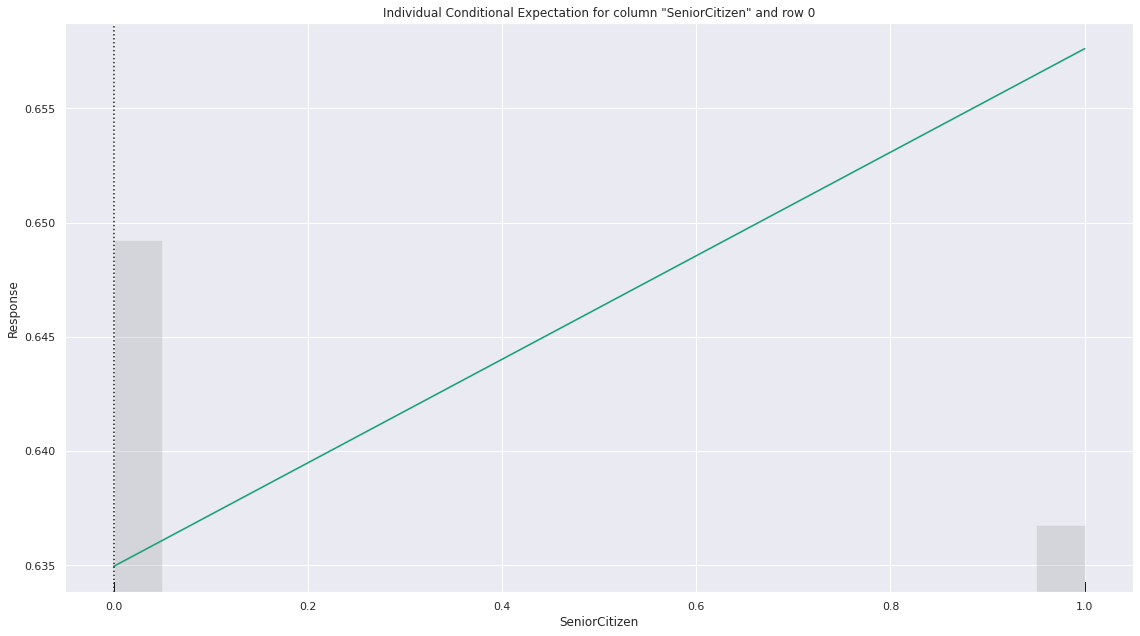

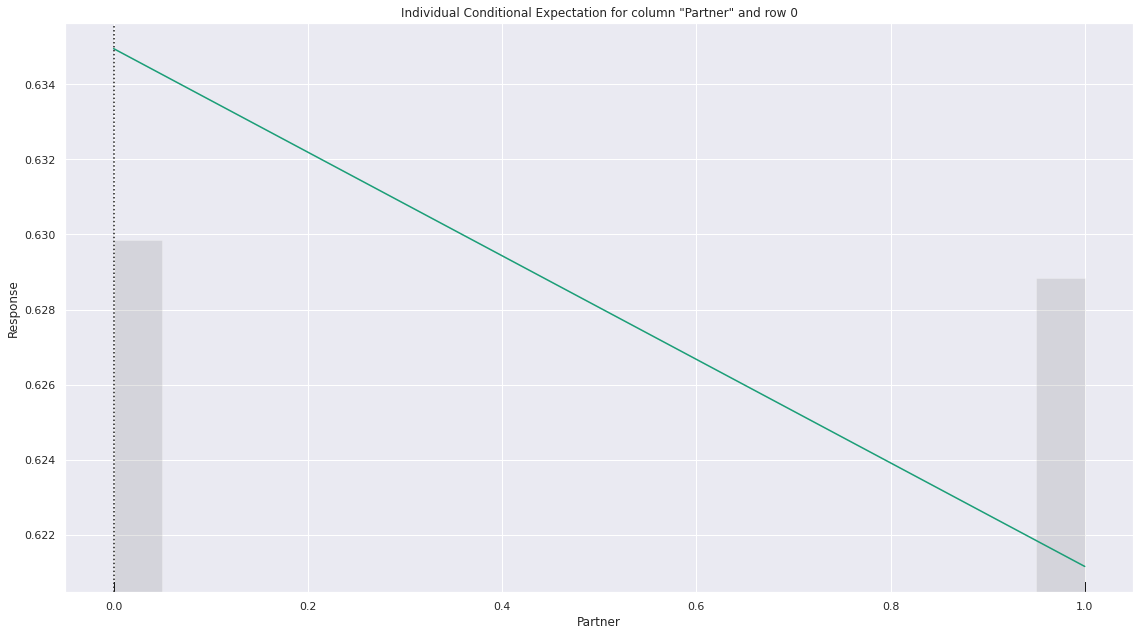

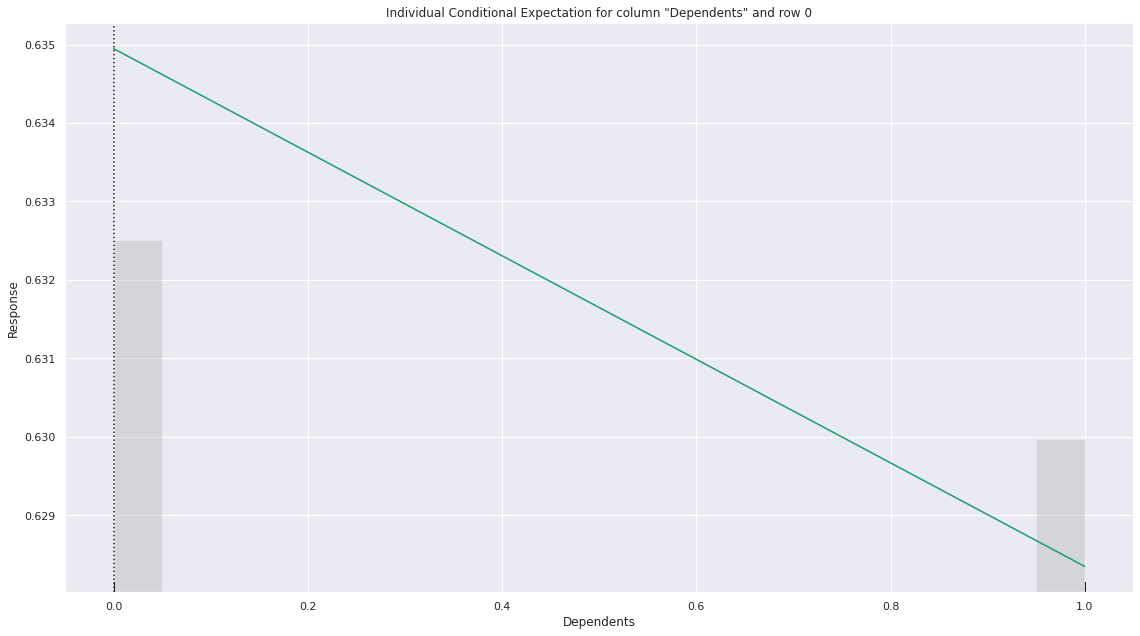

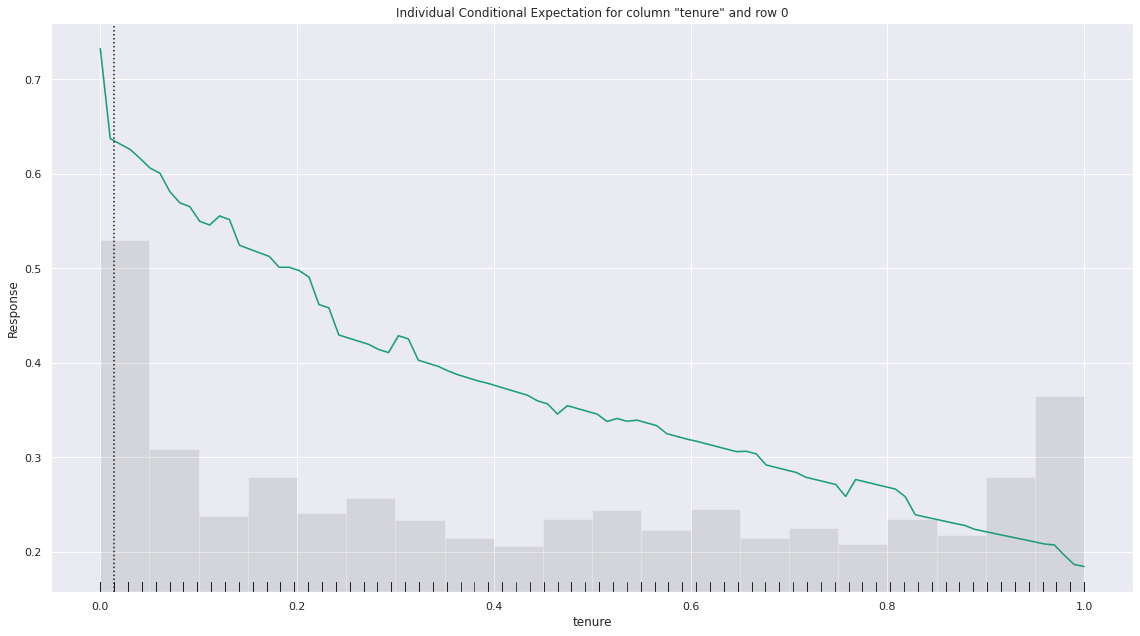

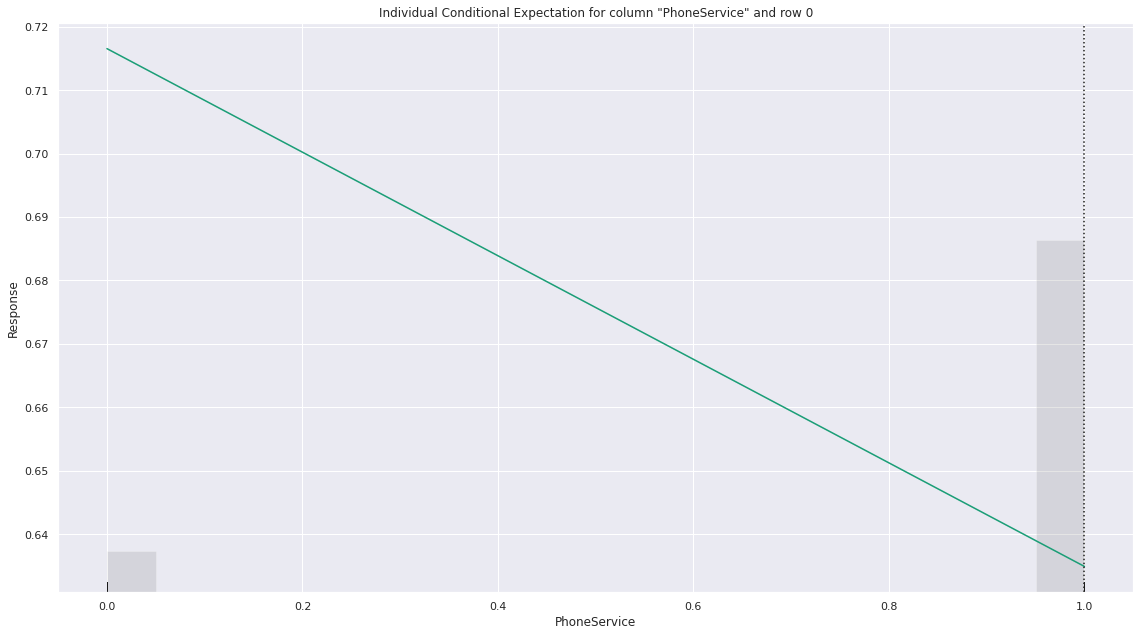

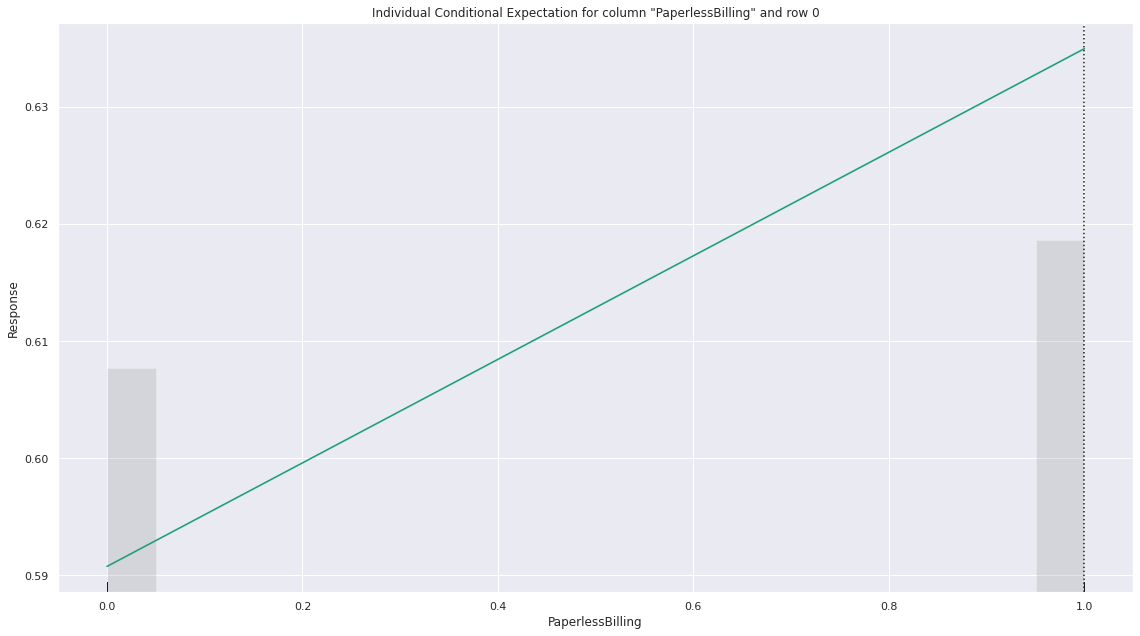

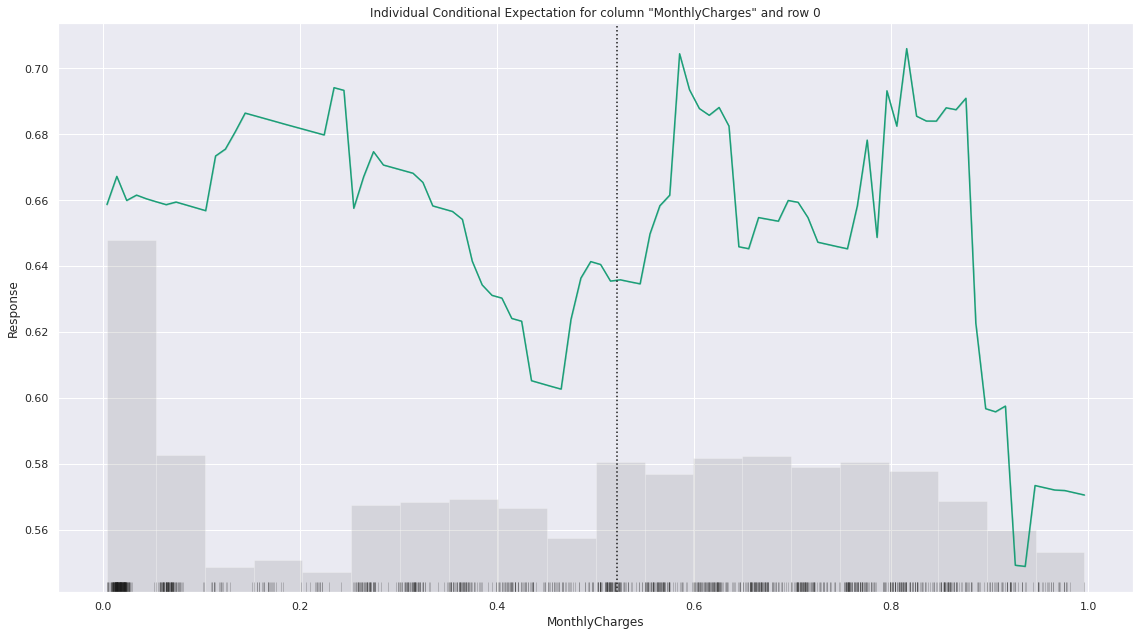

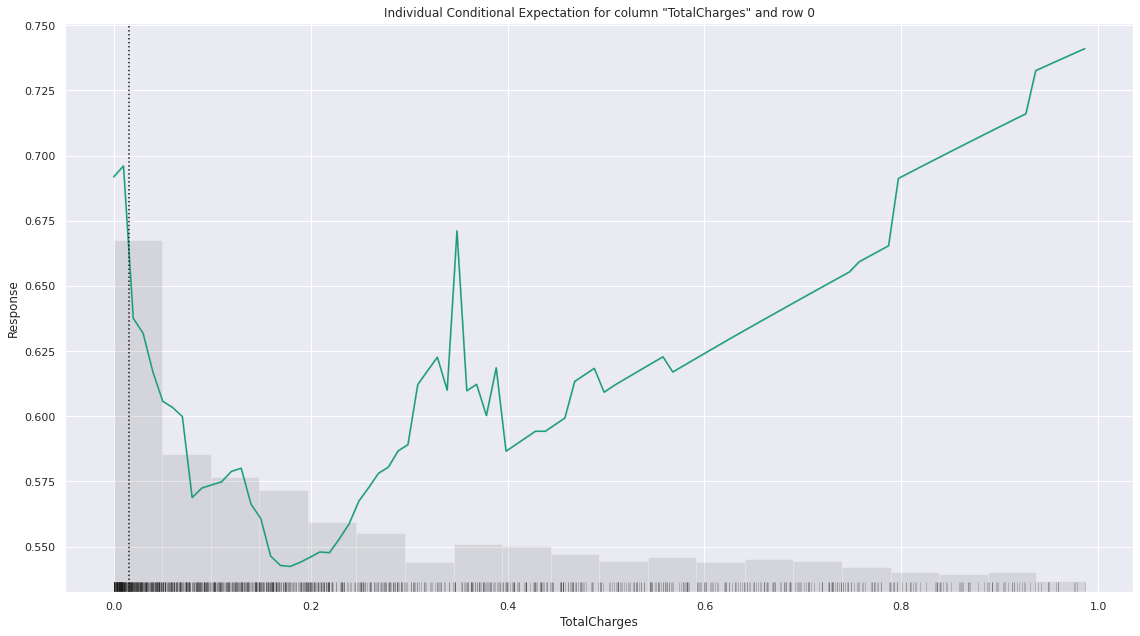

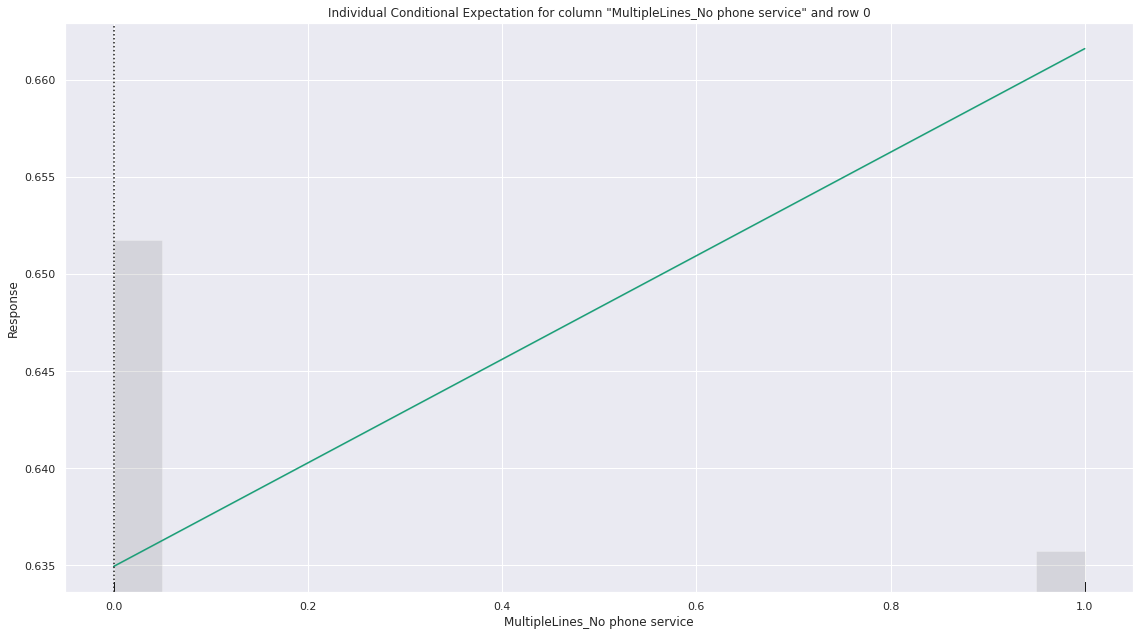

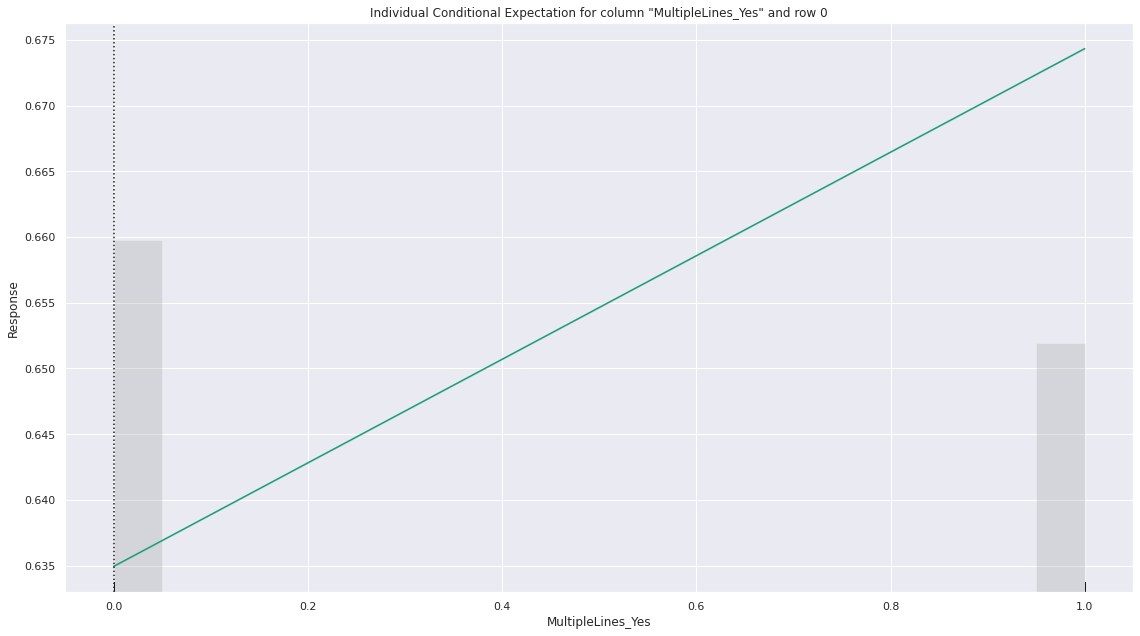

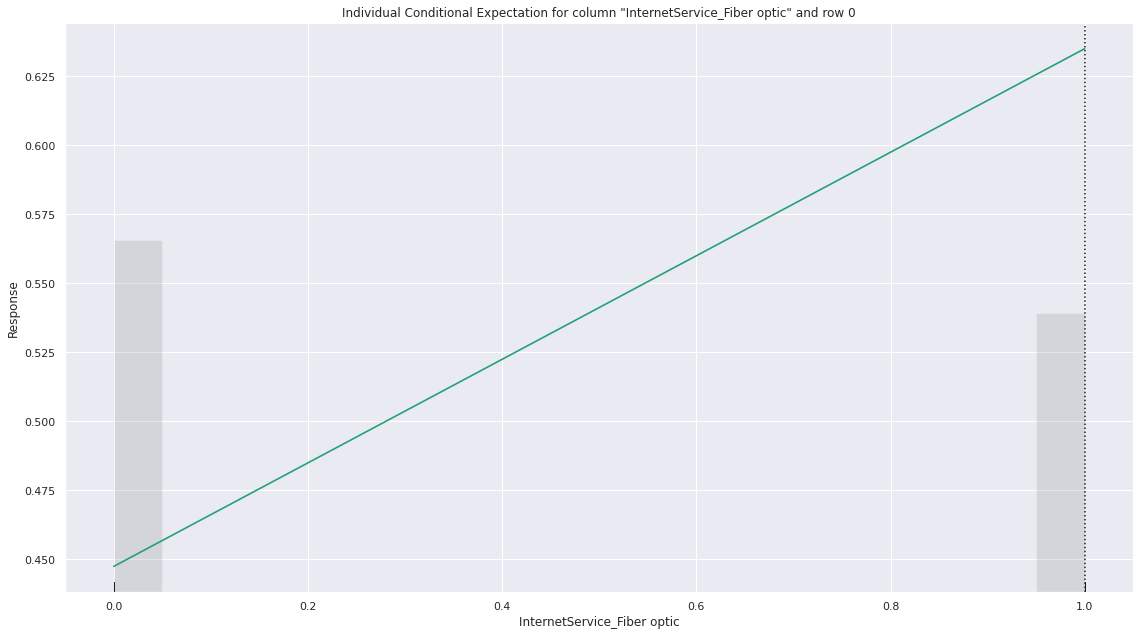

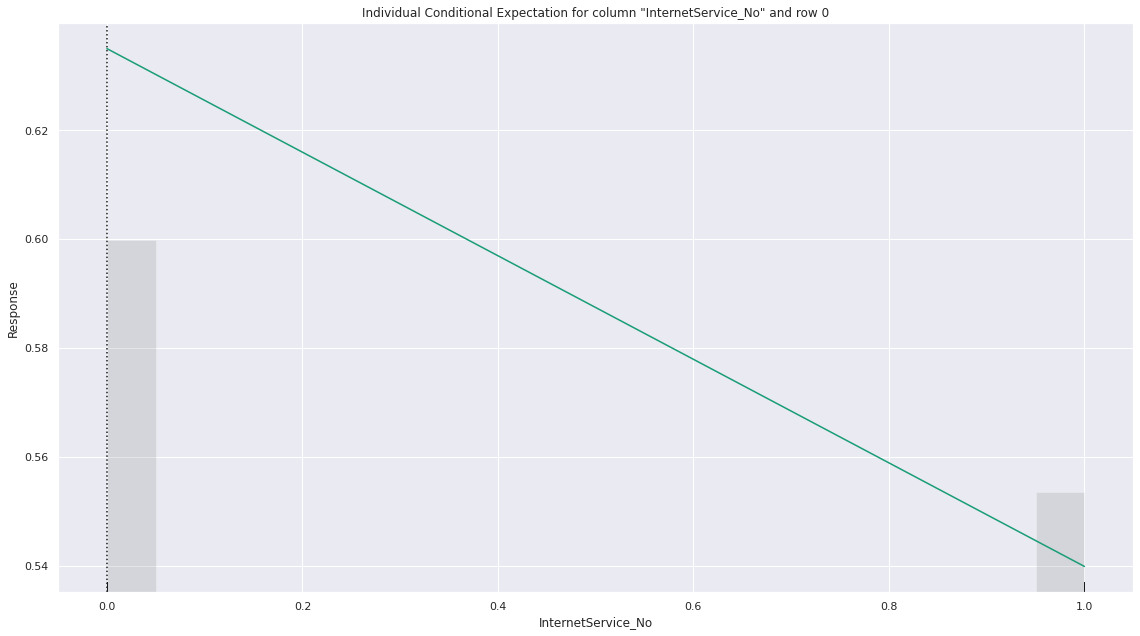

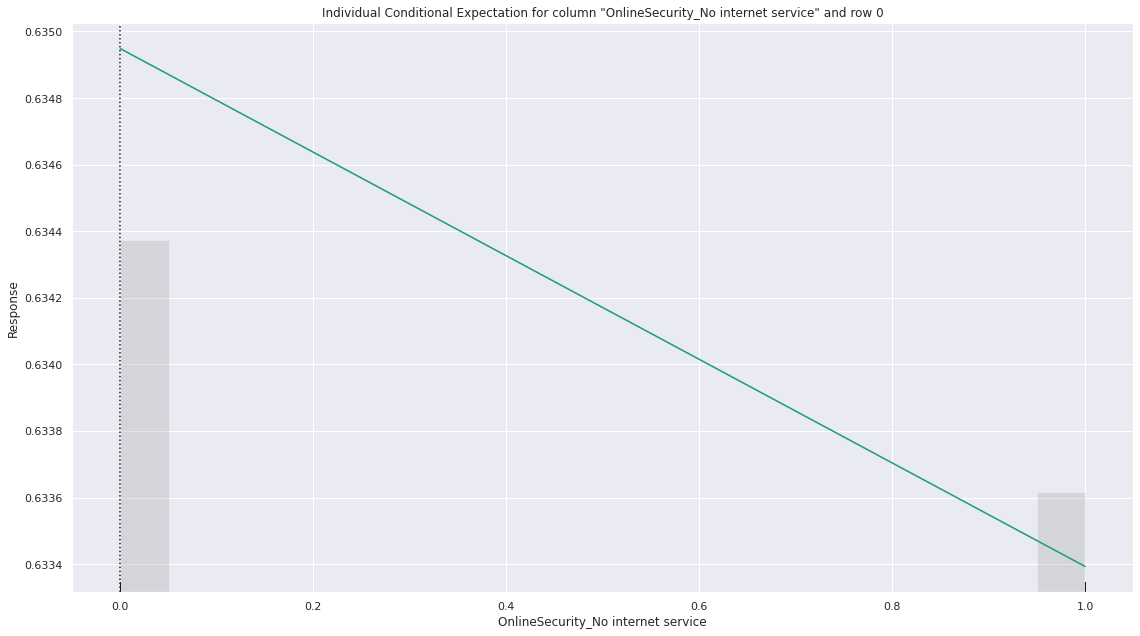

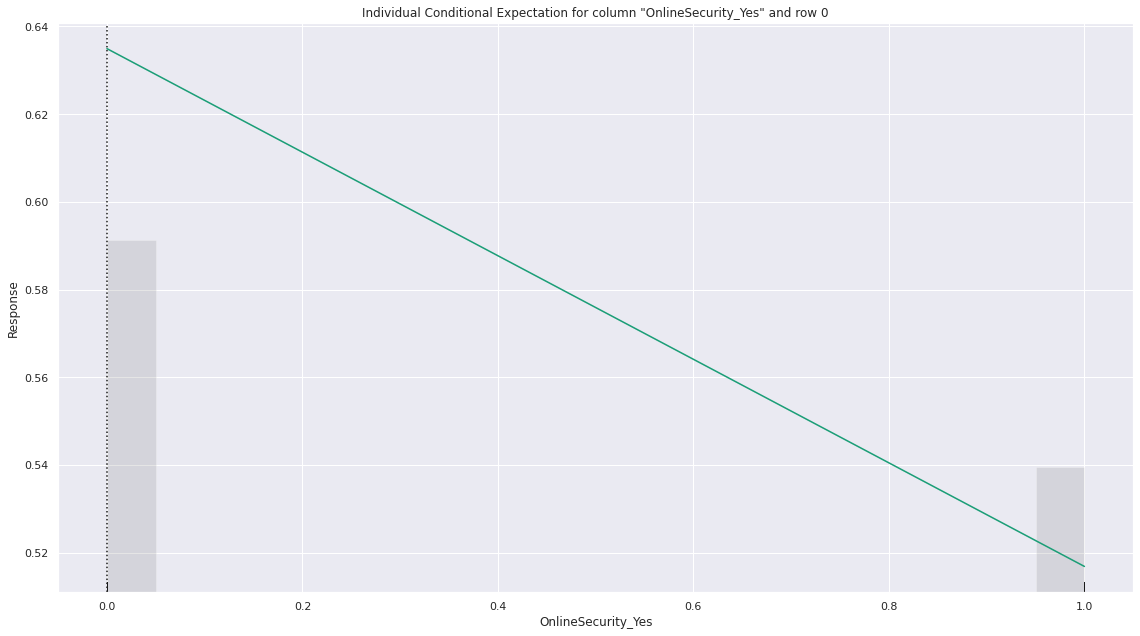

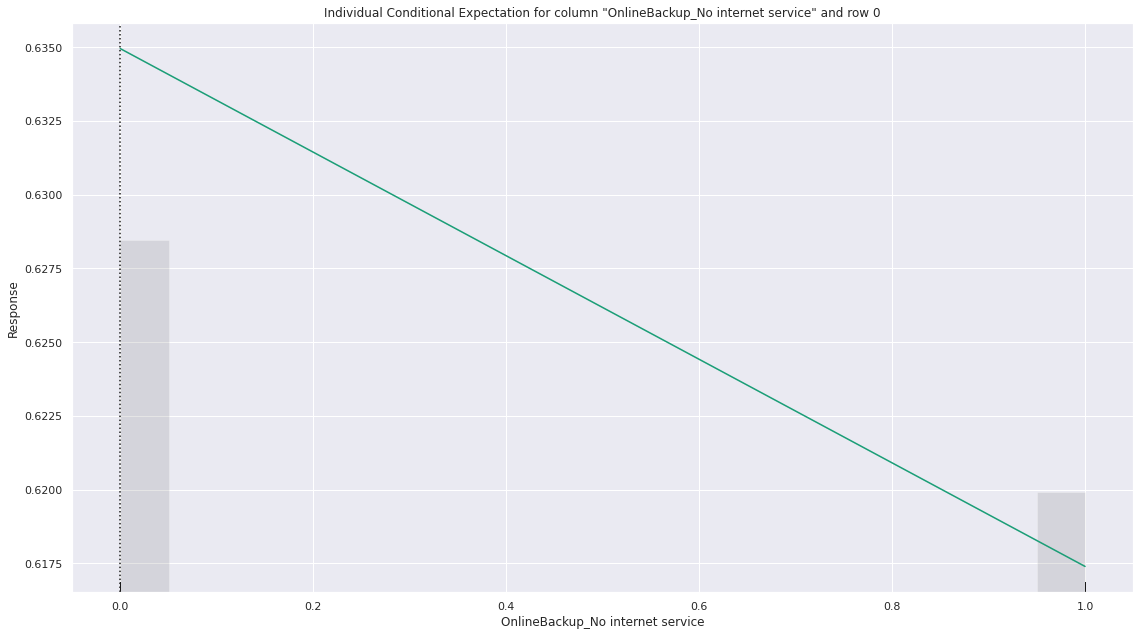

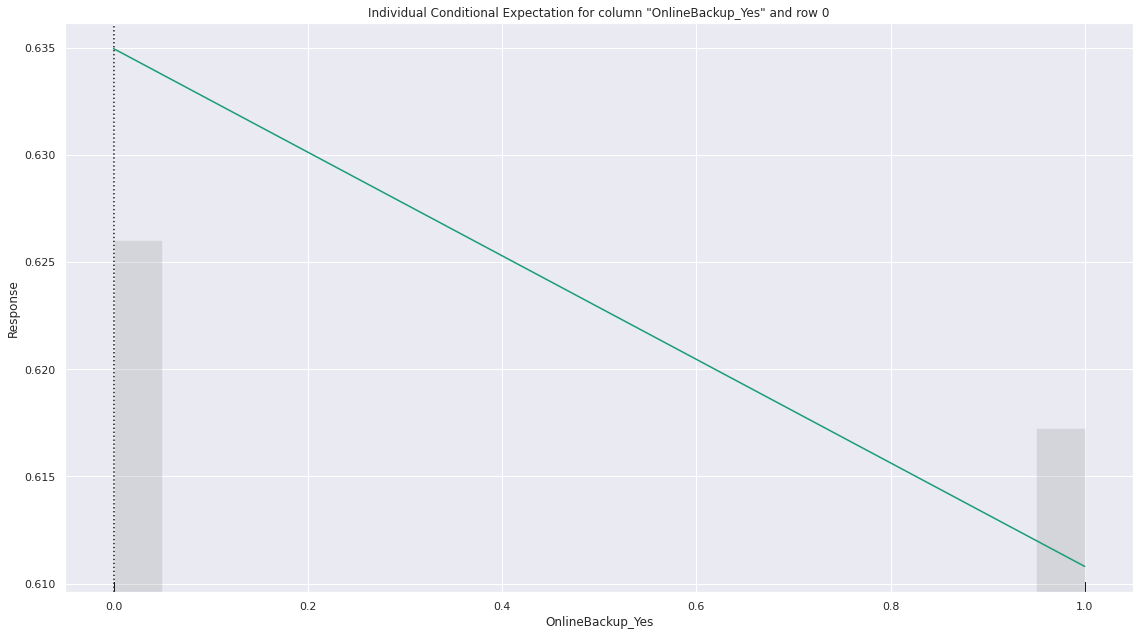

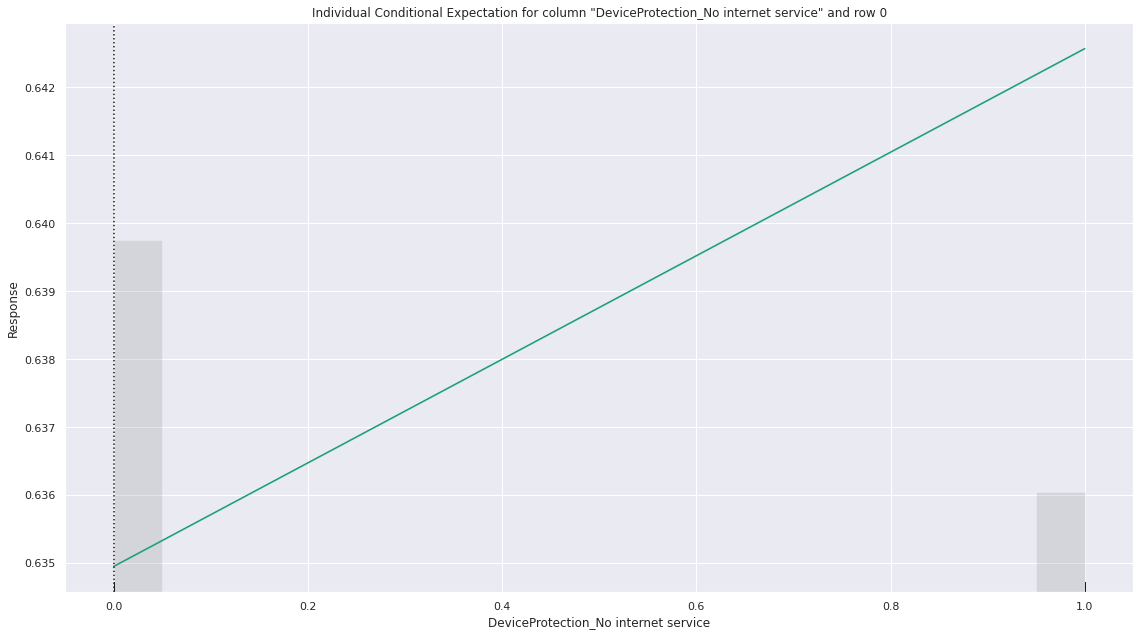

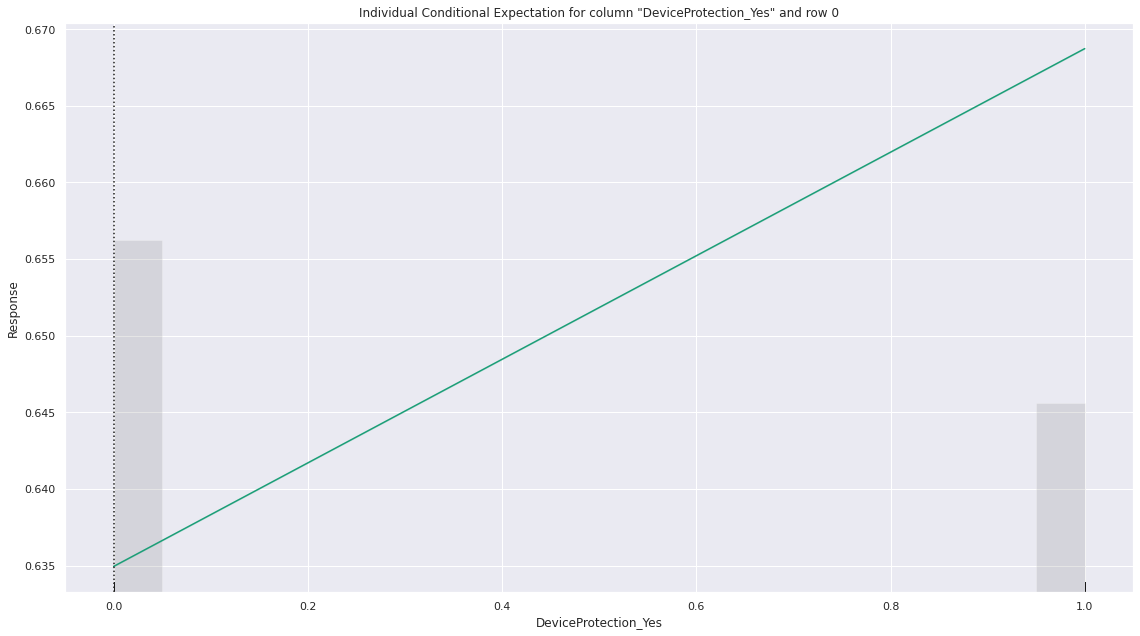

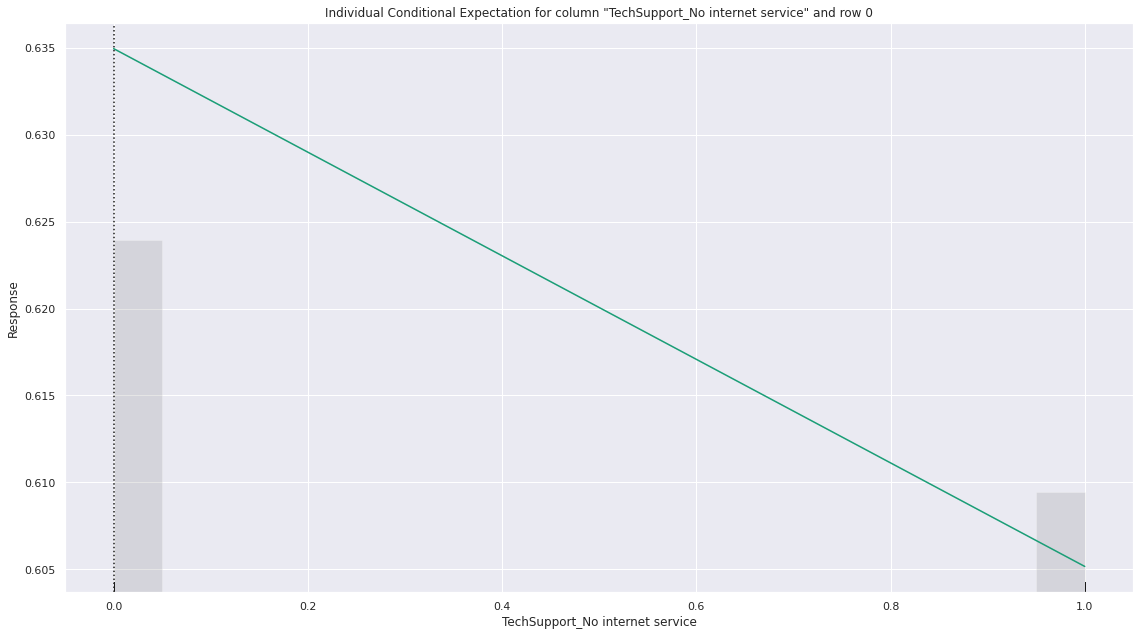

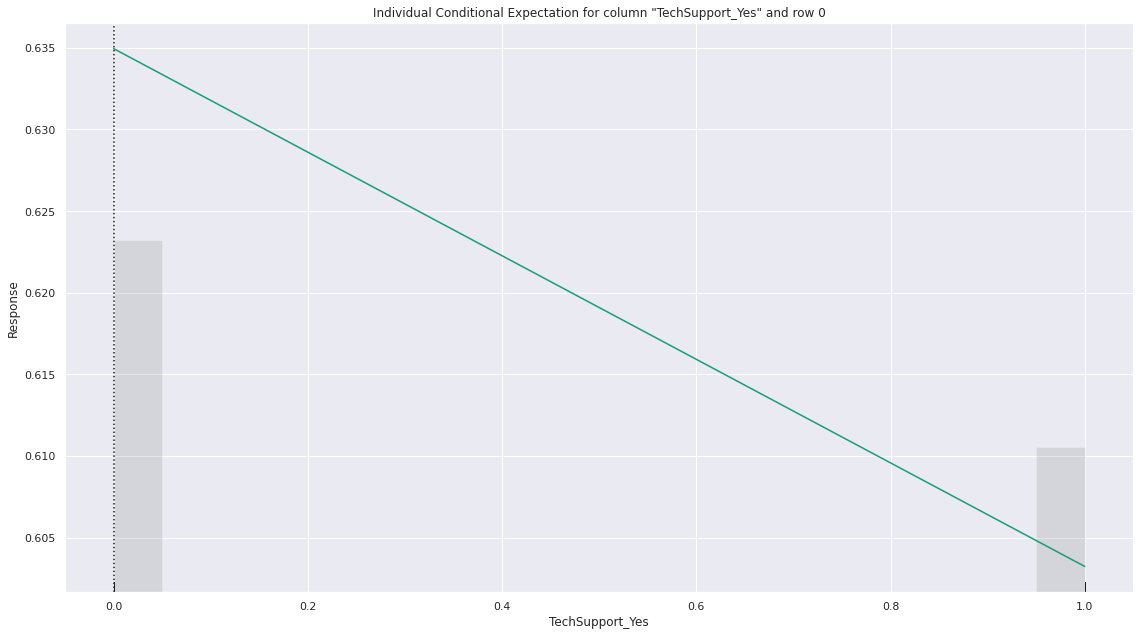

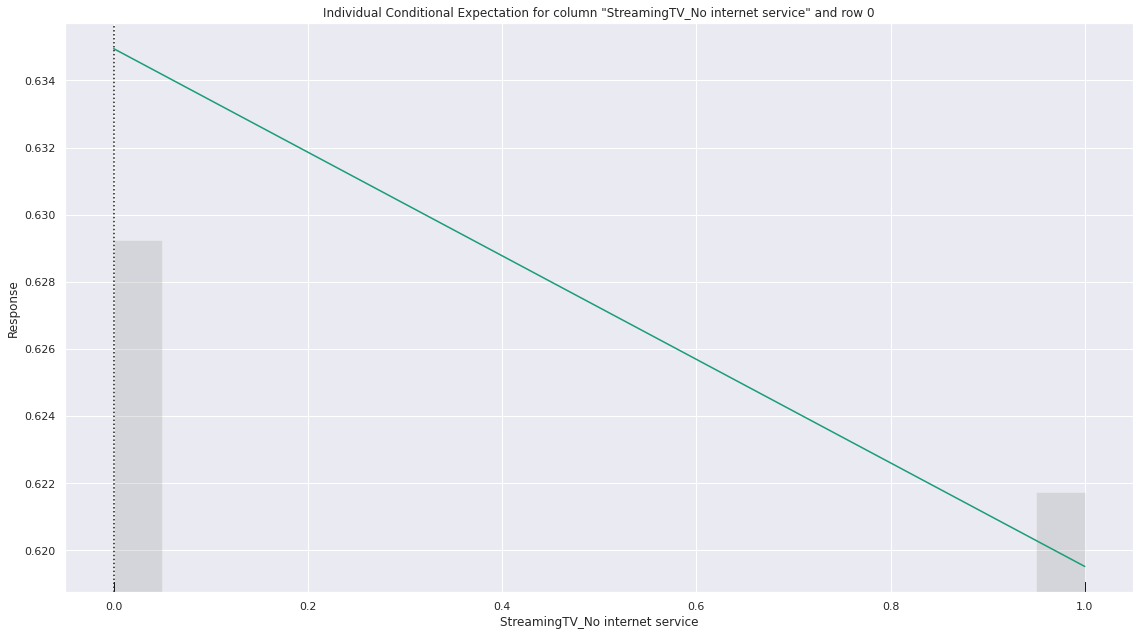

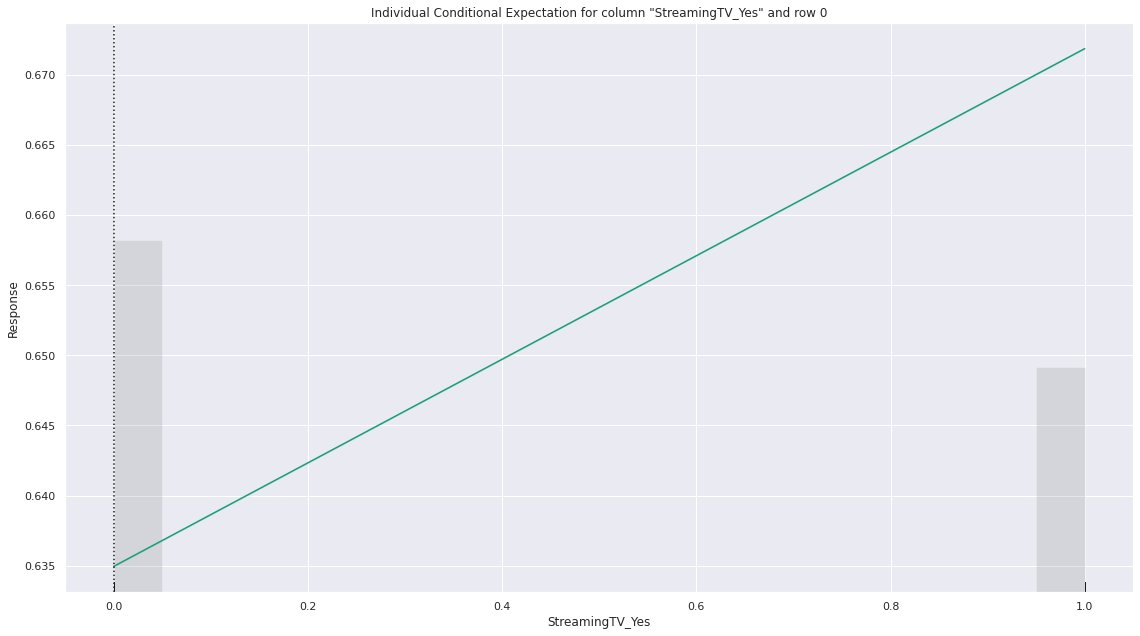

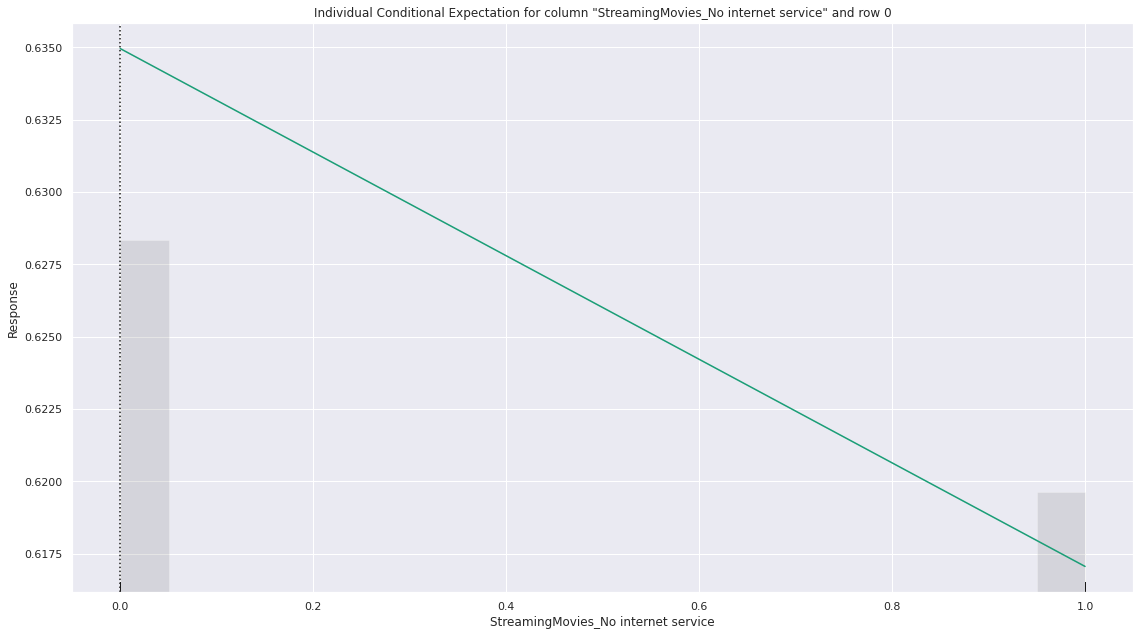

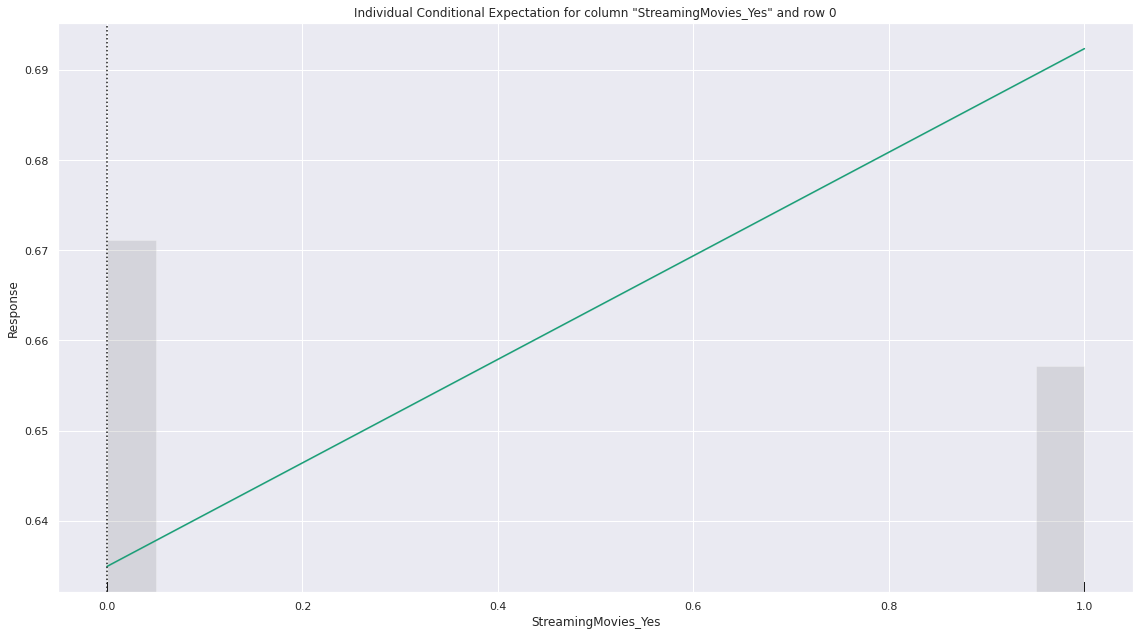

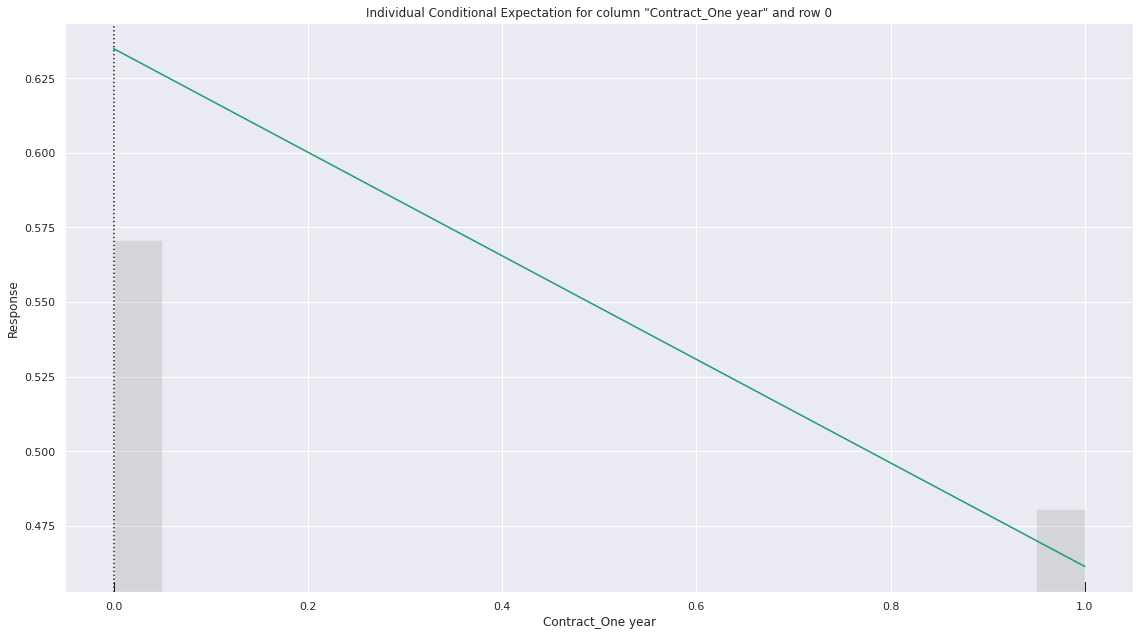

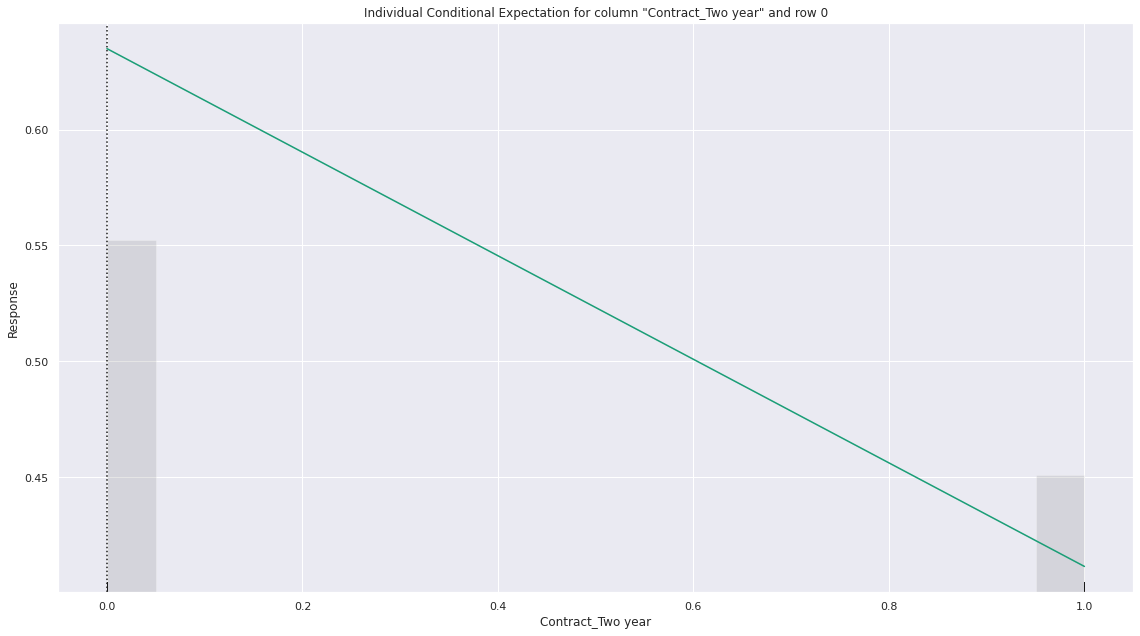

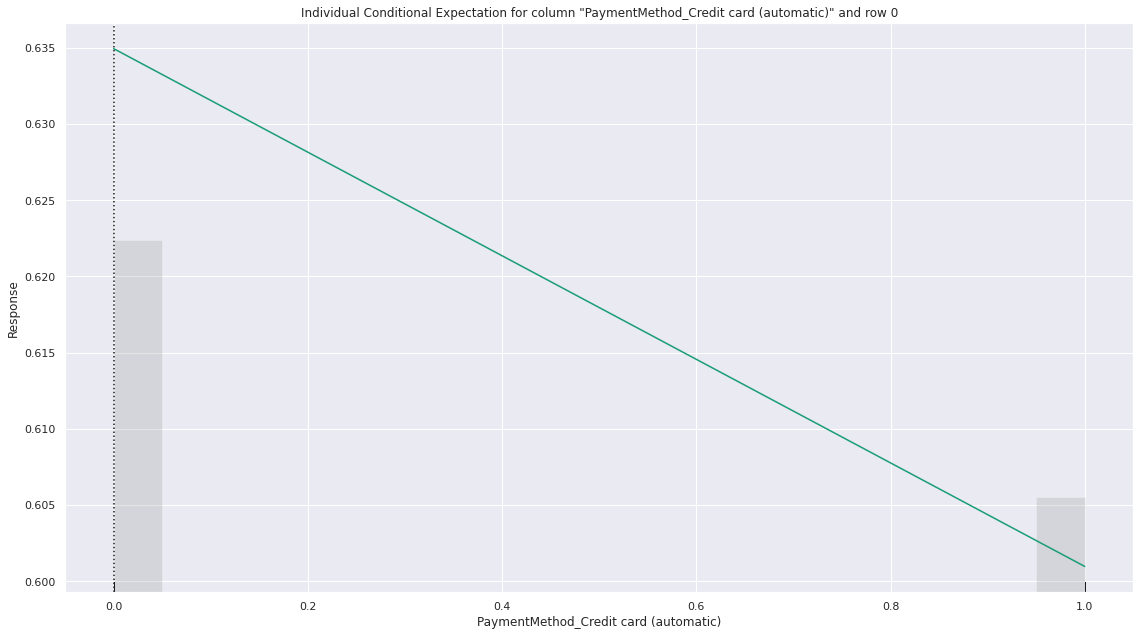

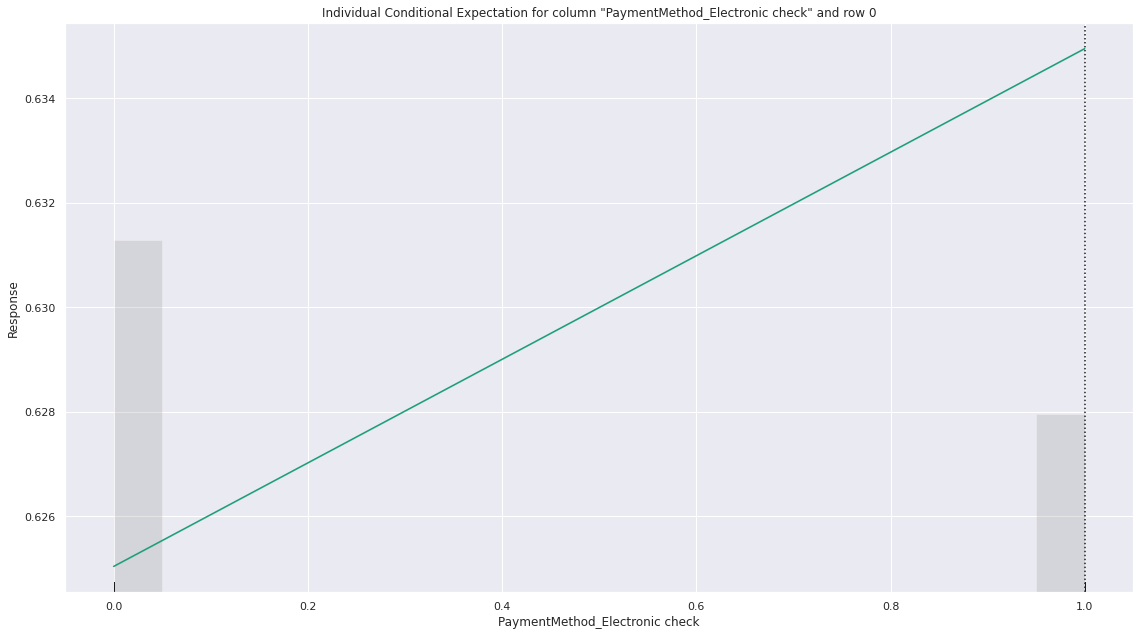

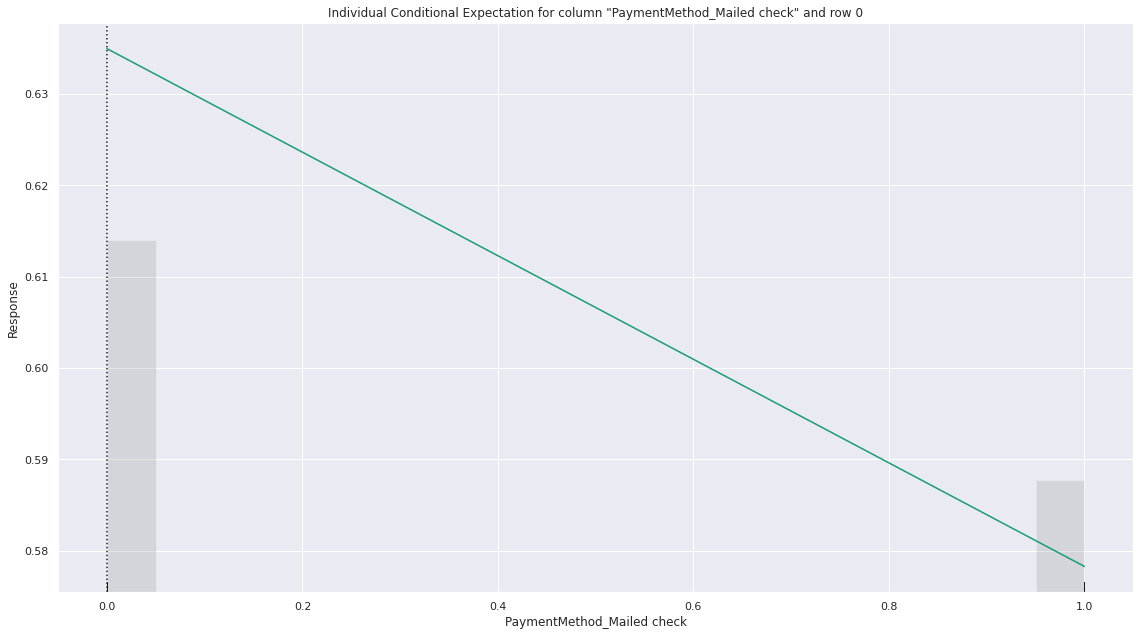

# Individual Conditional Expectation

> Individual conditional expectations (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response for a given row. ICE plot is similar to partial dependence plot (PDP), PDP shows the average effect of a feature while ICE plot shows the effect for a single instance.

In [86]:
# Explain first row with all AutoML models
aml.explain_row(test, row_index=0)

# Explain first row with a single H2O model (e.g. leader model from AutoML)
aml.leader.explain_row(test, row_index=0)

In [73]:
!pip install tpot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 KB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.9/139.9 KB 7.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for stopit: filename=stopit-1.1.2-py3-none-any.whl size=11953 sha256=6d636cd04be0ab224669cc39b895b66d01b4c699c88a059f8f77d17a05b1e2f2
  Stored in directory: /root/.cache/pip/wheels/a8/bb/8f/6b9328d23c2dcedbfeb8498b9f650d55d463089e3b8fc0bfb2
Successfully built stopit


In [74]:
from tpot import TPOTClassifier

In [75]:
# Train the AutoML model
tpot = TPOTClassifier(generations=5, population_size=20, verbosity=2)
tpot.fit(X_train, y_train)

# Get the accuracy score on the test set
accuracy = tpot.score(X_test, y_test)
print("Accuracy:", accuracy)

Optimization Progress:   0%|          | 0/120 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.804756716602699

Generation 2 - Current best internal CV score: 0.804756716602699

Generation 3 - Current best internal CV score: 0.8063823201683793

Generation 4 - Current best internal CV score: 0.8063823201683793

Generation 5 - Current best internal CV score: 0.8067882051916966

Best pipeline: RandomForestClassifier(VarianceThreshold(input_matrix, threshold=0.05), bootstrap=True, criterion=gini, max_features=0.8500000000000001, min_samples_leaf=12, min_samples_split=13, n_estimators=100)
Accuracy: 0.7843601895734598


classification_report,
Answers for questions

* Is the relationship significant?
A: No, relationship between variables is not that significant, we can see the value of R-square which is 0.41, very less relationship in-between features.
 because the evaluation for R-square variables has very few and those values are very far from regression line and it leads to less co-relationship among other variables.
 
* Are any model assumptions violated?
A: No, the dependent variable is 0/1, dataset is a classification data where it can run on all classification AutoML models.

* Is there any multicollinearity in the model?
A: Yes, from the VIF data, we can see there are few continuous variable data with less co-relationship, so this leads the multicollinearity in the model was very less.

* In the multivariate models are predictor variables independent of all the other predictor variables?
A: No, they are not all independent of each other, we can know that from the multicollinearity especially in continuous varibles.

* In in multivariate models rank the most significant predictor variables and exclude insignificant ones from the model.
A: the most significant predictor variable is tenure and significant predictor variable is Total Charges

* Does the model make sense?
A: Yes classification model can deal with AutoML and get better results.

* Does regularization help?**
No, the rmse from the best model is 0.3614, and in regularization, the rmse is 0.3795, it has a less difference.

* Which independent variables are significant?
the most significant predictor variable is tenure among the other predictor variable

* Which hyperparameters are important?
all hyperparameters are important because they determined the way model works, however, there are some more important one, such as booster,max_depth, ntrees in XGBOOST and learn_rate in GBM.

* Coding professionalism?
yes.

Conclusion:

As a result, for classification, to predict the target variable "Churn" the XGBoost is the one having the best performance. VIF, p-values and other tests were considered to ignore for the independent variables because it has very less continuous variables in the dataset, so cannot expect best r2 square, multicollinearity for the model. Also tried with specific automl model but could n't generate a best model.

Hence with H2O.ai data deployement has been done and best accuracy has been generated for the Telco customer churn dataset.

# References
https://docs.h2o.ai/h2o/latest-stable/h2o-docs/welcome.html

https://towardsdatascience.com/automl-and-the-future-of-data-science-82a1b8f65e7e

https://h2oai.github.io/tutorials/introduction-to-machine-learning-with-h2o-3-automl/#5

MIT License
Copyright (c) 2023 Anusree Myneni

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE